In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import librosa
import librosa.display
import IPython.display



In [2]:
path_train = pd.read_csv('path_train.csv')
path_test = pd.read_csv('path_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
model = keras.Sequential()
model.add(layers.LSTM(128, return_sequences=True, input_shape=(None,20)))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(128))
model.add(layers.Dense(20, activation='ReLU'))

model.add(layers.Dense(1, activation='sigmoid'))

2023-02-05 19:47:10.044824: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model.input_shape, model.output_shape

((None, None, 20), (None, 1))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 128)         76288     
                                                                 
 lstm_1 (LSTM)               (None, None, 128)         131584    
                                                                 
 lstm_2 (LSTM)               (None, None, 128)         131584    
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 20)                2580      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 473,641
Trainable params: 473,641
Non-trai

In [6]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4, clipnorm=0.5)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics='accuracy')

In [7]:
# path = '/Users/stanislavnevyazhsky/My Drive/Colab Notebooks/Project/pneumonia_files' + path_train.loc[1][0].lstrip('.')
# signal,sample_rate = librosa.load(path)
# mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
# mfccs = preprocessing.scale(mfccs, axis=1)
# X_train = mfccs.T
# # model.fit(X_train, y_train.iloc[1, :].to_numpy().reshape(1,-1))
# model.fit(np.expand_dims(X_train, axis=0), y_train.loc[1], batch_size=64, epochs=10)


In [8]:
for i, row in path_train.iterrows():
    path = '/Users/stanislavnevyazhsky/My Drive/Colab Notebooks/Project/pneumonia_files' + path_train.loc[i][0].lstrip('.')
    signal,sample_rate = librosa.load(path)
    mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
#     mfccs = preprocessing.scale(mfccs, axis=1)
    X_train = mfccs.T
    print("\n\niteration  ", i, '\n\n' )
    model.fit(np.expand_dims(X_train, axis=0), y_train.loc[i], batch_size=1, epochs=1)

    
    

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.2015918  -0.12929463
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   0 


1/1 [==============================] - 4s 4s/step - loss: 0.7072 - accuracy: 0.0000e+00


iteration   1 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.08227958 0.05211718 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 3s 3s/step - loss: 0.7071 - accuracy: 0.0000e+00


iteration   2 


1/1 [==============================] - 0s 125ms/step - loss: 0.6942 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.        0.        0.        ... 0.5627998 0.3813784 0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00031536 0.00020253 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   3 


1/1 [==============================] - 0s 303ms/step - loss: 0.6701 - accuracy: 1.0000


iteration   4 


1/1 [==============================] - 0s 130ms/step - loss: 0.6551 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.7128164  0.5108351  0.25055295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   5 


1/1 [==============================] - ETA: 0s - loss: 0.7221 - accuracy: 0.0000e+00

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.11379357 -0.06703925
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 142ms/step - loss: 0.7221 - accuracy: 0.0000e+00


iteration   6 


1/1 [==============================] - 0s 127ms/step - loss: 0.6993 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.26040486 0.1539176  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.25002813 0.1800251  0.08885428] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   7 


1/1 [==============================] - 0s 314ms/step - loss: 0.7332 - accuracy: 0.0000e+00


iteration   8 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00911501 -0.00544717
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 177ms/step - loss: 0.7593 - accuracy: 0.0000e+00


iteration   9 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.07613546 -0.06337315
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 213ms/step - loss: 0.6649 - accuracy: 1.0000


iteration   10 


1/1 [==============================] - 0s 133ms/step - loss: 0.7745 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0840168  -0.06057954
 -0.02985447] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.19648321 0.14098886 0.06925697] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   11 


1/1 [==============================] - 0s 355ms/step - loss: 0.6723 - accuracy: 1.0000


iteration   12 


1/1 [==============================] - 0s 133ms/step - loss: 0.7756 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01258001 0.00812372 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   13 


1/1 [==============================] - 0s 87ms/step - loss: 0.7636 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00160873  0.00348948
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   14 


1/1 [==============================] - 0s 104ms/step - loss: 0.7375 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.18981485 -0.12031162
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   15 


1/1 [==============================] - 0s 146ms/step - loss: 0.7324 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.17158209 0.10131976 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   16 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00293466 -0.01238426
 -0.0101125 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 223ms/step - loss: 0.6479 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01524158 0.00964847 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   17 


1/1 [==============================] - 0s 394ms/step - loss: 0.6877 - accuracy: 1.0000


iteration   18 


1/1 [==============================] - 0s 120ms/step - loss: 0.7091 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00657735 -0.00422446
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   19 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-1.5195059e-07 -7.8803755e-09  1.6187947e-07 ...  2.9241985e-01
  1.8628877e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 196ms/step - loss: 0.6929 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.10061603 -0.07514495
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   20 


1/1 [==============================] - 0s 373ms/step - loss: 0.6519 - accuracy: 1.0000


iteration   21 


1/1 [==============================] - 0s 141ms/step - loss: 0.7016 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.17611654 0.10433447 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.10588116 0.0665886  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   22 


1/1 [==============================] - 0s 311ms/step - loss: 0.7353 - accuracy: 0.0000e+00


iteration   23 


1/1 [==============================] - 0s 94ms/step - loss: 0.7258 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.2911946 -0.1727857  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00192673 0.00130338 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   24 


1/1 [==============================] - 0s 386ms/step - loss: 0.7438 - accuracy: 0.0000e+00


iteration   25 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00463992 0.00325515 0.00158492] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 194ms/step - loss: 0.7063 - accuracy: 0.0000e+00


iteration   26 


1/1 [==============================] - 0s 116ms/step - loss: 0.6895 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-1.8962066e-11  3.7728206e-11  7.6139976e-11 ... -2.4048278e-02
 -1.7387869e-02 -8.5887816e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   27 


1/1 [==============================] - 0s 100ms/step - loss: 0.6891 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04571148 0.03301933 0.01629517] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   28 


1/1 [==============================] - 0s 132ms/step - loss: 0.6790 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.28873456 0.2076481  0.10218886] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   29 


1/1 [==============================] - 0s 34ms/step - loss: 0.6697 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00012506 -0.00012552
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.11024887 0.0593566  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   30 


1/1 [==============================] - 0s 267ms/step - loss: 0.7678 - accuracy: 0.0000e+00


iteration   31 


1/1 [==============================] - 0s 143ms/step - loss: 0.6929 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.22525902 0.16794285 0.08274352] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   32 


1/1 [==============================] - 0s 126ms/step - loss: 0.6756 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.18141086 -0.10888738
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   33 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00114809 0.00063608 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 204ms/step - loss: 0.6473 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01641608 -0.00854602
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   34 


1/1 [==============================] - 0s 350ms/step - loss: 0.6910 - accuracy: 1.0000


iteration   35 


1/1 [==============================] - 0s 107ms/step - loss: 0.6922 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0826951  -0.05415079
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   36 


1/1 [==============================] - 0s 134ms/step - loss: 0.6509 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.11635879 0.06852232 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   37 


1/1 [==============================] - 0s 40ms/step - loss: 0.6895 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00023285 -0.00012518
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   38 


1/1 [==============================] - 0s 124ms/step - loss: 0.6356 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04406714 -0.02998299
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   39 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.12129929 -0.06977889
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 151ms/step - loss: 0.7072 - accuracy: 0.0000e+00


iteration   40 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02374843 -0.02052471
 -0.01180757] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 236ms/step - loss: 0.6646 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00062693 0.00037227 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   41 


1/1 [==============================] - 0s 197ms/step - loss: 0.7160 - accuracy: 0.0000e+00


iteration   42 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0644415  0.03478124 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 188ms/step - loss: 0.7633 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.09836069 0.06129238 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   43 


1/1 [==============================] - 0s 268ms/step - loss: 0.6793 - accuracy: 1.0000


iteration   44 


1/1 [==============================] - 0s 92ms/step - loss: 0.6967 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01902321 -0.01103984
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   45 


1/1 [==============================] - 0s 141ms/step - loss: 0.8004 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.20906855 0.12361566 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   46 


1/1 [==============================] - 0s 118ms/step - loss: 0.7804 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.5058402 -0.343013   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   47 


1/1 [==============================] - 0s 134ms/step - loss: 0.5839 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-6.2497785e-09  6.1222533e-10  8.0855029e-09 ... -6.5476345e-03
 -3.5892040e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   48 


1/1 [==============================] - 0s 114ms/step - loss: 0.7709 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03062433 -0.02017409
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00863188 0.0056234  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   49 


1/1 [==============================] - 0s 270ms/step - loss: 0.5988 - accuracy: 1.0000


iteration   50 


1/1 [==============================] - 0s 96ms/step - loss: 0.6241 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.28589693 0.20578924 0.10138093] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02396527 -0.01407045
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   51 


1/1 [==============================] - 0s 275ms/step - loss: 0.7251 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00909975 -0.00311913
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   52 


1/1 [==============================] - 0s 206ms/step - loss: 0.6460 - accuracy: 1.0000


iteration   53 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.10322994 0.06232401 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 174ms/step - loss: 0.7091 - accuracy: 0.0000e+00


iteration   54 


1/1 [==============================] - 0s 30ms/step - loss: 0.7315 - accuracy: 0.0000e+00


iteration   55 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00255631 -0.0013207
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.09745786 -0.06210715
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 84ms/step - loss: 0.6816 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02792321 0.01857332 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   56 


1/1 [==============================] - 0s 218ms/step - loss: 0.7848 - accuracy: 0.0000e+00


iteration   57 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 2.6215133e-08  1.8550846e-08 -1.0577555e-08 ...  6.5585010e-02
  3.5839055e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 190ms/step - loss: 0.5553 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04740464 -0.02568515
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   58 


1/1 [==============================] - 0s 401ms/step - loss: 0.6448 - accuracy: 1.0000


iteration   59 


1/1 [==============================] - 0s 131ms/step - loss: 0.8686 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 1.9584163e-09 -9.2016318e-11 -2.5051146e-09 ... -2.5469899e-01
 -1.7284983e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.17963442 -0.12279025
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   60 


1/1 [==============================] - 0s 275ms/step - loss: 0.6305 - accuracy: 1.0000


iteration   61 


1/1 [==============================] - 0s 141ms/step - loss: 0.5949 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.3015755  -0.16360994
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   62 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.16694726 -0.10586968
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 167ms/step - loss: 0.5442 - accuracy: 1.0000


iteration   63 


1/1 [==============================] - 0s 152ms/step - loss: 0.5764 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02726537 -0.01754322
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.1576637  -0.11157548
 -0.0545996 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   64 


1/1 [==============================] - 0s 205ms/step - loss: 0.5845 - accuracy: 1.0000


iteration   65 


1/1 [==============================] - 0s 151ms/step - loss: 0.8579 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.39997956 -0.28815565
 -0.14189868] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   66 


1/1 [==============================] - 0s 145ms/step - loss: 0.8134 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03862891 0.02422225 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   67 


1/1 [==============================] - 0s 65ms/step - loss: 0.6773 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00019493 0.00010247 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   68 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.06523091 0.05711608 0.03122423] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 217ms/step - loss: 0.7908 - accuracy: 0.0000e+00


iteration   69 


1/1 [==============================] - 0s 128ms/step - loss: 0.8324 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.42740428 0.25263122 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   70 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05088631 0.03628501 0.01771674] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 171ms/step - loss: 0.5093 - accuracy: 1.0000


iteration   71 


1/1 [==============================] - 0s 118ms/step - loss: 0.4998 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.16130644 0.08865848 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   72 


1/1 [==============================] - 0s 105ms/step - loss: 0.5198 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.40825167 -0.25977203
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   73 


1/1 [==============================] - 0s 135ms/step - loss: 0.5042 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.44379452 0.28176033 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   74 


1/1 [==============================] - 0s 118ms/step - loss: 0.8700 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.23800829 -0.15152203
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   75 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05190451 0.03652561 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 189ms/step - loss: 0.5055 - accuracy: 1.0000


iteration   76 


1/1 [==============================] - 0s 109ms/step - loss: 0.5573 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.55071807 -0.37308022
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-2.2294795e-08  3.7918191e-08  6.5536959e-08 ... -4.0133464e-01
 -2.8818128e-01 -1.4156733e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   77 


1/1 [==============================] - 0s 282ms/step - loss: 0.4498 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00753709  0.0081519
  0.00768145] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   78 


1/1 [==============================] - 0s 289ms/step - loss: 0.8328 - accuracy: 0.0000e+00


iteration   79 


1/1 [==============================] - 0s 121ms/step - loss: 0.4419 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.28718036 0.15607782 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   80 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.4691622e-05
 -5.2924215e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 177ms/step - loss: 0.7351 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08690429 -0.05965571
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   81 


1/1 [==============================] - 0s 328ms/step - loss: 0.6044 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.13566242 0.10029359 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   82 


1/1 [==============================] - 0s 264ms/step - loss: 0.5983 - accuracy: 1.0000


iteration   83 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-1.16067085e-07 -5.79598058e-09  1.23962437e-07 ... -9.44880396e-03
 -8.06961581e-03  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 196ms/step - loss: 0.8659 - accuracy: 0.0000e+00


iteration   84 


1/1 [==============================] - 0s 111ms/step - loss: 0.5258 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02062667 0.01206469 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   85 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0177987  -0.01016565
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 160ms/step - loss: 0.5130 - accuracy: 1.0000


iteration   86 


1/1 [==============================] - 0s 121ms/step - loss: 1.1962 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.1370727  0.09653214 0.04680639] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   87 


1/1 [==============================] - 0s 148ms/step - loss: 0.4326 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.42459083 0.2703299  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   88 


1/1 [==============================] - ETA: 0s - loss: 0.4380 - accuracy: 1.0000

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.5111635  -0.3697514
 -0.18264616] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 155ms/step - loss: 0.4380 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02469552 -0.01696259
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   89 


1/1 [==============================] - 0s 261ms/step - loss: 0.3662 - accuracy: 1.0000


iteration   90 


1/1 [==============================] - 0s 108ms/step - loss: 0.4214 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1544069e-05
 -2.0088568e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.15493996 -0.10893401
 -0.05204187] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   91 


1/1 [==============================] - 0s 293ms/step - loss: 0.3718 - accuracy: 1.0000


iteration   92 


1/1 [==============================] - 0s 105ms/step - loss: 0.3178 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 8.8153627e-08  1.9827959e-09 -9.7293437e-08 ...  7.4591309e-02
  5.3628284e-02  2.6349628e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.10150653 0.06850538 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   93 


1/1 [==============================] - 0s 284ms/step - loss: 0.3274 - accuracy: 1.0000


iteration   94 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02512333 0.01609688 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 191ms/step - loss: 0.2766 - accuracy: 1.0000


iteration   95 


1/1 [==============================] - 0s 121ms/step - loss: 1.1765 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.40942782 0.2749728  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   96 


1/1 [==============================] - 0s 146ms/step - loss: 1.4804 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.6412702  0.40723562 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02986371 -0.02589731
 -0.01451116] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   97 


1/1 [==============================] - 0s 281ms/step - loss: 0.3422 - accuracy: 1.0000


iteration   98 


1/1 [==============================] - 0s 136ms/step - loss: 1.4627 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.        0.        0.        ... 0.5958165 0.323549  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   99 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.13943753 0.09328628 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 183ms/step - loss: 1.5188 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06731127 -0.04345797
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   100 


1/1 [==============================] - 0s 240ms/step - loss: 1.2779 - accuracy: 0.0000e+00


iteration   101 


1/1 [==============================] - 0s 130ms/step - loss: 1.5751 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[7.8284329e-10 1.1142182e-09 2.6417379e-10 ... 3.1768474e-01 2.1636525e-01
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01566726 0.01368003 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   102 


1/1 [==============================] - 0s 367ms/step - loss: 0.3856 - accuracy: 1.0000


iteration   103 


1/1 [==============================] - 0s 30ms/step - loss: 0.9401 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.000000e+00 0.000000e+00 0.000000e+00 ... 9.391383e-05 3.543942e-05
 0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   104 


1/1 [==============================] - 0s 112ms/step - loss: 0.3192 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.12060349 -0.08779291
 -0.04337778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.2105595  0.14270434 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   105 


1/1 [==============================] - 0s 406ms/step - loss: 0.2847 - accuracy: 1.0000


iteration   106 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01872089 0.01095261 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 169ms/step - loss: 0.2571 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.13133295 0.07846853 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   107 


1/1 [==============================] - 0s 309ms/step - loss: 0.3961 - accuracy: 1.0000


iteration   108 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01227056 -0.00667194
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 196ms/step - loss: 0.2885 - accuracy: 1.0000


iteration   109 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03143934 -0.02332706
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 181ms/step - loss: 0.2571 - accuracy: 1.0000


iteration   110 


1/1 [==============================] - 0s 137ms/step - loss: 0.2361 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.52131176 -0.33168977
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00868975 0.00581983 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   111 


1/1 [==============================] - 0s 358ms/step - loss: 0.2783 - accuracy: 1.0000


iteration   112 


1/1 [==============================] - 0s 55ms/step - loss: 1.4224 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00740729 -0.00505893
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.07855847 -0.04434003
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   113 


1/1 [==============================] - 0s 114ms/step - loss: 0.2301 - accuracy: 1.0000


iteration   114 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -6.229930e-05 -2.057592e-04
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 246ms/step - loss: 0.2720 - accuracy: 1.0000


iteration   115 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01102759 -0.00805322
 -0.00381407] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 179ms/step - loss: 1.3604 - accuracy: 0.0000e+00


iteration   116 


1/1 [==============================] - 0s 37ms/step - loss: 0.9328 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00346545 -0.00223331
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.20261882 0.14566742 0.0716177 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   117 


1/1 [==============================] - 0s 106ms/step - loss: 0.2112 - accuracy: 1.0000


iteration   118 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.49911404 0.33868194 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 158ms/step - loss: 1.7636 - accuracy: 0.0000e+00


iteration   119 


1/1 [==============================] - 0s 57ms/step - loss: 0.8657 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00041804 0.00024946 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   120 


1/1 [==============================] - 0s 125ms/step - loss: 0.1780 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.24890701 0.14723603 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   121 


1/1 [==============================] - 0s 141ms/step - loss: 1.8287 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 2.00294781e-09 -2.83866575e-09 -5.54363577e-09 ...  1.51276305e-01
  1.09067746e-01  5.37227504e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.19772707 0.10729611 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   122 


1/1 [==============================] - 1s 522ms/step - loss: 0.1907 - accuracy: 1.0000


iteration   123 


1/1 [==============================] - 0s 55ms/step - loss: 1.1632 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.1144178e-04
 -2.5618711e-04 -9.6514043e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00590685 -0.00229373
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   124 


1/1 [==============================] - 0s 313ms/step - loss: 0.2842 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0021552  0.00127886 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   125 


1/1 [==============================] - 0s 266ms/step - loss: 0.2711 - accuracy: 1.0000


iteration   126 


1/1 [==============================] - 0s 63ms/step - loss: 1.5850 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00379236 0.00209509 0.00075334] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02418238 0.01569911 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   127 


1/1 [==============================] - 0s 261ms/step - loss: 1.4417 - accuracy: 0.0000e+00


iteration   128 


1/1 [==============================] - 0s 148ms/step - loss: 1.8426 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01349633 0.00736589 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   129 


1/1 [==============================] - 0s 131ms/step - loss: 0.1875 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.3652487  -0.24634746
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.48179597 -0.34563428
 -0.169702  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   130 


1/1 [==============================] - 0s 379ms/step - loss: 1.7512 - accuracy: 0.0000e+00


iteration   131 


1/1 [==============================] - 0s 146ms/step - loss: 0.1817 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.        0.        0.        ... 0.0348933 0.0206203 0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   132 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.5596528  -0.36164963
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 180ms/step - loss: 0.1724 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01292688 0.00876224 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   133 


1/1 [==============================] - 0s 312ms/step - loss: 0.3842 - accuracy: 1.0000


iteration   134 


1/1 [==============================] - 0s 127ms/step - loss: 0.1848 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.22437648 -0.16089235
 -0.07890544] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03489431 -0.02543988
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   135 


1/1 [==============================] - 0s 379ms/step - loss: 0.2202 - accuracy: 1.0000


iteration   136 


1/1 [==============================] - 0s 90ms/step - loss: 0.2190 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.21935992 0.14494182 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   137 


1/1 [==============================] - 0s 101ms/step - loss: 0.2024 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.36658213 0.24901608 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   138 


1/1 [==============================] - 0s 51ms/step - loss: 0.9336 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00037794 -0.00022002
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   139 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00503977 -0.00363385
 -0.00178997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 181ms/step - loss: 0.2031 - accuracy: 1.0000


iteration   140 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00373986 -0.001391
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 259ms/step - loss: 1.4595 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.16118172 -0.11810989
 -0.0520957 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   141 


1/1 [==============================] - 0s 324ms/step - loss: 1.6404 - accuracy: 0.0000e+00


iteration   142 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.22809598 -0.15430042
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 177ms/step - loss: 0.1591 - accuracy: 1.0000


iteration   143 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00055026 -0.00031661
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 210ms/step - loss: 1.5131 - accuracy: 0.0000e+00


iteration   144 


1/1 [==============================] - 0s 31ms/step - loss: 0.9302 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00196295 -0.00141629
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01728032 0.01607556 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   145 


1/1 [==============================] - 0s 358ms/step - loss: 1.4627 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05360502 0.03180111 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   146 


1/1 [==============================] - 1s 502ms/step - loss: 1.7570 - accuracy: 0.0000e+00


iteration   147 


1/1 [==============================] - 0s 113ms/step - loss: 0.1555 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.32679594 -0.22237127
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   148 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.23941779 -0.15299687
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 182ms/step - loss: 0.1683 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00131805  0.00015028
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   149 


1/1 [==============================] - 0s 391ms/step - loss: 1.5196 - accuracy: 0.0000e+00


iteration   150 


1/1 [==============================] - ETA: 0s - loss: 0.1613 - accuracy: 1.0000

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.19300583 -0.11454686
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 159ms/step - loss: 0.1613 - accuracy: 1.0000


iteration   151 


1/1 [==============================] - 0s 103ms/step - loss: 2.0118 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07125265 0.03835654 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   152 


1/1 [==============================] - 0s 120ms/step - loss: 0.1612 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.13483532 -0.08594681
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   153 


1/1 [==============================] - 0s 34ms/step - loss: 0.5871 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00020681 -0.00013123
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   154 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.31765926 -0.21669945
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 165ms/step - loss: 0.1566 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00704124 -0.00475015
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   155 


1/1 [==============================] - 0s 391ms/step - loss: 0.1986 - accuracy: 1.0000


iteration   156 


1/1 [==============================] - 0s 112ms/step - loss: 0.2023 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.7004516  0.44505155 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00971976 -0.00526622
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   157 


1/1 [==============================] - 0s 220ms/step - loss: 0.1749 - accuracy: 1.0000


iteration   158 


1/1 [==============================] - 0s 112ms/step - loss: 0.1949 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.6014469  -0.40595767
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   159 


1/1 [==============================] - 0s 142ms/step - loss: 1.9446 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.24977699 -0.16900794
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   160 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.09260012 0.06714905 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 223ms/step - loss: 0.3189 - accuracy: 1.0000


iteration   161 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.224074   0.14136241 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 224ms/step - loss: 1.9151 - accuracy: 0.0000e+00


iteration   162 


1/1 [==============================] - 0s 123ms/step - loss: 0.1423 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03821111 0.0229228  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   163 


1/1 [==============================] - 0s 125ms/step - loss: 0.1313 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04532535 -0.0314468
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   164 


1/1 [==============================] - 0s 126ms/step - loss: 0.7397 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.3244846e-04
 -7.9495898e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   165 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01498802 0.00549892 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 239ms/step - loss: 1.2472 - accuracy: 0.0000e+00


iteration   166 


1/1 [==============================] - 0s 116ms/step - loss: 0.1406 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.08107964 0.0438944  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.5536758e-05
 -5.6229874e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   167 


1/1 [==============================] - 0s 281ms/step - loss: 1.6752 - accuracy: 0.0000e+00


iteration   168 


1/1 [==============================] - 0s 112ms/step - loss: 1.8662 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.3739378e-05
  4.8459374e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   169 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01394819 -0.00808218
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 242ms/step - loss: 1.8982 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0670566  0.04564801 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   170 


1/1 [==============================] - 0s 226ms/step - loss: 1.6262 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02395507 -0.01544207
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   171 


1/1 [==============================] - 0s 311ms/step - loss: 1.9898 - accuracy: 0.0000e+00


iteration   172 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.07553722 -0.04447086
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 187ms/step - loss: 0.1344 - accuracy: 1.0000


iteration   173 


1/1 [==============================] - 0s 86ms/step - loss: 0.1946 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-6.4212857e-10 -2.1449982e-09 -1.5962230e-09 ...  1.7520586e-01
  1.1924248e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   174 


1/1 [==============================] - 0s 129ms/step - loss: 0.9179 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05295281 -0.03563782
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   175 


1/1 [==============================] - 0s 43ms/step - loss: 0.4720 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00063311 0.00034912 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.6474236e-02
 -4.6746377e-03  1.8790321e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   176 


1/1 [==============================] - 1s 1s/step - loss: 1.4344 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00295535 -0.00201095
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   177 


1/1 [==============================] - 0s 272ms/step - loss: 0.9724 - accuracy: 0.0000e+00


iteration   178 


1/1 [==============================] - 0s 119ms/step - loss: 0.1684 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04011393 0.02550074 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00042596 -0.00025158
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   179 


1/1 [==============================] - 0s 30ms/step - loss: 0.4413 - accuracy: 1.0000


iteration   180 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04293662 -0.02721747
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 223ms/step - loss: 0.2127 - accuracy: 1.0000


iteration   181 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00991962 -0.00725786
 -0.00359907] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 194ms/step - loss: 0.2624 - accuracy: 1.0000


iteration   182 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05752189 -0.03754311
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 164ms/step - loss: 0.6714 - accuracy: 1.0000


iteration   183 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.54025245 0.3891258  0.19147609] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 224ms/step - loss: 0.1828 - accuracy: 1.0000


iteration   184 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.18271974 0.10682479 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 199ms/step - loss: 0.2761 - accuracy: 1.0000


iteration   185 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00612978 -0.00333185
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 165ms/step - loss: 1.5502 - accuracy: 0.0000e+00


iteration   186 


1/1 [==============================] - 0s 104ms/step - loss: 0.1551 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.21927422 0.11897781 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00023662 -0.0001291
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   187 


1/1 [==============================] - 0s 245ms/step - loss: 0.4244 - accuracy: 1.0000


iteration   188 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 3.2475779e-08  4.9109847e-08  1.5386634e-08 ... -1.9663623e-02
 -1.1583432e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 167ms/step - loss: 0.1722 - accuracy: 1.0000


iteration   189 


1/1 [==============================] - 0s 121ms/step - loss: 1.8293 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.31576645 -0.20100862
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   190 


1/1 [==============================] - 0s 143ms/step - loss: 0.1732 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00466556 0.00257006 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   191 


1/1 [==============================] - 0s 128ms/step - loss: 0.1674 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05003483 -0.03587633
 -0.01757148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   192 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.17006041 -0.1155911
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 163ms/step - loss: 1.9645 - accuracy: 0.0000e+00


iteration   193 


1/1 [==============================] - 0s 123ms/step - loss: 0.1649 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.4746761  0.30183792 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   194 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.09127709 -0.04944076
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 165ms/step - loss: 1.9079 - accuracy: 0.0000e+00


iteration   195 


1/1 [==============================] - 0s 142ms/step - loss: 0.5122 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03850043 -0.02124418
 -0.00744323] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04921168 -0.0349352
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   196 


1/1 [==============================] - 0s 277ms/step - loss: 0.9589 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02496633 0.01237514 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   197 


1/1 [==============================] - 0s 339ms/step - loss: 0.9773 - accuracy: 0.0000e+00


iteration   198 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05373713 0.02660713 0.00884544] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 217ms/step - loss: 0.5403 - accuracy: 1.0000


iteration   199 


1/1 [==============================] - 0s 108ms/step - loss: 2.0458 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.12791297 -0.09234439
 -0.04553894] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01652277 -0.01161237
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   200 


1/1 [==============================] - 1s 543ms/step - loss: 0.9195 - accuracy: 0.0000e+00


iteration   201 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00135812  0.00731757
  0.00681961] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 269ms/step - loss: 1.0132 - accuracy: 0.0000e+00


iteration   202 


1/1 [==============================] - 0s 113ms/step - loss: 0.1949 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05929089 -0.03651055
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01534733 -0.00946572
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   203 


1/1 [==============================] - 1s 639ms/step - loss: 0.2411 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04783726 -0.02606045
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   204 


1/1 [==============================] - 0s 254ms/step - loss: 0.1463 - accuracy: 1.0000


iteration   205 


1/1 [==============================] - 0s 122ms/step - loss: 0.1339 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.7403939  0.5323339  0.26181838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   206 


1/1 [==============================] - 0s 136ms/step - loss: 0.1383 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.21739282 -0.13907519
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   207 


1/1 [==============================] - 0s 111ms/step - loss: 0.1374 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.5903408  -0.34915906
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   208 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.73456776 0.5265612  0.25805312] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 129ms/step - loss: 0.1268 - accuracy: 1.0000


iteration   209 


1/1 [==============================] - 0s 125ms/step - loss: 0.2745 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00070772 0.00051518 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   210 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02468368 -0.01529307
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 201ms/step - loss: 0.5854 - accuracy: 1.0000


iteration   211 


1/1 [==============================] - ETA: 0s - loss: 0.1119 - accuracy: 1.0000

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.12369857 0.07319092 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 156ms/step - loss: 0.1119 - accuracy: 1.0000


iteration   212 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00441586 -0.00298144
 -0.00139564] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 183ms/step - loss: 2.2331 - accuracy: 0.0000e+00


iteration   213 


1/1 [==============================] - 0s 32ms/step - loss: 0.3633 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00037193 0.0001768  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   214 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02947662 -0.01734819
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 205ms/step - loss: 0.1653 - accuracy: 1.0000


iteration   215 


1/1 [==============================] - 0s 145ms/step - loss: 0.1082 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[2.2329510e-12 1.8834123e-11 2.1507483e-11 ... 9.8903831e-03 6.4526186e-03
 2.9497172e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   216 


1/1 [==============================] - 0s 156ms/step - loss: 0.1041 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.21483606 -0.1272273
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   217 


1/1 [==============================] - 0s 141ms/step - loss: 0.0989 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00065336 -0.00052225
 -0.00027383] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   218 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.20848283 0.11338356 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 191ms/step - loss: 2.3774 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05890967 -0.03426843
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   219 


1/1 [==============================] - 0s 298ms/step - loss: 1.5376 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.07703417 -0.04257881
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   220 


1/1 [==============================] - 0s 249ms/step - loss: 1.1385 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04338994 0.02986998 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   221 


1/1 [==============================] - 0s 331ms/step - loss: 0.1470 - accuracy: 1.0000


iteration   222 


1/1 [==============================] - 0s 109ms/step - loss: 1.8506 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00622472 -0.00421823
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   223 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.13243772 0.09526424 0.04691678] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 195ms/step - loss: 0.0880 - accuracy: 1.0000


iteration   224 


1/1 [==============================] - 0s 97ms/step - loss: 2.1206 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01543006 -0.00910183
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   225 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02083316 0.01503747 0.00738243] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 182ms/step - loss: 0.0971 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03005716 0.01710653 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   226 


1/1 [==============================] - 0s 268ms/step - loss: 0.1541 - accuracy: 1.0000


iteration   227 


1/1 [==============================] - 0s 146ms/step - loss: 2.4192 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.3926149  -0.26677087
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0578891  -0.03191982
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   228 


1/1 [==============================] - 0s 297ms/step - loss: 0.0883 - accuracy: 1.0000


iteration   229 


1/1 [==============================] - 0s 40ms/step - loss: 0.9557 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00209455 0.00135183 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00899358 0.00610165 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   230 


1/1 [==============================] - 0s 189ms/step - loss: 0.0900 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.17896213 -0.11435529
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   231 


1/1 [==============================] - 0s 282ms/step - loss: 0.1330 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.2730285  -0.1955151
 -0.09642895] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   232 


1/1 [==============================] - 0s 283ms/step - loss: 0.1275 - accuracy: 1.0000


iteration   233 


1/1 [==============================] - 0s 138ms/step - loss: 0.1043 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.22471024 0.12211332 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   234 


1/1 [==============================] - 0s 32ms/step - loss: 0.3213 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.36356275e-05
 7.46739825e-05 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0118568  0.00716535 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   235 


1/1 [==============================] - 0s 270ms/step - loss: 0.0825 - accuracy: 1.0000


iteration   236 


1/1 [==============================] - 0s 85ms/step - loss: 2.0786 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.21222377 0.14471506 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00142701 -0.00083539
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   237 


1/1 [==============================] - 0s 56ms/step - loss: 0.9795 - accuracy: 0.0000e+00


iteration   238 


1/1 [==============================] - 0s 85ms/step - loss: 0.0742 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-6.7119799e-08 -2.9731281e-08  4.3352006e-08 ...  4.5166463e-02
  3.1178037e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   239 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05081684 -0.03755613
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 160ms/step - loss: 1.1424 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05946835 0.03230283 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   240 


1/1 [==============================] - 0s 216ms/step - loss: 0.0755 - accuracy: 1.0000


iteration   241 


1/1 [==============================] - 0s 108ms/step - loss: 2.5303 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[9.2910724e-08 2.4078341e-07 1.5194433e-07 ... 1.8647546e-01 1.3366865e-01
 6.5594397e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   242 


1/1 [==============================] - 0s 121ms/step - loss: 2.3241 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.36513707 -0.23210517
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   243 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00799411 0.00597348 0.00300917] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 152ms/step - loss: 2.4851 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07322183 0.04634108 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   244 


1/1 [==============================] - 0s 208ms/step - loss: 1.3412 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00139117 -0.00078893
 -0.0016166 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   245 


1/1 [==============================] - 0s 223ms/step - loss: 0.1568 - accuracy: 1.0000


iteration   246 


1/1 [==============================] - 0s 121ms/step - loss: 0.1096 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.        0.        0.        ... 0.7234106 0.4600994 0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.09305748 0.0596728  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   247 


1/1 [==============================] - 0s 464ms/step - loss: 0.2082 - accuracy: 1.0000


iteration   248 


1/1 [==============================] - 0s 114ms/step - loss: 0.0956 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05244782 0.03033487 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.12809205 -0.08443761
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   249 


1/1 [==============================] - 0s 169ms/step - loss: 0.0934 - accuracy: 1.0000


iteration   250 


1/1 [==============================] - 0s 97ms/step - loss: 2.3552 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.21549909 0.14634612 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.12962615 0.08217046 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   251 


1/1 [==============================] - 0s 306ms/step - loss: 0.8144 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05847396 0.02994112 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   252 


1/1 [==============================] - 0s 290ms/step - loss: 0.7833 - accuracy: 0.0000e+00


iteration   253 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04173997 -0.02263883
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 190ms/step - loss: 2.4074 - accuracy: 0.0000e+00


iteration   254 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0073966  0.00350329 0.00082601] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 238ms/step - loss: 0.7600 - accuracy: 0.0000e+00


iteration   255 


1/1 [==============================] - 0s 123ms/step - loss: 0.0992 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.54699767 -0.3931712
 -0.19280753] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   256 


1/1 [==============================] - 0s 104ms/step - loss: 0.0935 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 1.5434856e-07  1.3062468e-07 -3.5208217e-08 ...  2.5309220e-02
  1.6063210e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   257 


1/1 [==============================] - 0s 91ms/step - loss: 0.2191 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.32858425 0.20768303 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   258 


1/1 [==============================] - 0s 123ms/step - loss: 0.1590 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-1.4636670e-10 -9.5980668e-10 -9.1454377e-10 ...  1.2791455e-01
  8.1477307e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01196348 -0.00666811
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   259 


1/1 [==============================] - 0s 351ms/step - loss: 0.1102 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00977728 0.00560425 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   260 


1/1 [==============================] - 0s 393ms/step - loss: 2.3764 - accuracy: 0.0000e+00


iteration   261 


1/1 [==============================] - 0s 128ms/step - loss: 0.1120 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00057088 -0.00026767
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   262 


1/1 [==============================] - 0s 100ms/step - loss: 2.3954 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.08499727 0.05042759 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   263 


1/1 [==============================] - 0s 108ms/step - loss: 2.3727 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.11159483 -0.07601757
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01686581 -0.00237861
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   264 


1/1 [==============================] - 0s 237ms/step - loss: 0.4237 - accuracy: 1.0000


iteration   265 


1/1 [==============================] - 0s 79ms/step - loss: 2.0061 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00130219 0.00071958 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.17065673 -0.10163675
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   266 


1/1 [==============================] - 0s 486ms/step - loss: 0.1407 - accuracy: 1.0000


iteration   267 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04462524 -0.03067372
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 255ms/step - loss: 0.1411 - accuracy: 1.0000


iteration   268 


1/1 [==============================] - 0s 91ms/step - loss: 0.1318 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 2.1898092e-07  3.6691441e-07  1.4448217e-07 ... -5.3181010e-01
 -3.3750612e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   269 


1/1 [==============================] - 0s 123ms/step - loss: 0.2794 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.12806493 0.08756171 0.04136692] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   270 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.13042533 -0.08407904
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 227ms/step - loss: 0.5876 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04518371 -0.02670068
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   271 


1/1 [==============================] - 0s 317ms/step - loss: 2.2390 - accuracy: 0.0000e+00


iteration   272 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00932599 0.0046174  0.00124353] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 211ms/step - loss: 0.1292 - accuracy: 1.0000


iteration   273 


1/1 [==============================] - 0s 141ms/step - loss: 0.3289 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 8.0047030e-05 5.3074382e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   274 


1/1 [==============================] - 0s 109ms/step - loss: 0.1381 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.17116764 -0.12300482
 -0.06045827] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   275 


1/1 [==============================] - 0s 83ms/step - loss: 0.1004 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.2527005  -0.17379916
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   276 


1/1 [==============================] - 0s 135ms/step - loss: 0.1161 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01670042 0.01029    0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   277 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05386547 0.02726527 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 196ms/step - loss: 1.0775 - accuracy: 0.0000e+00


iteration   278 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00600108 0.00388123 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 162ms/step - loss: 0.0997 - accuracy: 1.0000


iteration   279 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04324582 -0.03079084
 -0.01499681] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 174ms/step - loss: 2.3653 - accuracy: 0.0000e+00


iteration   280 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03892158 0.02426498 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 212ms/step - loss: 1.1578 - accuracy: 0.0000e+00


iteration   281 


1/1 [==============================] - 0s 118ms/step - loss: 0.1148 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.44480717 0.2412598  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   282 


1/1 [==============================] - ETA: 0s - loss: 0.1002 - accuracy: 1.0000

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01885409 -0.01102297
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 155ms/step - loss: 0.1002 - accuracy: 1.0000


iteration   283 


1/1 [==============================] - 0s 135ms/step - loss: 2.2574 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.15242808 -0.09723736
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   284 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03779788 -0.02623545
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 222ms/step - loss: 0.0942 - accuracy: 1.0000


iteration   285 


1/1 [==============================] - 0s 38ms/step - loss: 1.2246 - accuracy: 0.0000e+00


iteration   286 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02952514 -0.02142345
 -0.01064803] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00401361 -0.0025809
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 49ms/step - loss: 0.2497 - accuracy: 1.0000


iteration   287 


1/1 [==============================] - 0s 36ms/step - loss: 0.2373 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00095838 0.00068878 0.00033881] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   288 


1/1 [==============================] - 0s 153ms/step - loss: 2.2251 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03442661 -0.02109632
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   289 


1/1 [==============================] - 0s 139ms/step - loss: 0.0970 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.23976202 0.17861299 0.08993546] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   290 


1/1 [==============================] - 0s 30ms/step - loss: 0.5028 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00394164 0.00232659 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02126253 0.01532664 0.00755533] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   291 


1/1 [==============================] - 0s 123ms/step - loss: 0.1369 - accuracy: 1.0000


iteration   292 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.07001809 -0.04139816
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 186ms/step - loss: 2.0984 - accuracy: 0.0000e+00


iteration   293 


1/1 [==============================] - 0s 121ms/step - loss: 2.3867 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.65201557 -0.44280607
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   294 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.44076353 0.23951566 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 163ms/step - loss: 0.1232 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05039721 0.03524104 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   295 


1/1 [==============================] - 0s 392ms/step - loss: 1.8865 - accuracy: 0.0000e+00


iteration   296 


1/1 [==============================] - 0s 149ms/step - loss: 0.1075 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.06351506 0.04051104 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   297 


1/1 [==============================] - 0s 153ms/step - loss: 1.7579 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01319704 -0.01004113
 -0.00499532] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0860494  0.05562457 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   298 


1/1 [==============================] - 0s 429ms/step - loss: 2.1373 - accuracy: 0.0000e+00


iteration   299 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00104453 -0.00127169
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 190ms/step - loss: 1.8622 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.4191141  0.24831523 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   300 


1/1 [==============================] - 0s 215ms/step - loss: 0.1254 - accuracy: 1.0000


iteration   301 


1/1 [==============================] - 0s 110ms/step - loss: 0.1293 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.06059253 0.04361373 0.02146964] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   302 


1/1 [==============================] - 0s 108ms/step - loss: 0.1562 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00058777 -0.00124527
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.13420139 0.09630224 0.04732442] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   303 


1/1 [==============================] - 0s 290ms/step - loss: 0.1318 - accuracy: 1.0000


iteration   304 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03265993 0.01739069 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 158ms/step - loss: 0.7238 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00659408 -0.00459727
 -0.00187374] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   305 


1/1 [==============================] - 1s 941ms/step - loss: 1.5952 - accuracy: 0.0000e+00


iteration   306 


1/1 [==============================] - 0s 123ms/step - loss: 0.1307 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00771616 -0.0057499
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01778537 -0.01212122
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   307 


1/1 [==============================] - 0s 313ms/step - loss: 1.4905 - accuracy: 0.0000e+00


iteration   308 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.10446948 -0.06164236
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 186ms/step - loss: 0.1742 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.42927247 -0.29041675
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   309 


1/1 [==============================] - 0s 429ms/step - loss: 2.0185 - accuracy: 0.0000e+00


iteration   310 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04260246 0.02301464 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 193ms/step - loss: 1.9396 - accuracy: 0.0000e+00


iteration   311 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.76518935 0.51870656 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 177ms/step - loss: 0.1524 - accuracy: 1.0000


iteration   312 


1/1 [==============================] - 0s 108ms/step - loss: 0.1870 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.06782131 0.04008737 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   313 


1/1 [==============================] - 0s 113ms/step - loss: 0.1217 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.6285199  0.39878437 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00583262 0.00492063 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   314 


1/1 [==============================] - 0s 344ms/step - loss: 0.4569 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00219304  0.00010863
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   315 


1/1 [==============================] - 0s 241ms/step - loss: 0.3867 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04778085 0.02963925 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   316 


1/1 [==============================] - 0s 240ms/step - loss: 0.1838 - accuracy: 1.0000


iteration   317 


1/1 [==============================] - 0s 63ms/step - loss: 0.1391 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0071844  0.00394519 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.09712689 0.05796669 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   318 


1/1 [==============================] - 0s 321ms/step - loss: 0.4864 - accuracy: 1.0000


iteration   319 


1/1 [==============================] - 0s 125ms/step - loss: 2.1568 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.45456812 -0.26880485
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   320 


1/1 [==============================] - 0s 87ms/step - loss: 0.1443 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.21648875 0.12885216 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   321 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.17006385 0.11661647 0.05404296] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 198ms/step - loss: 1.2950 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06826257 -0.04350941
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   322 


1/1 [==============================] - 0s 300ms/step - loss: 0.3330 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00494071 0.00116473 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   323 


1/1 [==============================] - 0s 263ms/step - loss: 0.2363 - accuracy: 1.0000


iteration   324 


1/1 [==============================] - 0s 130ms/step - loss: 1.7607 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04869941 -0.03051632
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   325 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.2690656  -0.17088142
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 174ms/step - loss: 2.3009 - accuracy: 0.0000e+00


iteration   326 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02810073 -0.01549463
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 193ms/step - loss: 0.1210 - accuracy: 1.0000


iteration   327 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00760244 -0.00449767
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 207ms/step - loss: 0.2177 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01380459 -0.00747785
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   328 


1/1 [==============================] - 0s 323ms/step - loss: 0.1540 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08167297 -0.04412557
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   329 


1/1 [==============================] - 0s 258ms/step - loss: 0.1362 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.25266016 -0.17148665
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   330 


1/1 [==============================] - 0s 259ms/step - loss: 0.1609 - accuracy: 1.0000


iteration   331 


1/1 [==============================] - 0s 76ms/step - loss: 0.1016 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0316727e-04 1.4584619e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.31027573 0.18309262 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   332 


1/1 [==============================] - 0s 235ms/step - loss: 2.1386 - accuracy: 0.0000e+00


iteration   333 


1/1 [==============================] - 0s 143ms/step - loss: 0.1618 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.4228429  -0.24985495
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   334 


1/1 [==============================] - 0s 137ms/step - loss: 0.1693 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00244019 -0.00175941
 -0.00086787] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   335 


1/1 [==============================] - 0s 131ms/step - loss: 0.1044 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0962737  -0.06265424
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   336 


1/1 [==============================] - 0s 118ms/step - loss: 0.3123 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.45999908 -0.27080286
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02970586 0.01736527 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   337 


1/1 [==============================] - 0s 228ms/step - loss: 0.1141 - accuracy: 1.0000


iteration   338 


1/1 [==============================] - 0s 101ms/step - loss: 0.1076 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00021789 0.00016332 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07515294 0.04086465 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   339 


1/1 [==============================] - 0s 251ms/step - loss: 0.4741 - accuracy: 1.0000


iteration   340 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08508705 -0.06126624
 -0.03018797] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 183ms/step - loss: 2.1264 - accuracy: 0.0000e+00


iteration   341 


1/1 [==============================] - 0s 135ms/step - loss: 0.0856 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.09262814 0.05819136 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00042027 0.00038079 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   342 


1/1 [==============================] - 0s 295ms/step - loss: 0.0965 - accuracy: 1.0000


iteration   343 


1/1 [==============================] - 0s 68ms/step - loss: 2.5339 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.10502718 -0.0669334
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00092206 -0.00051594
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   344 


1/1 [==============================] - 0s 60ms/step - loss: 2.5101 - accuracy: 0.0000e+00


iteration   345 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03269481 0.02733354 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 188ms/step - loss: 0.2043 - accuracy: 1.0000


iteration   346 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07638306 0.05428401 0.02635879] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 217ms/step - loss: 0.0871 - accuracy: 1.0000


iteration   347 


1/1 [==============================] - 0s 144ms/step - loss: 2.4573 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06199487 -0.04465902
 -0.02206457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   348 


1/1 [==============================] - 0s 97ms/step - loss: 0.3965 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00279108 0.0016656  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   349 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.1605308  0.10905989 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 189ms/step - loss: 0.0912 - accuracy: 1.0000


iteration   350 


1/1 [==============================] - 0s 124ms/step - loss: 0.0822 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.06165234 0.04497753 0.02240716] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   351 


1/1 [==============================] - 0s 30ms/step - loss: 0.0997 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.5068729e-05
 -2.0741465e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01300031 0.01182097 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   352 


1/1 [==============================] - 0s 260ms/step - loss: 0.1922 - accuracy: 1.0000


iteration   353 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.33620647 -0.18302144
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 169ms/step - loss: 0.0738 - accuracy: 1.0000


iteration   354 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05318164 -0.04116519
 -0.02165041] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 210ms/step - loss: 1.6842 - accuracy: 0.0000e+00


iteration   355 


1/1 [==============================] - 0s 33ms/step - loss: 0.0948 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00133571 -0.00090319
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00162331 -0.00088452
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   356 


1/1 [==============================] - 0s 256ms/step - loss: 2.0317 - accuracy: 0.0000e+00


iteration   357 


1/1 [==============================] - 0s 91ms/step - loss: 0.0735 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.1480605 -0.0797864  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   358 


1/1 [==============================] - 0s 107ms/step - loss: 0.0783 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.48676687 0.30948597 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   359 


1/1 [==============================] - 0s 73ms/step - loss: 1.2242 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01057529 0.00714737 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   360 


1/1 [==============================] - 0s 94ms/step - loss: 2.3840 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.5842013  -0.41895702
 -0.20557722] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00746619 -0.00276686
 -0.00389633] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   361 


1/1 [==============================] - 0s 389ms/step - loss: 1.8328 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00360666 -0.00184021
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   362 


1/1 [==============================] - 0s 339ms/step - loss: 0.0755 - accuracy: 1.0000


iteration   363 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.26365626 -0.1552778
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 158ms/step - loss: 2.6090 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04783759 -0.02565218
 -0.00912885] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   364 


1/1 [==============================] - 0s 296ms/step - loss: 1.7184 - accuracy: 0.0000e+00


iteration   365 


1/1 [==============================] - 0s 129ms/step - loss: 0.0748 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.48888075 -0.33252877
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   366 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.36115772 0.23874867 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 202ms/step - loss: 0.0878 - accuracy: 1.0000


iteration   367 


1/1 [==============================] - 0s 142ms/step - loss: 0.0809 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.14939041 -0.08823334
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   368 


1/1 [==============================] - 0s 115ms/step - loss: 0.0696 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.3090547  0.19731875 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   369 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.57516044 0.39081666 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 166ms/step - loss: 0.0747 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03265016 -0.01467059
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   370 


1/1 [==============================] - 0s 328ms/step - loss: 0.2850 - accuracy: 1.0000


iteration   371 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.12404621 0.07339416 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 161ms/step - loss: 2.7028 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.17714784 0.10468522 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   372 


1/1 [==============================] - 0s 295ms/step - loss: 2.6694 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0471344  -0.02714725
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   373 


1/1 [==============================] - 0s 349ms/step - loss: 1.3896 - accuracy: 0.0000e+00


iteration   374 


1/1 [==============================] - 0s 105ms/step - loss: 2.6734 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00199348 -0.00143812
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   375 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04976031 -0.03224069
 -0.01455707] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 216ms/step - loss: 0.0660 - accuracy: 1.0000


iteration   376 


1/1 [==============================] - 0s 134ms/step - loss: 0.0683 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.20394851 0.12793835 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   377 


1/1 [==============================] - 0s 109ms/step - loss: 2.4716 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05796609 0.04175462 0.02059585] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00503517 -0.00302597
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   378 


1/1 [==============================] - 0s 30ms/step - loss: 0.1198 - accuracy: 1.0000


iteration   379 


1/1 [==============================] - 0s 146ms/step - loss: 0.1354 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02706263 0.01722681 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   380 


1/1 [==============================] - 0s 102ms/step - loss: 2.3248 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.4077314  -0.2926662
 -0.14365454] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   381 


1/1 [==============================] - 0s 97ms/step - loss: 0.0999 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-3.7843769e-08 -6.1330901e-08 -2.2189479e-08 ... -9.4741568e-02
 -6.7991674e-02 -3.3415601e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   382 


1/1 [==============================] - 0s 137ms/step - loss: 0.0906 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.        0.        0.        ... 0.7385434 0.5010053 0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   383 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01196301 0.00758892 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 165ms/step - loss: 2.3640 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00525103 0.0037039  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   384 


1/1 [==============================] - 0s 239ms/step - loss: 0.1272 - accuracy: 1.0000


iteration   385 


1/1 [==============================] - 0s 116ms/step - loss: 0.0924 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0163643  0.0109104  0.00473641] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   386 


1/1 [==============================] - 0s 95ms/step - loss: 0.1011 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.17175035 0.09407729 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00155143 0.00112164 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   387 


1/1 [==============================] - 0s 35ms/step - loss: 0.1245 - accuracy: 1.0000


iteration   388 


1/1 [==============================] - 0s 40ms/step - loss: 0.1466 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00629373 -0.0034649
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00074684 -0.00047054
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   389 


1/1 [==============================] - 0s 282ms/step - loss: 2.2394 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00480103  0.00055753
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   390 


1/1 [==============================] - 0s 268ms/step - loss: 1.1419 - accuracy: 0.0000e+00


iteration   391 


1/1 [==============================] - 0s 110ms/step - loss: 0.1146 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.3987153  0.28626734 0.14073905] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   392 


1/1 [==============================] - 0s 133ms/step - loss: 0.1008 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.14966261 0.0879302  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   393 


1/1 [==============================] - 0s 153ms/step - loss: 1.9680 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03584275 -0.02575613
 -0.01266256] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   394 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.17089605 0.12397465 0.06139797] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 219ms/step - loss: 0.0791 - accuracy: 1.0000


iteration   395 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 4.5009521e-09 -3.1875165e-09 -8.9244239e-09 ...  2.0843297e-01
  1.4996974e-01  7.3768981e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 213ms/step - loss: 0.1068 - accuracy: 1.0000


iteration   396 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.18571213 0.10956106 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 196ms/step - loss: 0.1113 - accuracy: 1.0000


iteration   397 


1/1 [==============================] - 0s 117ms/step - loss: 0.0727 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.1954451  0.10586865 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   398 


1/1 [==============================] - 0s 107ms/step - loss: 0.0769 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.0133076 -0.0084642  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   399 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03992119 0.02433403 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 221ms/step - loss: 0.8042 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.21575035 -0.12750551
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   400 


1/1 [==============================] - 0s 323ms/step - loss: 0.0653 - accuracy: 1.0000


iteration   401 


1/1 [==============================] - 0s 113ms/step - loss: 0.0709 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0104265  0.00649221 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03858919 0.02710569 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   402 


1/1 [==============================] - 0s 285ms/step - loss: 1.0068 - accuracy: 0.0000e+00


iteration   403 


1/1 [==============================] - 0s 149ms/step - loss: 0.0556 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05370916 -0.03691434
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   404 


1/1 [==============================] - 0s 119ms/step - loss: 2.9117 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.3586388  -0.24289697
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   405 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.1996443e-06
  1.7845678e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 205ms/step - loss: 2.5761 - accuracy: 0.0000e+00


iteration   406 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.18384703 0.12459393 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 203ms/step - loss: 0.0656 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01189328 0.00724839 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   407 


1/1 [==============================] - 0s 187ms/step - loss: 0.0839 - accuracy: 1.0000


iteration   408 


1/1 [==============================] - 0s 120ms/step - loss: 0.2586 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.16070265 0.11705939 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   409 


1/1 [==============================] - 0s 87ms/step - loss: 2.6875 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0293913  0.01605265 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.09288516 0.0505751  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   410 


1/1 [==============================] - 0s 221ms/step - loss: 1.0338 - accuracy: 0.0000e+00


iteration   411 


1/1 [==============================] - 0s 109ms/step - loss: 0.0639 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.5256086  0.37811777 0.18588282] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   412 


1/1 [==============================] - 0s 128ms/step - loss: 0.0560 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.22749554 0.15427297 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   413 


1/1 [==============================] - 0s 89ms/step - loss: 2.7479 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04559328 -0.02899501
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00510671 -0.003345
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   414 


1/1 [==============================] - 0s 42ms/step - loss: 0.1721 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04164026 0.02363246 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   415 


1/1 [==============================] - 0s 361ms/step - loss: 0.0580 - accuracy: 1.0000


iteration   416 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-5.3528463e-08 -3.7757914e-08  2.0509136e-08 ...  2.8336827e-02
  2.0488765e-02  1.0130701e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 207ms/step - loss: 0.0581 - accuracy: 1.0000


iteration   417 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00283819 -0.00214065
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 212ms/step - loss: 0.0652 - accuracy: 1.0000


iteration   418 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0487253  -0.03799151
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 223ms/step - loss: 2.0073 - accuracy: 0.0000e+00


iteration   419 


1/1 [==============================] - 0s 115ms/step - loss: 0.0657 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-8.3649898e-10 -4.7672604e-09 -4.2660289e-09 ... -1.7683236e-02
 -9.6979421e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   420 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05766473 -0.03534715
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 206ms/step - loss: 0.0703 - accuracy: 1.0000


iteration   421 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01342051 0.0092208  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 190ms/step - loss: 2.5679 - accuracy: 0.0000e+00


iteration   422 


1/1 [==============================] - 0s 98ms/step - loss: 0.0711 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.35900515 0.24324705 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   423 


1/1 [==============================] - 0s 111ms/step - loss: 2.1100 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00496579  0.00392219
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   424 


1/1 [==============================] - 0s 115ms/step - loss: 2.5006 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02868293 -0.02010255
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   425 


1/1 [==============================] - 0s 110ms/step - loss: 0.0741 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.12947175 -0.0765069
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   426 


1/1 [==============================] - 0s 140ms/step - loss: 2.1423 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0536695  0.038345   0.01877247] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   427 


1/1 [==============================] - 0s 138ms/step - loss: 2.5128 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 2.15732157e-07  1.25815333e-07 -1.06906214e-07 ... -3.79967272e-01
 -2.57838488e-01  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   428 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03153081 -0.02221946
 -0.0103511 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 209ms/step - loss: 0.0827 - accuracy: 1.0000


iteration   429 


1/1 [==============================] - 0s 31ms/step - loss: 0.1385 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00323596 0.00176312 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   430 


1/1 [==============================] - 0s 117ms/step - loss: 0.0768 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.1460831  -0.09330598
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   431 


1/1 [==============================] - 0s 142ms/step - loss: 0.6791 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01147459 -0.00544765
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   432 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.19888675 0.14301889 0.07031791] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 184ms/step - loss: 0.1107 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.2987142e-05
 -5.8224716e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   433 


1/1 [==============================] - 0s 290ms/step - loss: 1.4198 - accuracy: 0.0000e+00


iteration   434 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01847018 0.00966368 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 197ms/step - loss: 2.5489 - accuracy: 0.0000e+00


iteration   435 


1/1 [==============================] - 0s 113ms/step - loss: 2.6320 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06679646 -0.03950633
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   436 


1/1 [==============================] - 0s 95ms/step - loss: 0.0783 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.6896497  -0.4965699
 -0.24463455] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   437 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02730881 -0.02157852
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 222ms/step - loss: 0.2821 - accuracy: 1.0000


iteration   438 


1/1 [==============================] - 0s 97ms/step - loss: 1.2774 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01801915 0.01324895 0.00627315] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   439 


1/1 [==============================] - 0s 111ms/step - loss: 1.1250 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01100731 0.00993079 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   440 


1/1 [==============================] - 0s 114ms/step - loss: 0.0938 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.13012622 0.08830722 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   441 


1/1 [==============================] - 0s 128ms/step - loss: 1.5715 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02976308 0.01887449 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   442 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.09352096 0.06340632 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 237ms/step - loss: 1.6611 - accuracy: 0.0000e+00


iteration   443 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07606036 0.04560523 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 235ms/step - loss: 0.6578 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.10747263 -0.06391834
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   444 


1/1 [==============================] - 0s 331ms/step - loss: 0.0920 - accuracy: 1.0000


iteration   445 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02041341 0.01292147 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 249ms/step - loss: 0.1683 - accuracy: 1.0000


iteration   446 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.23708045 0.12798776 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 164ms/step - loss: 0.1966 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01703691 -0.01003457
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   447 


1/1 [==============================] - 0s 233ms/step - loss: 1.0848 - accuracy: 0.0000e+00


iteration   448 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.5833979e-05
 -1.5733389e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 244ms/step - loss: 0.1160 - accuracy: 1.0000


iteration   449 


1/1 [==============================] - 0s 148ms/step - loss: 0.1288 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01496502 0.00847107 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   450 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00434547 0.00215058 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 222ms/step - loss: 0.1126 - accuracy: 1.0000


iteration   451 


1/1 [==============================] - 0s 119ms/step - loss: 2.4279 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.25446013 -0.13806161
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   452 


1/1 [==============================] - 0s 118ms/step - loss: 1.0451 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03554584 -0.02126947
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   453 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04491869 -0.03264519
 -0.0162736 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 158ms/step - loss: 0.1142 - accuracy: 1.0000


iteration   454 


1/1 [==============================] - 0s 154ms/step - loss: 0.0960 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.12811546 0.09101567 0.04401761] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   455 


1/1 [==============================] - 0s 94ms/step - loss: 1.7870 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06607842 -0.0477154
 -0.02354475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   456 


1/1 [==============================] - 0s 134ms/step - loss: 0.0914 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.2740678  0.14902996 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   457 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.8049366  0.5788913  0.28474134] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 186ms/step - loss: 0.1112 - accuracy: 1.0000


iteration   458 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.6040436e-05
 -8.7039116e-05 -3.7280857e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 253ms/step - loss: 2.2889 - accuracy: 0.0000e+00


iteration   459 


1/1 [==============================] - 0s 120ms/step - loss: 0.0972 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.15517797 0.09891433 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   460 


1/1 [==============================] - 0s 116ms/step - loss: 0.7618 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01806946 0.01068035 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   461 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.33168373 -0.18023166
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 157ms/step - loss: 2.1016 - accuracy: 0.0000e+00


iteration   462 


1/1 [==============================] - 0s 131ms/step - loss: 2.3762 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.32540402 -0.22236703
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   463 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.50785595 0.3648077  0.1792159 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 219ms/step - loss: 2.5084 - accuracy: 0.0000e+00


iteration   464 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01333876 0.01019933 0.00564612] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 219ms/step - loss: 0.1117 - accuracy: 1.0000


iteration   465 


1/1 [==============================] - 0s 127ms/step - loss: 0.1263 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.1448436  0.10449676 0.05151718] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   466 


1/1 [==============================] - 0s 119ms/step - loss: 0.1155 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-5.7548458e-12  1.7658019e-11  3.1619200e-11 ... -3.8465384e-02
 -2.4497559e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ...  8.441655e-05 -3.946594e-03
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   467 


1/1 [==============================] - 0s 251ms/step - loss: 0.3959 - accuracy: 1.0000


iteration   468 


1/1 [==============================] - 0s 119ms/step - loss: 0.1985 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00796083 0.00417213 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00259232 0.00085497 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   469 


1/1 [==============================] - 1s 503ms/step - loss: 2.2292 - accuracy: 0.0000e+00


iteration   470 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.26904178 -0.18223475
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 189ms/step - loss: 0.1524 - accuracy: 1.0000


iteration   471 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02575114 -0.01729878
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 212ms/step - loss: 0.2665 - accuracy: 1.0000


iteration   472 


1/1 [==============================] - 0s 36ms/step - loss: 1.9880 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.2525512e-05 3.9241233e-05
 1.7377437e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   473 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.23621029 0.12791556 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 167ms/step - loss: 0.1388 - accuracy: 1.0000


iteration   474 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05341313 -0.02936877
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 235ms/step - loss: 0.2891 - accuracy: 1.0000


iteration   475 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.30844378 -0.22186057
 -0.10943465] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 222ms/step - loss: 2.6568 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01806543 0.01327848 0.00662322] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   476 


1/1 [==============================] - 0s 406ms/step - loss: 0.1410 - accuracy: 1.0000


iteration   477 


1/1 [==============================] - 0s 154ms/step - loss: 0.5361 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00434218 -0.00275325
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   478 


1/1 [==============================] - 0s 128ms/step - loss: 2.6347 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.3444683  0.23349667 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   479 


1/1 [==============================] - 0s 115ms/step - loss: 0.0737 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.52018744 -0.35329553
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   480 


1/1 [==============================] - 0s 68ms/step - loss: 1.6151 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00084451 -0.00061436
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   481 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 1.76987101e-08  1.81757986e-08 -9.04890440e-10 ... -2.01979741e-01
 -1.19502604e-01  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 184ms/step - loss: 0.0900 - accuracy: 1.0000


iteration   482 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03645345 -0.02478348
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 271ms/step - loss: 0.1062 - accuracy: 1.0000


iteration   483 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0977686  0.06527213 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 236ms/step - loss: 1.4103 - accuracy: 0.0000e+00


iteration   484 


1/1 [==============================] - 0s 113ms/step - loss: 2.5388 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.1505615  0.10550042 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   485 


1/1 [==============================] - 0s 145ms/step - loss: 0.0988 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08060681 -0.05748064
 -0.02808258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   486 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00251369 0.00265704 0.00173435] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 228ms/step - loss: 0.0766 - accuracy: 1.0000


iteration   487 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.34651014 0.20557415 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 209ms/step - loss: 2.6095 - accuracy: 0.0000e+00


iteration   488 


1/1 [==============================] - 0s 95ms/step - loss: 0.0964 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 1.9412214e-07  4.8114028e-08 -1.6740734e-07 ...  1.5463021e-02
  1.0697597e-02  5.1153759e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.01094025e-04
 6.09760100e-05 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   489 


1/1 [==============================] - 0s 31ms/step - loss: 0.1550 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.22830713 0.12389912 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   490 


1/1 [==============================] - 0s 320ms/step - loss: 2.3710 - accuracy: 0.0000e+00


iteration   491 


1/1 [==============================] - 0s 127ms/step - loss: 0.0790 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.7669312  -0.52100503
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   492 


1/1 [==============================] - 0s 32ms/step - loss: 0.1998 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.1579803e-04
 -7.9141057e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07092168 0.0481352  0.02183758] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   493 


1/1 [==============================] - 0s 122ms/step - loss: 1.1993 - accuracy: 0.0000e+00


iteration   494 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00624028 -0.00388665
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 233ms/step - loss: 0.2408 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00342287  0.00105181
 -0.00143878] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   495 


1/1 [==============================] - 0s 376ms/step - loss: 1.5606 - accuracy: 0.0000e+00


iteration   496 


1/1 [==============================] - 0s 140ms/step - loss: 0.0855 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 2.1000576e-08  8.0839818e-08  6.2593962e-08 ... -4.6552431e-02
 -3.3231094e-02 -1.6211001e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01762897 0.01083341 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   497 


1/1 [==============================] - 0s 377ms/step - loss: 0.2243 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.08321286 0.04531515 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   498 


1/1 [==============================] - 0s 409ms/step - loss: 0.1465 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01854171 -0.01084991
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   499 


1/1 [==============================] - 0s 163ms/step - loss: 2.4615 - accuracy: 0.0000e+00


iteration   500 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01856336 0.01102035 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 150ms/step - loss: 0.0962 - accuracy: 1.0000


iteration   501 


1/1 [==============================] - 0s 119ms/step - loss: 0.0881 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02048136 0.01299858 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   502 


1/1 [==============================] - 0s 87ms/step - loss: 0.1108 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.12432162 0.07343133 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   503 


1/1 [==============================] - 0s 122ms/step - loss: 0.1086 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.        0.        0.        ... 0.4570614 0.3266435 0.15967  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05979711 0.03908493 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   504 


1/1 [==============================] - 0s 225ms/step - loss: 0.1877 - accuracy: 1.0000


iteration   505 


1/1 [==============================] - 0s 138ms/step - loss: 0.0967 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.22881924 -0.1468521
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.13819416 -0.09928301
 -0.04877238] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   506 


1/1 [==============================] - 0s 228ms/step - loss: 0.0786 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.19384864 0.13814235 0.06728254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   507 


1/1 [==============================] - 0s 214ms/step - loss: 0.0662 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04150025 0.02814636 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   508 


1/1 [==============================] - 0s 346ms/step - loss: 1.6355 - accuracy: 0.0000e+00


iteration   509 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.61942786 0.36326605 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 157ms/step - loss: 2.8122 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.23105301 -0.14705923
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   510 


1/1 [==============================] - 0s 230ms/step - loss: 0.0845 - accuracy: 1.0000


iteration   511 


1/1 [==============================] - 0s 146ms/step - loss: 0.0656 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00167989 -0.00136923
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   512 


1/1 [==============================] - 0s 99ms/step - loss: 0.2461 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04669007 -0.02345601
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   513 


1/1 [==============================] - 0s 131ms/step - loss: 0.0644 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 5.4550342e-10  2.2430220e-10 -4.7620602e-10 ...  3.2489300e-02
  1.7698033e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   514 


1/1 [==============================] - 0s 104ms/step - loss: 2.6094 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.06455622 0.04646522 0.02286215] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04395631 0.03314631 0.01641368] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   515 


1/1 [==============================] - 0s 255ms/step - loss: 0.1825 - accuracy: 1.0000


iteration   516 


1/1 [==============================] - 0s 42ms/step - loss: 1.5558 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00269787 -0.00169918
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   517 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.25293696 0.1492785  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 159ms/step - loss: 2.8899 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03702208 -0.02706638
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   518 


1/1 [==============================] - 0s 310ms/step - loss: 1.6334 - accuracy: 0.0000e+00


iteration   519 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01190533 -0.00923082
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 171ms/step - loss: 0.0650 - accuracy: 1.0000


iteration   520 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00033386 -0.00013345
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 146ms/step - loss: 0.1529 - accuracy: 1.0000


iteration   521 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.09767403 -0.05861024
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 223ms/step - loss: 0.2340 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.09219235 -0.04747146
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   522 


1/1 [==============================] - 0s 292ms/step - loss: 1.4123 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04184671 0.02318567 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   523 


1/1 [==============================] - 0s 289ms/step - loss: 0.9828 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06135598 -0.0435544
 -0.02129792] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   524 


1/1 [==============================] - 0s 328ms/step - loss: 0.0655 - accuracy: 1.0000


iteration   525 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.09189525 0.05427723 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 143ms/step - loss: 2.8828 - accuracy: 0.0000e+00


iteration   526 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.12142099 0.08732674 0.04293736] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 180ms/step - loss: 2.7494 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.12183603 -0.07189551
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   527 


1/1 [==============================] - 0s 267ms/step - loss: 0.0806 - accuracy: 1.0000


iteration   528 


1/1 [==============================] - 0s 134ms/step - loss: 2.7672 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 5.6835296e-09  4.0967157e-10 -6.2613119e-09 ... -1.5566622e-01
 -9.9250294e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   529 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.35184154 0.25155458 0.12303028] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 206ms/step - loss: 0.0683 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00759394 0.00583749 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   530 


1/1 [==============================] - 0s 457ms/step - loss: 0.2792 - accuracy: 1.0000


iteration   531 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.15703057 0.0930151  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 187ms/step - loss: 0.0698 - accuracy: 1.0000


iteration   532 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.09995963 -0.06330284
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 188ms/step - loss: 0.0744 - accuracy: 1.0000


iteration   533 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08228253 -0.0588013
 -0.02890324] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 168ms/step - loss: 2.3216 - accuracy: 0.0000e+00


iteration   534 


1/1 [==============================] - 0s 101ms/step - loss: 0.0778 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 6.3637344e-08 -1.1333571e-08 -8.3517136e-08 ...  2.9363582e-01
  1.9921674e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   535 


1/1 [==============================] - 0s 136ms/step - loss: 0.1928 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.19086052 -0.12937552
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01571405 -0.00887017
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   536 


1/1 [==============================] - 0s 242ms/step - loss: 1.1551 - accuracy: 0.0000e+00


iteration   537 


1/1 [==============================] - 0s 151ms/step - loss: 2.5227 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.10899568 -0.07856485
 -0.03875823] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   538 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01320247 -0.00876701
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 188ms/step - loss: 0.0717 - accuracy: 1.0000


iteration   539 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01540453 0.01026038 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 244ms/step - loss: 2.3988 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01922887 -0.00760963
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   540 


1/1 [==============================] - 0s 256ms/step - loss: 0.2986 - accuracy: 1.0000


iteration   541 


1/1 [==============================] - 0s 30ms/step - loss: 0.1955 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00058834 0.00035266 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06301818 -0.04232623
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   542 


1/1 [==============================] - 0s 112ms/step - loss: 0.0844 - accuracy: 1.0000


iteration   543 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0677476  -0.04916821
 -0.02431952] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 204ms/step - loss: 2.1844 - accuracy: 0.0000e+00


iteration   544 


1/1 [==============================] - 0s 40ms/step - loss: 0.1333 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.000829   -0.00056709
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   545 


1/1 [==============================] - 0s 127ms/step - loss: 0.0904 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08459661 -0.05876625
 -0.02773972] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02796484 -0.02783014
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   546 


1/1 [==============================] - 0s 226ms/step - loss: 0.7361 - accuracy: 0.0000e+00


iteration   547 


1/1 [==============================] - 0s 29ms/step - loss: 0.1267 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00074361 0.00033598 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   548 


1/1 [==============================] - ETA: 0s - loss: 0.0904 - accuracy: 1.0000

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05356343 -0.03490643
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 148ms/step - loss: 0.0904 - accuracy: 1.0000


iteration   549 


1/1 [==============================] - 0s 142ms/step - loss: 0.1165 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.20468299 -0.12007508
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   550 


1/1 [==============================] - 0s 133ms/step - loss: 2.2024 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 6.0855226e-10  3.7071771e-10 -3.8489323e-10 ... -3.3277046e-02
 -2.3726886e-02 -1.1604930e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   551 


1/1 [==============================] - 0s 121ms/step - loss: 0.0990 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.13912405 0.07567107 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0513804  -0.03070288
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   552 


1/1 [==============================] - 0s 264ms/step - loss: 0.6672 - accuracy: 1.0000


iteration   553 


1/1 [==============================] - 0s 98ms/step - loss: 0.0994 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0406216  -0.02617868
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00051816 -0.00038946
 -0.0001968 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   554 


1/1 [==============================] - 0s 36ms/step - loss: 0.1197 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0658766  -0.05271469
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   555 


1/1 [==============================] - 0s 427ms/step - loss: 0.2828 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00747991 -0.00513228
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   556 


1/1 [==============================] - 0s 240ms/step - loss: 0.9344 - accuracy: 0.0000e+00


iteration   557 


1/1 [==============================] - 0s 123ms/step - loss: 0.0930 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02973948 -0.02116292
 -0.01033454] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05947388 0.02903564 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   558 


1/1 [==============================] - 0s 229ms/step - loss: 1.4941 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04298009 0.02316922 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   559 


1/1 [==============================] - 0s 239ms/step - loss: 1.6874 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02138429 0.01246798 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   560 


1/1 [==============================] - 0s 268ms/step - loss: 0.2620 - accuracy: 1.0000


iteration   561 


1/1 [==============================] - 0s 30ms/step - loss: 0.1067 - accuracy: 1.0000


iteration   562 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.000665   0.00035458 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01127115 0.0049652  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 106ms/step - loss: 1.2476 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0825458  0.06268331 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   563 


1/1 [==============================] - 0s 273ms/step - loss: 0.3457 - accuracy: 1.0000


iteration   564 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00229706 0.00291987 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 239ms/step - loss: 0.2557 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02489162 0.02013399 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   565 


1/1 [==============================] - 0s 281ms/step - loss: 0.2750 - accuracy: 1.0000


iteration   566 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.        0.        0.        ... 0.5484484 0.3490644 0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 187ms/step - loss: 0.0785 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03804322 -0.02254386
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   567 


1/1 [==============================] - 0s 328ms/step - loss: 0.2061 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03592256 -0.02224595
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   568 


1/1 [==============================] - 1s 764ms/step - loss: 0.0734 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00379589 0.00201732 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   569 


1/1 [==============================] - 0s 263ms/step - loss: 0.0839 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0382626  0.02281159 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   570 


1/1 [==============================] - 0s 324ms/step - loss: 0.2901 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00179769 -0.00131246
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   571 


1/1 [==============================] - 0s 230ms/step - loss: 0.0946 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00396625 -0.00341052
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   572 


1/1 [==============================] - 1s 747ms/step - loss: 2.6932 - accuracy: 0.0000e+00


iteration   573 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0114986  -0.00606227
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 225ms/step - loss: 0.0786 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.15568255 -0.10944907
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   574 


1/1 [==============================] - 0s 431ms/step - loss: 0.1021 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04944742 0.03098608 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   575 


1/1 [==============================] - 0s 324ms/step - loss: 0.1045 - accuracy: 1.0000


iteration   576 


1/1 [==============================] - ETA: 0s - loss: 0.0708 - accuracy: 1.0000

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.5421668  -0.29446965
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 156ms/step - loss: 0.0708 - accuracy: 1.0000


iteration   577 


1/1 [==============================] - 0s 28ms/step - loss: 0.1297 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00036608 0.00020807 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02904153 -0.02025058
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   578 


1/1 [==============================] - 0s 173ms/step - loss: 0.0580 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00485864  0.00060755
  0.00307024] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   579 


1/1 [==============================] - 0s 307ms/step - loss: 0.0607 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08192074 -0.05658388
 -0.02991269] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   580 


1/1 [==============================] - 0s 304ms/step - loss: 2.7111 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0391532  -0.02078909
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   581 


1/1 [==============================] - 0s 264ms/step - loss: 0.0494 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03692085 -0.02646617
 -0.01309657] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   582 


1/1 [==============================] - 0s 168ms/step - loss: 0.0474 - accuracy: 1.0000


iteration   583 


1/1 [==============================] - ETA: 0s - loss: 0.0483 - accuracy: 1.0000

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.11048122 0.07033291 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 148ms/step - loss: 0.0483 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.06546804 0.03881212 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   584 


1/1 [==============================] - 0s 180ms/step - loss: 0.0441 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00113825 -0.00076971
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   585 


1/1 [==============================] - 0s 258ms/step - loss: 0.0459 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0054822  -0.00374848
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   586 


1/1 [==============================] - 0s 205ms/step - loss: 0.0473 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00813006 -0.00287094
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   587 


1/1 [==============================] - 0s 288ms/step - loss: 2.9992 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0349668  -0.02569506
 -0.01190847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   588 


1/1 [==============================] - 0s 264ms/step - loss: 2.9168 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00455989 -0.00294051
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   589 


1/1 [==============================] - 0s 269ms/step - loss: 0.0429 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02334148 0.01655059 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   590 


1/1 [==============================] - 0s 289ms/step - loss: 0.0423 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.16357267 0.09741817 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   591 


1/1 [==============================] - 0s 248ms/step - loss: 0.0404 - accuracy: 1.0000


iteration   592 


1/1 [==============================] - 0s 146ms/step - loss: 0.0418 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.21289776 0.15260373 0.074861  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.18211502 -0.1074818
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   593 


1/1 [==============================] - 0s 166ms/step - loss: 0.0515 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06957833 -0.04098098
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   594 


1/1 [==============================] - 0s 335ms/step - loss: 0.0538 - accuracy: 1.0000


iteration   595 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.5179784  0.35139862 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 159ms/step - loss: 0.0416 - accuracy: 1.0000


iteration   596 


1/1 [==============================] - 0s 139ms/step - loss: 0.0416 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.1682997  -0.08293293
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   597 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01272957 -0.00820004
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 156ms/step - loss: 3.2844 - accuracy: 0.0000e+00


iteration   598 


1/1 [==============================] - 0s 136ms/step - loss: 0.0386 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.27602634 0.1865747  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   599 


1/1 [==============================] - 0s 88ms/step - loss: 0.0366 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 1.2111334e-08  5.6752838e-09 -8.0445712e-09 ...  3.5178080e-01
  2.5290146e-01  1.2439437e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.3422596  -0.24541023
 -0.12045667] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   600 


1/1 [==============================] - 0s 241ms/step - loss: 0.0408 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03065913 0.01881072 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   601 


1/1 [==============================] - 0s 306ms/step - loss: 0.0382 - accuracy: 1.0000


iteration   602 


1/1 [==============================] - ETA: 0s - loss: 3.3046 - accuracy: 0.0000e+00

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.06052422 0.04434857 0.02214349] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 146ms/step - loss: 3.3046 - accuracy: 0.0000e+00


iteration   603 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05437931 0.03505467 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 225ms/step - loss: 0.0368 - accuracy: 1.0000


iteration   604 


1/1 [==============================] - 0s 129ms/step - loss: 3.2820 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.7270617  -0.52212965
 -0.25645173] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   605 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.21935311 -0.13965404
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 200ms/step - loss: 3.2942 - accuracy: 0.0000e+00


iteration   606 


1/1 [==============================] - 0s 129ms/step - loss: 3.0465 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 1.1321152e-10 -1.6214176e-11 -1.7936382e-10 ... -2.2889619e-01
 -1.5522332e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   607 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01771995 0.01248634 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 195ms/step - loss: 0.0585 - accuracy: 1.0000


iteration   608 


1/1 [==============================] - 0s 130ms/step - loss: 0.0443 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.6798079  -0.48868638
 -0.24019879] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04226327 -0.02799935
 -0.01369905] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   609 


1/1 [==============================] - 0s 314ms/step - loss: 2.6514 - accuracy: 0.0000e+00


iteration   610 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05898626 -0.04353957
 -0.0217246 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 191ms/step - loss: 3.0157 - accuracy: 0.0000e+00


iteration   611 


1/1 [==============================] - 0s 146ms/step - loss: 0.0603 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06614277 -0.04737284
 -0.02321018] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.13418692 0.09717147 0.04807231] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   612 


1/1 [==============================] - 1s 512ms/step - loss: 0.0684 - accuracy: 1.0000


iteration   613 


1/1 [==============================] - 0s 119ms/step - loss: 0.0601 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.2155806  -0.11657892
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.60544455 0.412676   0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   614 


1/1 [==============================] - 0s 356ms/step - loss: 0.0882 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.09059578 -0.06624246
 -0.0332402 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   615 


1/1 [==============================] - 0s 478ms/step - loss: 0.0659 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0015795  -0.00057665
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   616 


1/1 [==============================] - 0s 421ms/step - loss: 0.0780 - accuracy: 1.0000


iteration   617 


1/1 [==============================] - 0s 132ms/step - loss: 0.0639 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.17246677 0.10886017 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   618 


1/1 [==============================] - 0s 50ms/step - loss: 0.1247 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00330104 0.00233919 0.00113383] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   619 


1/1 [==============================] - 0s 138ms/step - loss: 0.0721 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02427604 0.01540371 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.06349193 0.03499611 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   620 


1/1 [==============================] - 0s 335ms/step - loss: 0.0671 - accuracy: 1.0000


iteration   621 


1/1 [==============================] - 0s 120ms/step - loss: 2.6834 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.27698028 0.1989177  0.0976776 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   622 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00106992 0.00071434 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 177ms/step - loss: 1.0591 - accuracy: 0.0000e+00


iteration   623 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.09123362 0.06113765 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 205ms/step - loss: 0.0626 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00030925 0.00017421 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   624 


1/1 [==============================] - 0s 260ms/step - loss: 0.1131 - accuracy: 1.0000


iteration   625 


1/1 [==============================] - 0s 138ms/step - loss: 0.0666 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.13907643 -0.07563461
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.16021542 -0.1112707
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   626 


1/1 [==============================] - 0s 377ms/step - loss: 0.0917 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04250896 -0.02104557
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   627 


1/1 [==============================] - 0s 256ms/step - loss: 0.0933 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00399921 -0.00199941
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   628 


1/1 [==============================] - 0s 295ms/step - loss: 2.7161 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.12953983 -0.08710886
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   629 


1/1 [==============================] - 0s 188ms/step - loss: 0.0614 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0187113  -0.01020867
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   630 


1/1 [==============================] - 0s 337ms/step - loss: 0.1034 - accuracy: 1.0000


iteration   631 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.4610592  0.31318018 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 188ms/step - loss: 2.8365 - accuracy: 0.0000e+00


iteration   632 


1/1 [==============================] - ETA: 0s - loss: 2.7900 - accuracy: 0.0000e+00

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03472237 0.0187336  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 153ms/step - loss: 2.7900 - accuracy: 0.0000e+00


iteration   633 


1/1 [==============================] - 0s 105ms/step - loss: 2.7798 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.18721971 -0.11929322
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   634 


1/1 [==============================] - 0s 146ms/step - loss: 2.7193 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06312706 -0.03614295
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.10551967 -0.06319508
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   635 


1/1 [==============================] - 0s 386ms/step - loss: 0.0825 - accuracy: 1.0000


iteration   636 


1/1 [==============================] - 0s 146ms/step - loss: 0.0708 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.50294906 0.33358404 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.18903537 0.11044823 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   637 


1/1 [==============================] - 0s 227ms/step - loss: 0.0710 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02268147 -0.00541593
  0.00069833] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   638 


1/1 [==============================] - 0s 267ms/step - loss: 2.4411 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.9161640e-05 5.3635275e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   639 


1/1 [==============================] - 0s 253ms/step - loss: 0.0709 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08854028 -0.06411203
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   640 


1/1 [==============================] - 0s 239ms/step - loss: 2.3238 - accuracy: 0.0000e+00


iteration   641 


1/1 [==============================] - 0s 111ms/step - loss: 0.0810 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05534858 -0.0351961
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   642 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00809499 0.00516723 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 224ms/step - loss: 0.0833 - accuracy: 1.0000


iteration   643 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.12180049 -0.06593057
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 159ms/step - loss: 0.0869 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07639749 0.03848962 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   644 


1/1 [==============================] - 0s 260ms/step - loss: 2.2802 - accuracy: 0.0000e+00


iteration   645 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06808531 -0.04561563
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 167ms/step - loss: 0.0905 - accuracy: 1.0000


iteration   646 


1/1 [==============================] - 0s 107ms/step - loss: 0.0965 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.13966219 0.08876973 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.3433869  -0.20300871
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   647 


1/1 [==============================] - 0s 475ms/step - loss: 0.0940 - accuracy: 1.0000


iteration   648 


1/1 [==============================] - 0s 128ms/step - loss: 2.3040 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.31500006 -0.17098656
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   649 


1/1 [==============================] - 0s 109ms/step - loss: 0.0933 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05907314 -0.03750541
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01692356 -0.01192734
 -0.00575986] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   650 


1/1 [==============================] - 0s 262ms/step - loss: 0.0953 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.69475126 -0.44114015
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   651 


1/1 [==============================] - 0s 273ms/step - loss: 0.0910 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02384354 -0.01388361
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   652 


1/1 [==============================] - 0s 321ms/step - loss: 2.0171 - accuracy: 0.0000e+00


iteration   653 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.3274749  -0.20838387
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 184ms/step - loss: 2.3937 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.1674393  -0.12119859
 -0.05984802] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   654 


1/1 [==============================] - 1s 764ms/step - loss: 0.0978 - accuracy: 1.0000


iteration   655 


1/1 [==============================] - 0s 84ms/step - loss: 0.0895 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.        0.        0.        ... 0.6113916 0.3876979 0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   656 


1/1 [==============================] - 0s 98ms/step - loss: 0.0894 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.7215862  -0.45913762
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03289125 0.02103876 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   657 


1/1 [==============================] - 0s 197ms/step - loss: 0.1099 - accuracy: 1.0000


iteration   658 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.0479113 -0.0265722  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 226ms/step - loss: 2.5238 - accuracy: 0.0000e+00


iteration   659 


1/1 [==============================] - ETA: 0s - loss: 2.3497 - accuracy: 0.0000e+00

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.29175195 0.17242792 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 151ms/step - loss: 2.3497 - accuracy: 0.0000e+00


iteration   660 


1/1 [==============================] - 0s 146ms/step - loss: 0.0848 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.25253835 -0.15004793
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   661 


1/1 [==============================] - 0s 154ms/step - loss: 0.0922 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08681087 -0.06187754
 -0.03025364] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   662 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.12779629 -0.09208297
 -0.04515646] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 207ms/step - loss: 2.4312 - accuracy: 0.0000e+00


iteration   663 


1/1 [==============================] - 0s 92ms/step - loss: 1.9074 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.        0.        0.        ... 0.5404712 0.4144592 0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   664 


1/1 [==============================] - 0s 121ms/step - loss: 0.2785 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00019446 0.00031587 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   665 


1/1 [==============================] - 0s 134ms/step - loss: 0.1213 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03695951 0.02003424 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   666 


1/1 [==============================] - 0s 140ms/step - loss: 0.1011 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04169947 -0.03014671
 -0.01495549] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03650334 0.01710556 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   667 


1/1 [==============================] - 0s 260ms/step - loss: 1.4654 - accuracy: 0.0000e+00


iteration   668 


1/1 [==============================] - 0s 45ms/step - loss: 0.0606 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00161442 0.00093148 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06742063 -0.03983141
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   669 


1/1 [==============================] - 0s 303ms/step - loss: 0.1066 - accuracy: 1.0000


iteration   670 


1/1 [==============================] - 0s 35ms/step - loss: 0.0652 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.5597254e-05 3.8443442e-05
 1.6953583e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00966351 0.00846584 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   671 


1/1 [==============================] - 0s 91ms/step - loss: 0.1010 - accuracy: 1.0000


iteration   672 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.12764817 -0.08401829
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 240ms/step - loss: 0.1897 - accuracy: 1.0000


iteration   673 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.0963245 -0.0562149  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 198ms/step - loss: 2.4720 - accuracy: 0.0000e+00


iteration   674 


1/1 [==============================] - 0s 37ms/step - loss: 0.0582 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00076354 0.00061671 0.00033673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   675 


1/1 [==============================] - 0s 135ms/step - loss: 0.0931 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.016012   0.01016427 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   676 


1/1 [==============================] - 0s 59ms/step - loss: 2.3331 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00973452 0.00619684 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   677 


1/1 [==============================] - 0s 154ms/step - loss: 0.1064 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02187767 -0.01533493
 -0.00738478] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00661915 0.00487962 0.00227546] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   678 


1/1 [==============================] - 0s 330ms/step - loss: 1.6117 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07645922 0.05671034 0.02682754] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   679 


1/1 [==============================] - 0s 428ms/step - loss: 1.3686 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.2793456  0.15089278 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   680 


1/1 [==============================] - 0s 257ms/step - loss: 0.0795 - accuracy: 1.0000


iteration   681 


1/1 [==============================] - 0s 110ms/step - loss: 0.0826 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.16652125 0.10637765 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00079097 0.000434   0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   682 


1/1 [==============================] - 0s 31ms/step - loss: 0.0638 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.10990749 0.06960376 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   683 


1/1 [==============================] - 0s 255ms/step - loss: 0.0742 - accuracy: 1.0000


iteration   684 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.06638021 0.03938301 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 159ms/step - loss: 0.0711 - accuracy: 1.0000


iteration   685 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03392994 -0.01968648
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 239ms/step - loss: 1.7680 - accuracy: 0.0000e+00


iteration   686 


1/1 [==============================] - 0s 112ms/step - loss: 2.5890 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.12291034 0.07813022 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0012514  -0.00065316
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   687 


1/1 [==============================] - 0s 274ms/step - loss: 0.0683 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02693649 -0.01578756
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   688 


1/1 [==============================] - 0s 339ms/step - loss: 0.1456 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.383968   0.26129976 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   689 


1/1 [==============================] - 0s 241ms/step - loss: 2.7712 - accuracy: 0.0000e+00


iteration   690 


1/1 [==============================] - 0s 113ms/step - loss: 2.5786 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.4316858  -0.25540793
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.10329543 0.05508357 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   691 


1/1 [==============================] - 0s 255ms/step - loss: 0.1959 - accuracy: 1.0000


iteration   692 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03200197 -0.0175303
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 181ms/step - loss: 0.0872 - accuracy: 1.0000


iteration   693 


1/1 [==============================] - 0s 134ms/step - loss: 0.0812 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02672956 -0.01731203
 -0.00780651] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   694 


1/1 [==============================] - 0s 37ms/step - loss: 0.1275 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00066438 -0.00071232
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03852348 0.02295892 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   695 


1/1 [==============================] - 0s 327ms/step - loss: 0.2276 - accuracy: 1.0000


iteration   696 


1/1 [==============================] - 0s 74ms/step - loss: 0.0718 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00023115 -0.00013209
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06718814 -0.05195984
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   697 


1/1 [==============================] - 0s 282ms/step - loss: 0.1673 - accuracy: 1.0000


iteration   698 


1/1 [==============================] - 0s 40ms/step - loss: 0.0920 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00106848 0.00061388 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00132341 -0.0007541
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   699 


1/1 [==============================] - 0s 368ms/step - loss: 2.6754 - accuracy: 0.0000e+00


iteration   700 


1/1 [==============================] - 0s 140ms/step - loss: 0.0692 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.7303872  0.52416646 0.25739807] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07995475 0.04767828 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   701 


1/1 [==============================] - 0s 300ms/step - loss: 0.0648 - accuracy: 1.0000


iteration   702 


1/1 [==============================] - 0s 134ms/step - loss: 2.7414 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01420828 -0.00684087
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   703 


1/1 [==============================] - 0s 109ms/step - loss: 2.4429 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.26906753 0.17108129 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00075713 0.00045072 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   704 


1/1 [==============================] - 0s 31ms/step - loss: 0.0529 - accuracy: 1.0000


iteration   705 


1/1 [==============================] - 0s 121ms/step - loss: 0.0675 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.10509624 -0.06718277
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   706 


1/1 [==============================] - 0s 135ms/step - loss: 0.0762 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07874803 0.04316362 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   707 


1/1 [==============================] - 0s 105ms/step - loss: 2.5776 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03542719 -0.01758883
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01691034 -0.00311915
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   708 


1/1 [==============================] - 0s 226ms/step - loss: 2.3095 - accuracy: 0.0000e+00


iteration   709 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00469353 0.00252897 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 147ms/step - loss: 0.0882 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.14100328 0.09494907 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   710 


1/1 [==============================] - 0s 314ms/step - loss: 0.0768 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00474733 0.00259744 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   711 


1/1 [==============================] - 1s 1s/step - loss: 2.5584 - accuracy: 0.0000e+00


iteration   712 


1/1 [==============================] - 0s 117ms/step - loss: 2.2670 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.31691554 0.17252065 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00259148 0.00188816 0.00093397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   713 


1/1 [==============================] - 0s 235ms/step - loss: 0.1140 - accuracy: 1.0000


iteration   714 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.2700548  0.19637796 0.09731242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 223ms/step - loss: 0.0960 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08139017 -0.04614675
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   715 


1/1 [==============================] - 0s 296ms/step - loss: 0.1440 - accuracy: 1.0000


iteration   716 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03697002 -0.02581318
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 120ms/step - loss: 2.0172 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04117209 0.02957196 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   717 


1/1 [==============================] - 0s 284ms/step - loss: 0.1246 - accuracy: 1.0000


iteration   718 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.19542857 -0.12518308
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 236ms/step - loss: 2.0826 - accuracy: 0.0000e+00


iteration   719 


1/1 [==============================] - 0s 33ms/step - loss: 0.0428 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00109838 -0.00086107
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.3110866  -0.2239022
 -0.11013307] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   720 


1/1 [==============================] - 0s 159ms/step - loss: 2.1002 - accuracy: 0.0000e+00


iteration   721 


1/1 [==============================] - 0s 134ms/step - loss: 0.1162 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.58031476 0.39275062 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   722 


1/1 [==============================] - 0s 83ms/step - loss: 0.1289 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.5843733  0.34307373 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   723 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 6.5260537e-08 -7.7086693e-09 -8.1473928e-08 ...  1.2619816e-01
  8.6221702e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 203ms/step - loss: 0.1349 - accuracy: 1.0000


iteration   724 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05688916 0.03525327 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 248ms/step - loss: 1.9559 - accuracy: 0.0000e+00


iteration   725 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04349048 -0.02621894
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 220ms/step - loss: 1.8289 - accuracy: 0.0000e+00


iteration   726 


1/1 [==============================] - 0s 107ms/step - loss: 2.1592 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02017202 0.01269885 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00824288 -0.00629189
 -0.00325338] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   727 


1/1 [==============================] - 0s 51ms/step - loss: 0.0464 - accuracy: 1.0000


iteration   728 


1/1 [==============================] - 0s 120ms/step - loss: 0.1436 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05393734 0.02835233 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02073265 -0.01546963
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   729 


1/1 [==============================] - 0s 263ms/step - loss: 1.5665 - accuracy: 0.0000e+00


iteration   730 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.1788168  -0.10564644
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 187ms/step - loss: 0.1296 - accuracy: 1.0000


iteration   731 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00592654 -0.00429832
 -0.0021232 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 208ms/step - loss: 1.5519 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01433181 0.01108726 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   732 


1/1 [==============================] - 0s 297ms/step - loss: 0.2848 - accuracy: 1.0000


iteration   733 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01878203 -0.01096423
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 183ms/step - loss: 2.2194 - accuracy: 0.0000e+00


iteration   734 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.37560117 0.27002886 0.13230337] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 200ms/step - loss: 0.1304 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00561947 -0.00426129
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   735 


1/1 [==============================] - 0s 257ms/step - loss: 1.5981 - accuracy: 0.0000e+00


iteration   736 


1/1 [==============================] - 0s 140ms/step - loss: 0.1715 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.3867753  -0.24418543
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   737 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.34094402 0.20201379 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 180ms/step - loss: 0.1719 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.0280414   0.00729273
 -0.00177318] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   738 


1/1 [==============================] - 0s 259ms/step - loss: 0.3313 - accuracy: 1.0000


iteration   739 


1/1 [==============================] - 0s 142ms/step - loss: 1.4643 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 1.8962066e-11 -3.7728206e-11 -7.6139976e-11 ... -1.3223590e-01
 -9.4639502e-02 -4.6380155e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   740 


1/1 [==============================] - 0s 101ms/step - loss: 0.1690 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-3.5218948e-12  3.6492143e-11  5.3126684e-11 ... -8.4301032e-02
 -5.3472206e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   741 


1/1 [==============================] - 0s 102ms/step - loss: 0.1333 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.12089527 0.07141577 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   742 


1/1 [==============================] - 0s 144ms/step - loss: 0.1365 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.5722282  0.41154915 0.20249058] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   743 


1/1 [==============================] - 0s 110ms/step - loss: 0.0960 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.12639545 -0.09025937
 -0.04414387] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   744 


1/1 [==============================] - 0s 127ms/step - loss: 2.3247 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.12637222 -0.09127187
 -0.0450108 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04390481 -0.02787822
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   745 


1/1 [==============================] - 0s 324ms/step - loss: 0.1205 - accuracy: 1.0000


iteration   746 


1/1 [==============================] - 0s 102ms/step - loss: 0.1110 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07674726 0.05198369 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   747 


1/1 [==============================] - 0s 133ms/step - loss: 0.0716 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.37029168 0.2475585  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   748 


1/1 [==============================] - 0s 124ms/step - loss: 0.0713 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00220393 -0.00118984
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   749 


1/1 [==============================] - 0s 150ms/step - loss: 0.0606 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0207755  -0.01140855
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   750 


1/1 [==============================] - 0s 66ms/step - loss: 0.0397 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.5092620e-05 9.5958501e-05
 7.1071045e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02060317 -0.01108927
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   751 


1/1 [==============================] - 0s 32ms/step - loss: 0.0566 - accuracy: 1.0000


iteration   752 


1/1 [==============================] - 0s 115ms/step - loss: 0.0553 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 2.0956020e-10  5.6234288e-11 -2.2059685e-10 ... -4.0890041e-01
 -2.2233996e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   753 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00755694 0.00906408 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 220ms/step - loss: 2.1435 - accuracy: 0.0000e+00


iteration   754 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01968244 0.01191573 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 213ms/step - loss: 2.6498 - accuracy: 0.0000e+00


iteration   755 


1/1 [==============================] - 0s 117ms/step - loss: 2.8228 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.24848789 -0.13538153
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0337213  -0.01964369
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   756 


1/1 [==============================] - 0s 275ms/step - loss: 0.0485 - accuracy: 1.0000


iteration   757 


1/1 [==============================] - 0s 127ms/step - loss: 2.9967 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.18707883 0.10987772 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   758 


1/1 [==============================] - 0s 114ms/step - loss: 2.1148 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02616037 0.01285181 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   759 


1/1 [==============================] - 0s 107ms/step - loss: 0.0664 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-4.69281005e-08 -8.14365748e-08 -3.46353026e-08 ... -1.16859406e-01
 -8.41190517e-02 -4.13733684e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   760 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.35170949 0.25063577 0.12246456] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 189ms/step - loss: 0.0575 - accuracy: 1.0000


iteration   761 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02140586 -0.01291071
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 246ms/step - loss: 0.1540 - accuracy: 1.0000


iteration   762 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.18589437 -0.11108735
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 223ms/step - loss: 0.1549 - accuracy: 1.0000


iteration   763 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03165457 0.02131023 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 180ms/step - loss: 2.0425 - accuracy: 0.0000e+00


iteration   764 


1/1 [==============================] - 0s 104ms/step - loss: 0.0533 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.12495324 0.08094299 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   765 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05393055 0.02881819 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 228ms/step - loss: 1.9741 - accuracy: 0.0000e+00


iteration   766 


1/1 [==============================] - 0s 105ms/step - loss: 0.0569 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.5379189 -0.3402267  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   767 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.24351604 -0.17470948
 -0.08578628] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 204ms/step - loss: 0.0536 - accuracy: 1.0000


iteration   768 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02049411 -0.01469934
 -0.00722041] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 170ms/step - loss: 0.0857 - accuracy: 1.0000


iteration   769 


1/1 [==============================] - 0s 150ms/step - loss: 2.7426 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.08969419 0.04861371 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   770 


1/1 [==============================] - 0s 115ms/step - loss: 0.0711 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01971879 0.02148811 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.0433155 -0.0215009  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   771 


1/1 [==============================] - 0s 273ms/step - loss: 0.1874 - accuracy: 1.0000


iteration   772 


1/1 [==============================] - 0s 148ms/step - loss: 0.0544 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01512012 0.01088141 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04001993 0.02408429 0.00866175] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   773 


1/1 [==============================] - 1s 630ms/step - loss: 0.1219 - accuracy: 1.0000


iteration   774 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00695114 -0.00556176
 -0.00372744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 170ms/step - loss: 2.9381 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03529152 -0.02279079
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   775 


1/1 [==============================] - 0s 425ms/step - loss: 0.0838 - accuracy: 1.0000


iteration   776 


1/1 [==============================] - 0s 120ms/step - loss: 0.0545 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03217457 0.02044278 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   777 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.07709822 -0.04522181
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 211ms/step - loss: 0.8240 - accuracy: 0.0000e+00


iteration   778 


1/1 [==============================] - 0s 105ms/step - loss: 2.9231 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.24471495 -0.15606138
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   779 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0119759  0.00827937 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 191ms/step - loss: 3.1035 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.3857102  0.27692023 0.13600162] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   780 


1/1 [==============================] - 0s 316ms/step - loss: 0.0543 - accuracy: 1.0000


iteration   781 


1/1 [==============================] - 0s 120ms/step - loss: 0.0490 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.32186577 0.1745383  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   782 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.3335303  0.20011699 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 157ms/step - loss: 0.0601 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.39102292 0.23102485 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   783 


1/1 [==============================] - 0s 304ms/step - loss: 0.0544 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01620334 0.01125661 0.00549969] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   784 


1/1 [==============================] - 0s 352ms/step - loss: 0.0596 - accuracy: 1.0000


iteration   785 


1/1 [==============================] - 0s 134ms/step - loss: 0.0515 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02627876 0.01427488 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05692208 -0.02779648
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   786 


1/1 [==============================] - 0s 364ms/step - loss: 0.0543 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.1060489 -0.0571714  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   787 


1/1 [==============================] - 0s 325ms/step - loss: 0.0799 - accuracy: 1.0000


iteration   788 


1/1 [==============================] - 0s 143ms/step - loss: 0.0525 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.1735827 -0.1025731  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   789 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.6604541 -0.3910721  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 171ms/step - loss: 0.0507 - accuracy: 1.0000


iteration   790 


1/1 [==============================] - 0s 116ms/step - loss: 0.0490 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00139213 -0.0009576
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   791 


1/1 [==============================] - 0s 101ms/step - loss: 3.1403 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.06813651 0.03350236 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   792 


1/1 [==============================] - 0s 103ms/step - loss: 0.0456 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00380326 0.00255707 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   793 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.11155895 -0.0659949
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 188ms/step - loss: 3.1326 - accuracy: 0.0000e+00


iteration   794 


1/1 [==============================] - 0s 118ms/step - loss: 3.0222 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.39851078 0.21635365 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   795 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 7.2240496e-08 -5.8402037e-08 -1.4321392e-07 ...  2.3842089e-01
  1.5142027e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 218ms/step - loss: 2.9750 - accuracy: 0.0000e+00


iteration   796 


1/1 [==============================] - 0s 117ms/step - loss: 0.0560 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05717181 -0.03369448
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   797 


1/1 [==============================] - 0s 136ms/step - loss: 2.9961 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.2341849  0.14896071 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   798 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0062206  0.00529691 0.00303405] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 173ms/step - loss: 2.9589 - accuracy: 0.0000e+00


iteration   799 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.22539479 -0.1427614
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 217ms/step - loss: 0.0921 - accuracy: 1.0000


iteration   800 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02078598 0.01425035 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 192ms/step - loss: 2.8822 - accuracy: 0.0000e+00


iteration   801 


1/1 [==============================] - 0s 131ms/step - loss: 0.0827 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.14263494 -0.09696507
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   802 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.12322809 0.0871599  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 180ms/step - loss: 2.6862 - accuracy: 0.0000e+00


iteration   803 


1/1 [==============================] - 0s 140ms/step - loss: 0.0856 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.35783538 -0.24743211
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.06040506 0.03656874 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   804 


1/1 [==============================] - 0s 273ms/step - loss: 2.1596 - accuracy: 0.0000e+00


iteration   805 


1/1 [==============================] - 0s 105ms/step - loss: 2.4773 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06521337 -0.04330708
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   806 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02613015 -0.01409477
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 193ms/step - loss: 2.3422 - accuracy: 0.0000e+00


iteration   807 


1/1 [==============================] - 0s 147ms/step - loss: 2.2567 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00348847 0.00200717 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration  

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00174566 0.00089582 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


 808 


1/1 [==============================] - 0s 273ms/step - loss: 2.1853 - accuracy: 0.0000e+00


iteration   809 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01341679 0.00962962 0.00472557] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 208ms/step - loss: 0.1609 - accuracy: 1.0000


iteration   810 


1/1 [==============================] - 0s 109ms/step - loss: 1.8123 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0422796  -0.02741561
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.13427624 0.10112493 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   811 


1/1 [==============================] - 0s 412ms/step - loss: 0.2762 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00026516 -0.00012941
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   812 


1/1 [==============================] - 0s 335ms/step - loss: 3.3856 - accuracy: 0.0000e+00


iteration   813 


1/1 [==============================] - 0s 127ms/step - loss: 0.2175 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.11732011 -0.07956249
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   814 


1/1 [==============================] - 0s 120ms/step - loss: 1.6283 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.2542351  0.16263494 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   815 


1/1 [==============================] - 0s 33ms/step - loss: 0.0469 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.4944409e-05
 -5.1467373e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04752571 -0.02807822
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   816 


1/1 [==============================] - 0s 264ms/step - loss: 0.2427 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.13122454 -0.0782147
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   817 


1/1 [==============================] - 0s 202ms/step - loss: 0.2584 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03225735 -0.02050634
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   818 


1/1 [==============================] - 0s 239ms/step - loss: 1.1340 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.0831546e-05 3.9349707e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   819 


1/1 [==============================] - 0s 210ms/step - loss: 0.0487 - accuracy: 1.0000


iteration   820 


1/1 [==============================] - 0s 99ms/step - loss: 1.1919 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.14183539 -0.09669264
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00642001 0.00320889 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   821 


1/1 [==============================] - 0s 248ms/step - loss: 1.1748 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.08480012 0.05780418 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   822 


1/1 [==============================] - 0s 236ms/step - loss: 0.2737 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 2.6796851e-08 -2.7418952e-07 -3.1952058e-07 ...  3.1052398e-02
  2.1241281e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   823 


1/1 [==============================] - 0s 222ms/step - loss: 1.3891 - accuracy: 0.0000e+00


iteration   824 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.33494854 -0.22825836
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 148ms/step - loss: 0.3724 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00196772 0.00125544 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   825 


1/1 [==============================] - 0s 228ms/step - loss: 0.2945 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00129808  0.00010061
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   826 


1/1 [==============================] - 0s 311ms/step - loss: 0.3097 - accuracy: 1.0000


iteration   827 


1/1 [==============================] - 0s 32ms/step - loss: 0.0469 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00018091 0.00010921 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   828 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04905626 -0.02661677
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 178ms/step - loss: 0.2561 - accuracy: 1.0000


iteration   829 


1/1 [==============================] - 0s 32ms/step - loss: 0.0468 - accuracy: 1.0000


iteration   830 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.0626612e-05
 -1.6316770e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00047154 -0.00027544
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 71ms/step - loss: 0.0489 - accuracy: 1.0000


iteration   831 


1/1 [==============================] - 0s 109ms/step - loss: 0.2486 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.32468086 -0.2334925
 -0.11486163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   832 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.42244452 -0.23051411
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 184ms/step - loss: 1.7000 - accuracy: 0.0000e+00


iteration   833 


1/1 [==============================] - 0s 115ms/step - loss: 0.1920 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03060411 0.02194    0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   834 


1/1 [==============================] - 0s 125ms/step - loss: 1.8178 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.15508954 0.111917   0.05512202] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.34159708 0.2169719  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   835 


1/1 [==============================] - 0s 269ms/step - loss: 0.2494 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.2152967  -0.11720028
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   836 


1/1 [==============================] - 0s 340ms/step - loss: 0.1709 - accuracy: 1.0000


iteration   837 


1/1 [==============================] - 0s 39ms/step - loss: 0.0571 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00022743 -0.00014877
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00013759 0.00034735 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   838 


1/1 [==============================] - 0s 85ms/step - loss: 0.9999 - accuracy: 0.0000e+00


iteration   839 


1/1 [==============================] - 0s 120ms/step - loss: 0.1523 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.06400251 0.04403181 0.0211756 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   840 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00312931 0.00680731 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 198ms/step - loss: 1.2284 - accuracy: 0.0000e+00


iteration   841 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00131294 -0.0008848
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 176ms/step - loss: 0.0390 - accuracy: 1.0000


iteration   842 


1/1 [==============================] - 0s 144ms/step - loss: 0.9271 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00334282 -0.01691845
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   843 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01195223 0.00815638 0.00388431] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 197ms/step - loss: 1.4182 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00500848 0.00321578 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   844 


1/1 [==============================] - 1s 820ms/step - loss: 0.1808 - accuracy: 1.0000


iteration   845 


1/1 [==============================] - 0s 93ms/step - loss: 0.1373 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0577055  0.03670123 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   846 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06033289 -0.04291052
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 209ms/step - loss: 0.1926 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01801262 0.01233588 0.00617132] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   847 


1/1 [==============================] - 0s 364ms/step - loss: 0.4138 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.29229543 -0.20815094
 -0.10150748] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   848 


1/1 [==============================] - 0s 185ms/step - loss: 0.1274 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.08778455 0.04021848 0.00787701] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   849 


1/1 [==============================] - 0s 262ms/step - loss: 0.1322 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04861329 -0.034979
 -0.01572156] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   850 


1/1 [==============================] - 0s 342ms/step - loss: 0.2039 - accuracy: 1.0000


iteration   851 


1/1 [==============================] - 0s 126ms/step - loss: 0.1061 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.14067966 0.09639616 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   852 


1/1 [==============================] - 0s 76ms/step - loss: 3.4038 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00286746 -0.00157745
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   853 


1/1 [==============================] - 0s 136ms/step - loss: 0.0936 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.5214405  -0.28355902
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   854 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03391388 -0.02031787
 -0.00836332] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 159ms/step - loss: 0.1221 - accuracy: 1.0000


iteration   855 


1/1 [==============================] - 0s 115ms/step - loss: 0.7990 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01766766 -0.00952316
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06068262 -0.04383311
 -0.02166472] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   856 


1/1 [==============================] - 0s 425ms/step - loss: 0.0806 - accuracy: 1.0000


iteration   857 


1/1 [==============================] - 0s 136ms/step - loss: 0.0742 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.10510888 -0.06613886
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   858 


1/1 [==============================] - 0s 127ms/step - loss: 2.6950 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.11350666 -0.06714527
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00505861 -0.00296969
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   859 


1/1 [==============================] - 0s 377ms/step - loss: 0.0705 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0035847  0.00228903 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   860 


1/1 [==============================] - 0s 247ms/step - loss: 0.0663 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.53539145 -0.3621895
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   861 


1/1 [==============================] - 0s 396ms/step - loss: 0.0910 - accuracy: 1.0000


iteration   862 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03584185 0.02554726 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 190ms/step - loss: 0.5263 - accuracy: 1.0000


iteration   863 


1/1 [==============================] - 0s 107ms/step - loss: 0.0596 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01100949 0.00700416 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   864 


1/1 [==============================] - 0s 99ms/step - loss: 0.0597 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.142897   0.08449817 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01652533 -0.0115296
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   865 


1/1 [==============================] - 0s 247ms/step - loss: 0.2496 - accuracy: 1.0000


iteration   866 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05509841 0.03953026 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 221ms/step - loss: 0.0758 - accuracy: 1.0000


iteration   867 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-2.1195018e-11  1.8894082e-11  5.4632493e-11 ... -2.2934634e-02
 -1.7497869e-02 -8.9593334e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 180ms/step - loss: 0.0542 - accuracy: 1.0000


iteration   868 


1/1 [==============================] - 0s 32ms/step - loss: 0.0420 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0009304  0.00061626 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-5.754846e-12  1.765802e-11  3.161920e-11 ...  7.574642e-02  5.131898e-02
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   869 


1/1 [==============================] - 0s 145ms/step - loss: 3.0055 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01841864 0.01265621 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   870 


1/1 [==============================] - 0s 274ms/step - loss: 0.0485 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.10723653 -0.05876949
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   871 


1/1 [==============================] - 0s 268ms/step - loss: 0.0504 - accuracy: 1.0000


iteration   872 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06521089 -0.04827119
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 228ms/step - loss: 2.1950 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.11250457 0.05800332 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   873 


1/1 [==============================] - 0s 307ms/step - loss: 0.0636 - accuracy: 1.0000


iteration   874 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0164006  0.00527599 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 177ms/step - loss: 2.8489 - accuracy: 0.0000e+00


iteration   875 


1/1 [==============================] - 0s 102ms/step - loss: 0.0491 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07316591 0.03884393 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.18953222 0.1118779  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   876 


1/1 [==============================] - 0s 227ms/step - loss: 0.0481 - accuracy: 1.0000


iteration   877 


1/1 [==============================] - 0s 126ms/step - loss: 0.0478 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.35861257 0.2568993  0.12597223] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   878 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 4.1368022e-08 -1.9950892e-07 -2.5840143e-07 ...  4.1143700e-02
  2.7639836e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 160ms/step - loss: 3.0436 - accuracy: 0.0000e+00


iteration   879 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.16580693 0.09782802 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 167ms/step - loss: 0.0487 - accuracy: 1.0000


iteration   880 


1/1 [==============================] - 0s 131ms/step - loss: 0.0469 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02715617 0.01468663 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00777373 0.00459302 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   881 


1/1 [==============================] - 0s 269ms/step - loss: 0.0470 - accuracy: 1.0000


iteration   882 


1/1 [==============================] - 0s 102ms/step - loss: 0.0488 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08356597 -0.05331718
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   883 


1/1 [==============================] - 0s 142ms/step - loss: 0.0484 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01601261 -0.01047989
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   884 


1/1 [==============================] - 0s 127ms/step - loss: 0.0483 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.11869646 -0.08000605
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   885 


1/1 [==============================] - 0s 103ms/step - loss: 3.0634 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.33518913 0.24014464 0.11789761] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   886 


1/1 [==============================] - 0s 102ms/step - loss: 3.0257 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.37154624 0.21797979 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   887 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.31926113 -0.18810843
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 200ms/step - loss: 0.0495 - accuracy: 1.0000


iteration   888 


1/1 [==============================] - 0s 30ms/step - loss: 0.0421 - accuracy: 1.0000


iteration   889 


1/1 [==============================] - 0s 40ms/step - loss: 0.0416 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00238125 -0.00142787
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00011444 0.00016824 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   890 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.63313264 -0.45589018
 -0.22442254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 172ms/step - loss: 0.0525 - accuracy: 1.0000


iteration   891 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.11076139 0.07930068 0.03879322] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 184ms/step - loss: 2.9561 - accuracy: 0.0000e+00


iteration   892 


1/1 [==============================] - 0s 29ms/step - loss: 0.0412 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -6.325224e-06 -9.707944e-06
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-5.7548458e-12  1.7658019e-11  3.1619200e-11 ... -1.8354189e-01
 -9.9831484e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   893 


1/1 [==============================] - 0s 147ms/step - loss: 2.8981 - accuracy: 0.0000e+00


iteration   894 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03143306 0.01718765 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 260ms/step - loss: 0.0558 - accuracy: 1.0000


iteration   895 


1/1 [==============================] - 0s 45ms/step - loss: 0.0706 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00764631 0.00463119 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0009447  0.00052654 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   896 


1/1 [==============================] - 0s 309ms/step - loss: 0.0379 - accuracy: 1.0000


iteration   897 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03359015 0.00968518 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 222ms/step - loss: 0.2798 - accuracy: 1.0000


iteration   898 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0003923  -0.00021682
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 240ms/step - loss: 3.2328 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.1882937  0.12281334 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   899 


1/1 [==============================] - 0s 360ms/step - loss: 0.0814 - accuracy: 1.0000


iteration   900 


1/1 [==============================] - 0s 112ms/step - loss: 0.0698 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 7.8284329e-10  1.1142182e-09  2.6417379e-10 ... -2.1398595e-01
 -1.2645224e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   901 


1/1 [==============================] - 0s 76ms/step - loss: 0.0675 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.24129204 -0.17354764
 -0.08538777] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00293012 -0.00198078
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   902 


1/1 [==============================] - 0s 58ms/step - loss: 2.4269 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01133977 -0.01006202
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   903 


1/1 [==============================] - 0s 327ms/step - loss: 0.3701 - accuracy: 1.0000


iteration   904 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.39553884 -0.2339451
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 158ms/step - loss: 0.0709 - accuracy: 1.0000


iteration   905 


1/1 [==============================] - 0s 132ms/step - loss: 0.0677 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08054511 -0.0536366
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   906 


1/1 [==============================] - 0s 134ms/step - loss: 0.0696 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 8.9474604e-08 -2.9465329e-07 -4.1336500e-07 ...  4.6994053e-02
  2.5893159e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   907 


1/1 [==============================] - 0s 118ms/step - loss: 0.0664 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00340301 -0.00198939
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   908 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03198817 -0.01895872
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 228ms/step - loss: 2.4520 - accuracy: 0.0000e+00


iteration   909 


1/1 [==============================] - 0s 124ms/step - loss: 0.0629 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.44659275 0.3191451  0.1562542 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0900852  -0.06185782
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   910 


1/1 [==============================] - 0s 419ms/step - loss: 0.0651 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05406332 0.03672352 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   911 


1/1 [==============================] - 0s 260ms/step - loss: 2.7951 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0334756  -0.02225083
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   912 


1/1 [==============================] - 0s 442ms/step - loss: 0.0596 - accuracy: 1.0000


iteration   913 


1/1 [==============================] - 0s 126ms/step - loss: 2.7484 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.65154636 0.46750712 0.23037353] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   914 


1/1 [==============================] - 0s 134ms/step - loss: 0.0620 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.1558628  -0.09254033
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00591696 -0.00454386
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   915 


1/1 [==============================] - 0s 287ms/step - loss: 2.8123 - accuracy: 0.0000e+00


iteration   916 


1/1 [==============================] - 0s 109ms/step - loss: 0.0663 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03077778 -0.02210129
 -0.0108442 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02513588 0.01353661 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   917 


1/1 [==============================] - 0s 310ms/step - loss: 0.2238 - accuracy: 1.0000


iteration   918 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.42754868 0.28996044 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 165ms/step - loss: 0.0649 - accuracy: 1.0000


iteration   919 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.5984675  -0.35368636
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 161ms/step - loss: 0.0657 - accuracy: 1.0000


iteration   920 


1/1 [==============================] - 0s 149ms/step - loss: 0.0662 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.11045115 0.07419715 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   921 


1/1 [==============================] - 0s 138ms/step - loss: 0.0645 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.20065011 -0.12712747
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   922 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0013469  -0.00087036
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 168ms/step - loss: 0.0623 - accuracy: 1.0000


iteration   923 


1/1 [==============================] - 0s 95ms/step - loss: 0.0631 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-7.0048980e-09 -7.9066744e-09 -4.5195039e-10 ... -2.0554936e-02
 -1.2012906e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03527714 -0.02416168
 -0.01113174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   924 


1/1 [==============================] - 0s 263ms/step - loss: 0.1540 - accuracy: 1.0000


iteration   925 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.21848473 0.15712921 0.07729813] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 212ms/step - loss: 0.0599 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0149231  0.00615977 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   926 


1/1 [==============================] - 0s 312ms/step - loss: 0.0978 - accuracy: 1.0000


iteration   927 


1/1 [==============================] - 0s 142ms/step - loss: 0.0563 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.1822367  0.11849659 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   928 


1/1 [==============================] - 0s 33ms/step - loss: 0.0514 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00019921 -0.00011755
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.2542810e-05
 -1.6157735e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   929 


1/1 [==============================] - 0s 300ms/step - loss: 0.0531 - accuracy: 1.0000


iteration   930 


1/1 [==============================] - 0s 83ms/step - loss: 0.0516 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01820176 -0.01163145
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   931 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 3.5553891e-09 -8.8022411e-08 -9.8385485e-08 ... -1.7190160e-02
 -1.0229288e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 161ms/step - loss: 0.0487 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00508122 0.00579585 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   932 


1/1 [==============================] - 0s 326ms/step - loss: 0.1086 - accuracy: 1.0000


iteration   933 


1/1 [==============================] - 0s 111ms/step - loss: 0.0475 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.2831369  -0.1983838
 -0.09613976] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   934 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.25303406 -0.1499235
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 224ms/step - loss: 0.0464 - accuracy: 1.0000


iteration   935 


1/1 [==============================] - 0s 93ms/step - loss: 0.0445 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02836489 -0.01788543
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   936 


1/1 [==============================] - 0s 103ms/step - loss: 3.1623 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05103873 0.03520414 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   937 


1/1 [==============================] - 0s 118ms/step - loss: 0.0439 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00248292 0.00148118 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   938 


1/1 [==============================] - 0s 138ms/step - loss: 3.3224 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00339363 -0.00185806
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   939 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.2677099  0.18508337 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 185ms/step - loss: 0.0430 - accuracy: 1.0000


iteration   940 


1/1 [==============================] - 0s 134ms/step - loss: 3.3058 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00414694 0.00265451 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   941 


1/1 [==============================] - 0s 91ms/step - loss: 0.0436 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.43794534 0.3154719  0.15537012] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   942 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.07500529 -0.05136138
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 182ms/step - loss: 3.1433 - accuracy: 0.0000e+00


iteration   943 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-1.6200049e-07 -6.7360467e-08  1.0910022e-07 ... -3.0469710e-02
 -2.1434529e-02 -1.0396431e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 189ms/step - loss: 0.0455 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04197424 0.02343542 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   944 


1/1 [==============================] - 0s 276ms/step - loss: 1.6678 - accuracy: 0.0000e+00


iteration   945 


1/1 [==============================] - 0s 124ms/step - loss: 0.0498 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03479229 -0.02339102
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.7821083e-04 1.5661521e-04
 8.0702899e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   946 


1/1 [==============================] - 0s 237ms/step - loss: 0.0453 - accuracy: 1.0000


iteration   947 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.12141603 0.08315612 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 210ms/step - loss: 0.0486 - accuracy: 1.0000


iteration   948 


1/1 [==============================] - 0s 42ms/step - loss: 0.0432 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.3564941e-05
  1.8629378e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04302964 -0.03025908
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   949 


1/1 [==============================] - 0s 355ms/step - loss: 0.0521 - accuracy: 1.0000


iteration   950 


1/1 [==============================] - 0s 144ms/step - loss: 3.0342 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.528782   0.31277484 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02956524 -0.01674331
 -0.00681548] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   951 


1/1 [==============================] - 1s 651ms/step - loss: 0.0520 - accuracy: 1.0000


iteration   952 


1/1 [==============================] - 0s 138ms/step - loss: 2.9949 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00560652 0.00397878 0.00194608] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   953 


1/1 [==============================] - 0s 145ms/step - loss: 0.0523 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-1.2942218e-09 -2.0137079e-09 -6.2226874e-10 ... -1.0865872e-02
 -6.4858808e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   954 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.13104922 -0.09445101
 -0.04658291] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 234ms/step - loss: 0.0499 - accuracy: 1.0000


iteration   955 


1/1 [==============================] - 0s 111ms/step - loss: 0.0558 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.13168477 0.09684345 0.0494737 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   956 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05891401 -0.03318673
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 218ms/step - loss: 0.0817 - accuracy: 1.0000


iteration   957 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05955211 0.04057637 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 180ms/step - loss: 0.0556 - accuracy: 1.0000


iteration   958 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0571177  0.03938989 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 177ms/step - loss: 0.2518 - accuracy: 1.0000


iteration   959 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00011314 0.0001081  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 226ms/step - loss: 0.0447 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03900233 0.02178527 0.00739494] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   960 


1/1 [==============================] - 0s 340ms/step - loss: 0.0681 - accuracy: 1.0000


iteration   961 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.045516   -0.02979795
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 202ms/step - loss: 0.0552 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00045151 -0.00028188
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   962 


1/1 [==============================] - 0s 305ms/step - loss: 2.5040 - accuracy: 0.0000e+00


iteration   963 


1/1 [==============================] - 0s 122ms/step - loss: 0.0525 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.11058708 0.0704358  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   964 


1/1 [==============================] - 0s 138ms/step - loss: 0.0539 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03355294 0.01878115 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   965 


1/1 [==============================] - 0s 101ms/step - loss: 0.0544 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03246206 0.01744584 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.08372444 0.06005712 0.02933718] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   966 


1/1 [==============================] - 0s 261ms/step - loss: 0.0490 - accuracy: 1.0000


iteration   967 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.26944187 0.18212852 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 206ms/step - loss: 0.0476 - accuracy: 1.0000


iteration   968 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.10969542 -0.05987357
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 166ms/step - loss: 3.0778 - accuracy: 0.0000e+00


iteration   969 


1/1 [==============================] - 0s 125ms/step - loss: 0.0455 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.10221929 0.06012608 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   970 


1/1 [==============================] - 0s 107ms/step - loss: 0.0456 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.21830028 -0.11824297
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   971 


1/1 [==============================] - 0s 115ms/step - loss: 0.0452 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01050062 0.00608573 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   972 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01495698 -0.00521554
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 215ms/step - loss: 0.0444 - accuracy: 1.0000


iteration   973 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.10813583 0.07373737 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 161ms/step - loss: 0.0436 - accuracy: 1.0000


iteration   974 


1/1 [==============================] - 0s 105ms/step - loss: 0.0430 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.26345503 0.17965356 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   975 


1/1 [==============================] - 0s 129ms/step - loss: 3.1457 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03125285 -0.02154144
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   976 


1/1 [==============================] - 0s 137ms/step - loss: 0.0421 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07266529 0.05233548 0.02571077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   977 


1/1 [==============================] - 0s 132ms/step - loss: 0.0422 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 1.2912380e-07  1.2645779e-07 -1.1262004e-08 ... -6.2576593e-03
 -4.6454072e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   978 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.56804097 0.3850412  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 166ms/step - loss: 3.1814 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00456164 -0.00267188
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   979 


1/1 [==============================] - 1s 508ms/step - loss: 3.2803 - accuracy: 0.0000e+00


iteration   980 


1/1 [==============================] - 0s 130ms/step - loss: 0.0446 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00315295 0.00216513 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00023742 -0.00012698
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   981 


1/1 [==============================] - 0s 253ms/step - loss: 0.0467 - accuracy: 1.0000


iteration   982 


1/1 [==============================] - 0s 118ms/step - loss: 3.0945 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.11990298 0.06476717 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00066681 0.00058849 0.00032274] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   983 


1/1 [==============================] - 0s 36ms/step - loss: 0.0446 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.06955513 0.03771653 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   984 


1/1 [==============================] - 0s 221ms/step - loss: 0.0532 - accuracy: 1.0000


iteration   985 


1/1 [==============================] - 0s 141ms/step - loss: 2.9343 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05482468 -0.03943043
 -0.0193821 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   986 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03490802 -0.02172072
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 227ms/step - loss: 0.0564 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05213994 -0.02615699
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   987 


1/1 [==============================] - 0s 311ms/step - loss: 0.0547 - accuracy: 1.0000


iteration   988 


1/1 [==============================] - 0s 131ms/step - loss: 0.0615 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.19464041 0.13949424 0.06851123] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   989 


1/1 [==============================] - 0s 120ms/step - loss: 0.0617 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00257415 0.00026703 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   990 


1/1 [==============================] - 0s 121ms/step - loss: 0.0628 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 1.6778630e-08  1.6564059e-08 -1.5432129e-09 ... -3.4539562e-02
 -2.0448942e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   991 


1/1 [==============================] - 0s 122ms/step - loss: 0.0642 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02383893 0.0140062  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   992 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.438265   -0.25845137
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 148ms/step - loss: 2.7385 - accuracy: 0.0000e+00


iteration   993 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.0721463 -0.0389152  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 205ms/step - loss: 2.7734 - accuracy: 0.0000e+00


iteration   994 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.14866076 -0.09132493
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 196ms/step - loss: 0.0627 - accuracy: 1.0000


iteration   995 


1/1 [==============================] - 0s 138ms/step - loss: 0.0725 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.09833556 0.07097998 0.03488532] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01229115 0.00566593 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   996 


1/1 [==============================] - 0s 252ms/step - loss: 2.8227 - accuracy: 0.0000e+00


iteration   997 


1/1 [==============================] - 0s 136ms/step - loss: 0.0708 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00708851 -0.00452192
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.        0.        0.        ... 0.6600346 0.4484892 0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   998 


1/1 [==============================] - 0s 236ms/step - loss: 0.0778 - accuracy: 1.0000


iteration   999 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.09377221 0.06257202 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 199ms/step - loss: 0.0762 - accuracy: 1.0000


iteration   1000 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 6.2657668e-10  1.0125860e-09  3.5058814e-10 ... -5.2395993e-01
 -3.0949327e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 163ms/step - loss: 2.5205 - accuracy: 0.0000e+00


iteration   1001 


1/1 [==============================] - 0s 118ms/step - loss: 0.0812 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.1169873  -0.07923178
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1002 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.44081047 0.3170271  0.15592752] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 214ms/step - loss: 0.0913 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00300156 -0.00202386
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1003 


1/1 [==============================] - 0s 397ms/step - loss: 2.5183 - accuracy: 0.0000e+00


iteration   1004 


1/1 [==============================] - 0s 132ms/step - loss: 0.0876 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.14837812 -0.10034273
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.1885203  0.13562481 0.06681532] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1005 


1/1 [==============================] - 0s 358ms/step - loss: 0.0907 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01692198 -0.0085803
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1006 


1/1 [==============================] - 0s 320ms/step - loss: 2.4609 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0240377  0.01341426 0.00417379] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1007 


1/1 [==============================] - 0s 337ms/step - loss: 0.0920 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.7987937 -0.5740394 -0.2821765] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1008 


1/1 [==============================] - 0s 324ms/step - loss: 0.0977 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01904515 -0.01842621
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1009 


1/1 [==============================] - 0s 274ms/step - loss: 0.0862 - accuracy: 1.0000


iteration   1010 


1/1 [==============================] - 0s 108ms/step - loss: 0.0931 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.36747342 -0.20017505
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1011 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00720987 0.00389381 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 179ms/step - loss: 0.0931 - accuracy: 1.0000


iteration   1012 


1/1 [==============================] - 0s 138ms/step - loss: 2.4444 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.42823848 0.25366262 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1013 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.20841938 -0.11308453
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 185ms/step - loss: 0.0885 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00223813 0.00184847 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1014 


1/1 [==============================] - 0s 378ms/step - loss: 0.0864 - accuracy: 1.0000


iteration   1015 


1/1 [==============================] - 0s 143ms/step - loss: 2.4924 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.23245308 0.13767123 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1016 


1/1 [==============================] - 0s 30ms/step - loss: 0.0423 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00024293 0.0001178  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03438248 -0.02211271
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1017 


1/1 [==============================] - 0s 338ms/step - loss: 0.0850 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04230133 0.02143833 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1018 


1/1 [==============================] - 0s 319ms/step - loss: 0.0775 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01121324 0.00669033 0.0037828 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1019 


1/1 [==============================] - 0s 291ms/step - loss: 2.5787 - accuracy: 0.0000e+00


iteration   1020 


1/1 [==============================] - 0s 80ms/step - loss: 2.4396 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.48721275 0.3097363  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03163409 -0.02442771
 -0.01260526] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1021 


1/1 [==============================] - 0s 298ms/step - loss: 0.0885 - accuracy: 1.0000


iteration   1022 


1/1 [==============================] - 0s 124ms/step - loss: 2.4187 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.18951568 0.12068509 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02079751 -0.01346089
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1023 


1/1 [==============================] - 0s 244ms/step - loss: 0.0967 - accuracy: 1.0000


iteration   1024 


1/1 [==============================] - 0s 81ms/step - loss: 2.3144 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04759182 0.02800534 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01033315 -0.00587511
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1025 


1/1 [==============================] - 0s 258ms/step - loss: 0.1058 - accuracy: 1.0000


iteration   1026 


1/1 [==============================] - 0s 135ms/step - loss: 2.2872 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.07862289 -0.04270752
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1027 


1/1 [==============================] - 0s 134ms/step - loss: 0.1219 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04750549 0.02556966 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1028 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01018327 0.00606418 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 214ms/step - loss: 2.1587 - accuracy: 0.0000e+00


iteration   1029 


1/1 [==============================] - 0s 156ms/step - loss: 0.1440 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.055339   0.03993766 0.01973289] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1030 


1/1 [==============================] - 0s 94ms/step - loss: 0.1434 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06017239 -0.03988516
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1031 


1/1 [==============================] - 0s 136ms/step - loss: 0.1486 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.0605932 -0.0328546  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1032 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01260197 0.00708622 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 165ms/step - loss: 0.1491 - accuracy: 1.0000


iteration   1033 


1/1 [==============================] - 0s 147ms/step - loss: 0.1329 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02978373 -0.01915109
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1034 


1/1 [==============================] - 0s 127ms/step - loss: 0.1239 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01819652 -0.01160358
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1035 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07141425 0.04523834 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 184ms/step - loss: 0.1095 - accuracy: 1.0000


iteration   1036 


1/1 [==============================] - 0s 119ms/step - loss: 0.0990 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05351483 0.03383337 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1037 


1/1 [==============================] - 0s 147ms/step - loss: 0.0898 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02596239 -0.01492387
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04623434 0.02665668 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1038 


1/1 [==============================] - 0s 278ms/step - loss: 0.0826 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01359981 0.00900039 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1039 


1/1 [==============================] - 0s 270ms/step - loss: 2.6209 - accuracy: 0.0000e+00


iteration   1040 


1/1 [==============================] - 0s 106ms/step - loss: 0.0717 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.441699   -0.28000745
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1041 


1/1 [==============================] - 0s 136ms/step - loss: 2.7242 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02902627 0.01508238 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1042 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05139031 0.04014121 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 233ms/step - loss: 0.0650 - accuracy: 1.0000


iteration   1043 


1/1 [==============================] - 0s 109ms/step - loss: 0.0652 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.13936159 0.09004151 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.28374946 -0.1920339
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1044 


1/1 [==============================] - 0s 273ms/step - loss: 2.7815 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03301426 -0.02278025
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1045 


1/1 [==============================] - 0s 446ms/step - loss: 2.8613 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0329727  0.01802828 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1046 


1/1 [==============================] - 0s 233ms/step - loss: 2.7847 - accuracy: 0.0000e+00


iteration   1047 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00151299 0.00111153 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 152ms/step - loss: 0.0667 - accuracy: 1.0000


iteration   1048 


1/1 [==============================] - 0s 101ms/step - loss: 0.0694 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.60813737 -0.38736925
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06184084 -0.02728888
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1049 


1/1 [==============================] - 0s 361ms/step - loss: 0.0706 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05836824 -0.05830815
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1050 


1/1 [==============================] - 0s 308ms/step - loss: 0.0703 - accuracy: 1.0000


iteration   1051 


1/1 [==============================] - 0s 107ms/step - loss: 0.0718 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.07884641 -0.0501111
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1052 


1/1 [==============================] - 0s 104ms/step - loss: 0.0700 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 2.9543786e-08  3.6105991e-08  4.1696908e-09 ... -3.2899644e-02
 -1.8021459e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1053 


1/1 [==============================] - 0s 81ms/step - loss: 0.0694 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.43570936 -0.25696486
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1054 


1/1 [==============================] - 0s 130ms/step - loss: 2.7213 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.22458605 0.13275322 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1055 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[2.6398368e-07 1.0676335e-06 8.3401358e-07 ... 4.1224676e-01 2.4124940e-01
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 185ms/step - loss: 0.0673 - accuracy: 1.0000


iteration   1056 


1/1 [==============================] - 0s 94ms/step - loss: 0.0683 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-2.94405123e-08 -2.93951530e-08  9.44062939e-10 ... -1.60551324e-01
 -1.16236165e-01 -5.74260727e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1057 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0093822  0.00607512 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 211ms/step - loss: 0.0676 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.26530805 -0.19116476
 -0.09422708] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1058 


1/1 [==============================] - 0s 376ms/step - loss: 2.7400 - accuracy: 0.0000e+00


iteration   1059 


1/1 [==============================] - 0s 118ms/step - loss: 2.7365 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.37554318 -0.20375432
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1060 


1/1 [==============================] - 0s 136ms/step - loss: 0.0698 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0739971  0.04028871 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.10393614 -0.07119083
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1061 


1/1 [==============================] - 1s 734ms/step - loss: 0.0715 - accuracy: 1.0000


iteration   1062 


1/1 [==============================] - 0s 111ms/step - loss: 2.6695 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.15403014 0.09071999 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1063 


1/1 [==============================] - 0s 107ms/step - loss: 0.0753 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.09498794 0.06793236 0.03325479] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1064 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -6.376945e-04 -8.227511e-06
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 234ms/step - loss: 3.2482 - accuracy: 0.0000e+00


iteration   1065 


1/1 [==============================] - 0s 132ms/step - loss: 0.0807 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05052565 -0.02791572
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1066 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00935317 0.00916718 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 228ms/step - loss: 0.0806 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.14363745 -0.09767988
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1067 


1/1 [==============================] - 0s 206ms/step - loss: 0.0793 - accuracy: 1.0000


iteration   1068 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00070462 -0.0003809
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 188ms/step - loss: 0.0766 - accuracy: 1.0000


iteration   1069 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02077644 0.01250041 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 247ms/step - loss: 0.0776 - accuracy: 1.0000


iteration   1070 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.        0.        0.        ... 0.0201092 0.0118025 0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 175ms/step - loss: 0.0753 - accuracy: 1.0000


iteration   1071 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.5732166  -0.38896027
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 178ms/step - loss: 2.6606 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.17956011 0.13351785 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1072 


1/1 [==============================] - 0s 332ms/step - loss: 0.0720 - accuracy: 1.0000


iteration   1073 


1/1 [==============================] - 0s 127ms/step - loss: 0.0693 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05975252 0.03546656 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1074 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03398021 -0.02052312
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 184ms/step - loss: 2.7033 - accuracy: 0.0000e+00


iteration   1075 


1/1 [==============================] - 0s 106ms/step - loss: 0.0696 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07976421 0.05123772 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1076 


1/1 [==============================] - 0s 92ms/step - loss: 2.7362 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00441483 0.00244559 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01373457 0.00846328 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1077 


1/1 [==============================] - 0s 409ms/step - loss: 2.6653 - accuracy: 0.0000e+00


iteration   1078 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.55163044 0.32594332 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 177ms/step - loss: 0.0737 - accuracy: 1.0000


iteration   1079 


1/1 [==============================] - 0s 41ms/step - loss: 0.0533 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00099532 0.00071782 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.09822513 0.07035246 0.03371897] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1080 


1/1 [==============================] - 0s 290ms/step - loss: 0.0800 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1132130e-05 2.5541685e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1081 


1/1 [==============================] - 0s 452ms/step - loss: 0.0533 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02440134 -0.01383185
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1082 


1/1 [==============================] - 0s 283ms/step - loss: 0.0807 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07691842 0.04676914 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1083 


1/1 [==============================] - 0s 424ms/step - loss: 2.5612 - accuracy: 0.0000e+00


iteration   1084 


1/1 [==============================] - 0s 108ms/step - loss: 0.0836 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.2817803  0.16637474 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1085 


1/1 [==============================] - 0s 32ms/step - loss: 0.0587 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.000000e+00 0.000000e+00 0.000000e+00 ... 1.343353e-04 5.291332e-05
 0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07445719 0.05149672 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1086 


1/1 [==============================] - 0s 268ms/step - loss: 2.5050 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0668067  -0.04253212
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1087 


1/1 [==============================] - 0s 408ms/step - loss: 2.4350 - accuracy: 0.0000e+00


iteration   1088 


1/1 [==============================] - 0s 138ms/step - loss: 0.0961 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.19480832 0.14021118 0.06906555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1089 


1/1 [==============================] - 0s 29ms/step - loss: 0.0517 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00073846 0.00040815 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07148845 0.04512099 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1090 


1/1 [==============================] - 0s 171ms/step - loss: 0.1041 - accuracy: 1.0000


iteration   1091 


1/1 [==============================] - 0s 116ms/step - loss: 2.2792 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.15688705 0.09273045 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05475089 -0.03589265
 -0.01535429] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1092 


1/1 [==============================] - 0s 327ms/step - loss: 0.1296 - accuracy: 1.0000


iteration   1093 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.08486266 0.06379892 0.03294327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 227ms/step - loss: 0.1304 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0082969  0.00318674 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1094 


1/1 [==============================] - 0s 298ms/step - loss: 2.1190 - accuracy: 0.0000e+00


iteration   1095 


1/1 [==============================] - ETA: 0s - loss: 2.1765 - accuracy: 0.0000e+00

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00958342 0.00768271 0.00389174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 157ms/step - loss: 2.1765 - accuracy: 0.0000e+00


iteration   1096 


1/1 [==============================] - 0s 130ms/step - loss: 2.1546 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.55450326 -0.37592015
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1097 


1/1 [==============================] - ETA: 0s - loss: 0.1546 - accuracy: 1.0000

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01421011 -0.00822111
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 156ms/step - loss: 0.1546 - accuracy: 1.0000


iteration   1098 


1/1 [==============================] - 0s 118ms/step - loss: 2.0138 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06086072 -0.03310125
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00044878  0.00022759
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1099 


1/1 [==============================] - 0s 32ms/step - loss: 0.0447 - accuracy: 1.0000


iteration   1100 


1/1 [==============================] - 0s 88ms/step - loss: 1.7089 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.2264487  -0.12306728
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01529415 0.01072748 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1101 


1/1 [==============================] - 0s 278ms/step - loss: 0.3282 - accuracy: 1.0000


iteration   1102 


1/1 [==============================] - 0s 107ms/step - loss: 0.2533 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01308555 0.00819421 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.6329812 -0.3438463  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1103 


1/1 [==============================] - 0s 310ms/step - loss: 1.4908 - accuracy: 0.0000e+00


iteration   1104 


1/1 [==============================] - 0s 125ms/step - loss: 1.4355 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.30443275 0.17936592 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1105 


1/1 [==============================] - 0s 147ms/step - loss: 1.2650 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03636537 0.01945431 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1106 


1/1 [==============================] - 0s 110ms/step - loss: 0.4328 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.44838682 0.3221837  0.15826528] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01391854 0.00680494 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1107 


1/1 [==============================] - 0s 271ms/step - loss: 0.8369 - accuracy: 0.0000e+00


iteration   1108 


1/1 [==============================] - 0s 124ms/step - loss: 0.5393 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.48673242 -0.3519355
 -0.17356929] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1109 


1/1 [==============================] - 0s 125ms/step - loss: 0.5522 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.07627355 -0.05728904
 -0.02923309] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00127501 -0.00083601
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1110 


1/1 [==============================] - 1s 730ms/step - loss: 0.8236 - accuracy: 0.0000e+00


iteration   1111 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00998094 -0.00736992
 -0.00374021] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 186ms/step - loss: 0.8606 - accuracy: 0.0000e+00


iteration   1112 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03646348 0.02732406 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 224ms/step - loss: 0.7053 - accuracy: 0.0000e+00


iteration   1113 


1/1 [==============================] - 0s 123ms/step - loss: 0.6859 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.13315254 -0.09575722
 -0.04705308] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1114 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.3234819  -0.17568022
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 194ms/step - loss: 0.7205 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.7446199e-04
 -2.0156264e-04 -7.2333249e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1115 


1/1 [==============================] - 0s 381ms/step - loss: 0.0399 - accuracy: 1.0000


iteration   1116 


1/1 [==============================] - 0s 131ms/step - loss: 0.6690 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-5.754846e-12  1.765802e-11  3.161920e-11 ...  8.408423e-02  5.011164e-02
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1117 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.18072923 0.1301832  0.06403559] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 171ms/step - loss: 0.7039 - accuracy: 0.0000e+00


iteration   1118 


1/1 [==============================] - 0s 133ms/step - loss: 0.7093 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06237432 -0.03437435
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08538894 -0.0642992
 -0.03137164] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1119 


1/1 [==============================] - 0s 315ms/step - loss: 0.8019 - accuracy: 0.0000e+00


iteration   1120 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03126544 -0.01834708
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 164ms/step - loss: 0.5972 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0734012  0.03986245 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1121 


1/1 [==============================] - 0s 256ms/step - loss: 0.5241 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.36187834 0.26053622 0.12831433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1122 


1/1 [==============================] - 0s 355ms/step - loss: 0.4614 - accuracy: 1.0000


iteration   1123 


1/1 [==============================] - 0s 141ms/step - loss: 1.1109 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.42070556 -0.2848602
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1124 


1/1 [==============================] - 0s 29ms/step - loss: 0.0423 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00025437 0.00013842 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1125 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.15498248 -0.10527266
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 161ms/step - loss: 1.1924 - accuracy: 0.0000e+00


iteration   1126 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02781288 0.01713713 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 222ms/step - loss: 0.3874 - accuracy: 1.0000


iteration   1127 


1/1 [==============================] - 0s 109ms/step - loss: 0.3423 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-6.3734511e-08  7.1957248e-07  8.3233306e-07 ... -7.1001661e-01
 -4.5143995e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00232535 0.00589056 0.00490241] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1128 


1/1 [==============================] - 0s 285ms/step - loss: 1.2386 - accuracy: 0.0000e+00


iteration   1129 


1/1 [==============================] - 0s 106ms/step - loss: 0.3131 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.10977529 -0.07007052
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04306437 -0.0335568
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1130 


1/1 [==============================] - 0s 270ms/step - loss: 1.3221 - accuracy: 0.0000e+00


iteration   1131 


1/1 [==============================] - 0s 105ms/step - loss: 0.2820 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 9.4249449e-11  2.1514028e-11 -1.0322384e-10 ...  2.6620150e-01
  1.4427967e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0034463   0.00161636
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1132 


1/1 [==============================] - 0s 304ms/step - loss: 1.3756 - accuracy: 0.0000e+00


iteration   1133 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04395422 0.03444858 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 242ms/step - loss: 0.2934 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02824733 -0.01721281
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1134 


1/1 [==============================] - 0s 302ms/step - loss: 1.4040 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.1188711  -0.06951457
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1135 


1/1 [==============================] - 0s 227ms/step - loss: 0.2577 - accuracy: 1.0000


iteration   1136 


1/1 [==============================] - 0s 102ms/step - loss: 0.2476 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.1466437  0.07957786 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1137 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03692866 -0.02562813
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 201ms/step - loss: 0.2355 - accuracy: 1.0000


iteration   1138 


1/1 [==============================] - 0s 89ms/step - loss: 0.2115 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.14811218 -0.08016581
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01680351 0.01062953 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1139 


1/1 [==============================] - 0s 285ms/step - loss: 0.2010 - accuracy: 1.0000


iteration   1140 


1/1 [==============================] - 0s 150ms/step - loss: 1.8520 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.30546075 -0.16553666
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.23190707 0.1471215  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1141 


1/1 [==============================] - 0s 395ms/step - loss: 0.1617 - accuracy: 1.0000


iteration   1142 


1/1 [==============================] - 0s 127ms/step - loss: 1.9636 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[1.5650016e-07 1.7951021e-07 1.6579140e-08 ... 5.0804943e-01 3.6637264e-01
 1.8054129e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1143 


1/1 [==============================] - 0s 96ms/step - loss: 0.1469 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.14765473 -0.10667125
 -0.05260181] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1144 


1/1 [==============================] - 0s 112ms/step - loss: 2.0403 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.10944092 -0.07503356
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1145 


1/1 [==============================] - 0s 99ms/step - loss: 2.0656 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.16399531 0.11193494 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1146 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.57142586 -0.33761954
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 190ms/step - loss: 0.1383 - accuracy: 1.0000


iteration   1147 


1/1 [==============================] - 0s 113ms/step - loss: 0.1342 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04655796 -0.03167619
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1148 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-2.8578051e-10 -3.3069761e-10 -1.5067430e-11 ...  1.8219693e-01
  1.2366959e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 188ms/step - loss: 0.1336 - accuracy: 1.0000


iteration   1149 


1/1 [==============================] - 0s 118ms/step - loss: 0.1285 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.07309875 -0.05053869
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1150 


1/1 [==============================] - 0s 36ms/step - loss: 0.0378 - accuracy: 1.0000


iteration   1151 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00395394 -0.00245003
 -0.00104385] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00014443 0.00012405 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 50ms/step - loss: 0.0355 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03249158 0.02476335 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1152 


1/1 [==============================] - 0s 281ms/step - loss: 0.1153 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01259678 0.00146402 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1153 


1/1 [==============================] - 0s 297ms/step - loss: 2.2631 - accuracy: 0.0000e+00


iteration   1154 


1/1 [==============================] - 0s 149ms/step - loss: 0.1050 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08053964 -0.05540355
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1155 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.10551629 0.07143587 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 172ms/step - loss: 2.3376 - accuracy: 0.0000e+00


iteration   1156 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.07406827 -0.04946898
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 183ms/step - loss: 0.1015 - accuracy: 1.0000


iteration   1157 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01319764 -0.00866956
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 150ms/step - loss: 0.0989 - accuracy: 1.0000


iteration   1158 


1/1 [==============================] - 0s 103ms/step - loss: 0.0949 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03032105 -0.0167605
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1159 


1/1 [==============================] - 0s 135ms/step - loss: 2.4089 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 3.9372612e-08  7.0538093e-08  3.1082795e-08 ... -4.7242410e-02
 -2.9933454e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1160 


1/1 [==============================] - 0s 150ms/step - loss: 0.0933 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.22485384 -0.14350043
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1161 


1/1 [==============================] - 0s 119ms/step - loss: 0.0913 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03698222 0.01973979 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1162 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.22101733 -0.11974646
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 217ms/step - loss: 0.0898 - accuracy: 1.0000


iteration   1163 


1/1 [==============================] - ETA: 0s - loss: 0.0854 - accuracy: 1.0000

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00847325 -0.00536125
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 150ms/step - loss: 0.0854 - accuracy: 1.0000


iteration   1164 


1/1 [==============================] - 0s 145ms/step - loss: 0.0831 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01942844 0.01311324 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1165 


1/1 [==============================] - 0s 40ms/step - loss: 0.0347 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00105749 0.00041662 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05602355 -0.03240817
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1166 


1/1 [==============================] - 0s 277ms/step - loss: 0.0765 - accuracy: 1.0000


iteration   1167 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.09898974 -0.06744992
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 219ms/step - loss: 0.0731 - accuracy: 1.0000


iteration   1168 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00124909 0.00097981 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 162ms/step - loss: 0.0686 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0148268  0.01011034 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1169 


1/1 [==============================] - 1s 504ms/step - loss: 0.0676 - accuracy: 1.0000


iteration   1170 


1/1 [==============================] - 0s 132ms/step - loss: 2.7968 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-1.2915970e-08 -7.2844020e-09  7.2483917e-09 ... -5.5094529e-02
 -2.9658899e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1171 


1/1 [==============================] - 0s 94ms/step - loss: 0.0617 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.06070824 0.04793939 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00043476 0.00024768 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1172 


1/1 [==============================] - 0s 33ms/step - loss: 0.0323 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01141692 -0.00515531
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1173 


1/1 [==============================] - 0s 414ms/step - loss: 2.8632 - accuracy: 0.0000e+00


iteration   1174 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04691764 -0.02736321
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 165ms/step - loss: 2.8702 - accuracy: 0.0000e+00


iteration   1175 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.11247031 -0.08103821
 -0.03992841] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 185ms/step - loss: 0.0586 - accuracy: 1.0000


iteration   1176 


1/1 [==============================] - 0s 137ms/step - loss: 0.0597 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00971601 0.00618404 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1177 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 1.2454352e-07  1.2636534e-07 -4.1224046e-09 ... -2.7417112e-02
 -1.6053384e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 162ms/step - loss: 2.8329 - accuracy: 0.0000e+00


iteration   1178 


1/1 [==============================] - 0s 70ms/step - loss: 0.0606 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00264311 0.00141296 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1179 


1/1 [==============================] - ETA: 0s - loss: 0.0628 - accuracy: 1.0000

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.40878683 0.2944483  0.1448941 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 156ms/step - loss: 0.0628 - accuracy: 1.0000


iteration   1180 


1/1 [==============================] - 0s 131ms/step - loss: 0.0631 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.6646979  -0.42203128
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1181 


1/1 [==============================] - 0s 117ms/step - loss: 0.0633 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08099038 -0.0439904
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1182 


1/1 [==============================] - 0s 41ms/step - loss: 0.0306 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00056822 0.00032236 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00497599 -0.00292986
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1183 


1/1 [==============================] - 0s 378ms/step - loss: 0.0622 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01016807 0.00572879 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1184 


1/1 [==============================] - 0s 302ms/step - loss: 0.0617 - accuracy: 1.0000


iteration   1185 


1/1 [==============================] - 0s 110ms/step - loss: 2.8319 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0330468  -0.02272721
 -0.01093544] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1186 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01825862 -0.01307949
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 206ms/step - loss: 2.8160 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08258924 -0.05741885
 -0.0280444 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1187 


1/1 [==============================] - 0s 417ms/step - loss: 0.0636 - accuracy: 1.0000


iteration   1188 


1/1 [==============================] - 0s 141ms/step - loss: 0.0637 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.17392428 -0.10295662
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0735978  0.04234564 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1189 


1/1 [==============================] - 0s 268ms/step - loss: 2.7513 - accuracy: 0.0000e+00


iteration   1190 


1/1 [==============================] - 0s 125ms/step - loss: 0.0665 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 2.0732725e-10  3.7400166e-11 -2.4210434e-10 ... -1.5667404e-01
 -9.2508055e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00628382 -0.00623686
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1191 


1/1 [==============================] - 0s 405ms/step - loss: 0.0696 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02792513 0.02010901 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1192 


1/1 [==============================] - 0s 292ms/step - loss: 2.6602 - accuracy: 0.0000e+00


iteration   1193 


1/1 [==============================] - 0s 152ms/step - loss: 0.0702 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-3.8849319e-09  2.1567139e-09  7.0191781e-09 ... -1.4633205e-02
 -9.7261714e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02924518 0.02109004 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1194 


1/1 [==============================] - 0s 259ms/step - loss: 0.0715 - accuracy: 1.0000


iteration   1195 


1/1 [==============================] - 0s 123ms/step - loss: 2.6583 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.09846593 -0.07020281
 -0.03427692] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1196 


1/1 [==============================] - 0s 124ms/step - loss: 0.0742 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.20632197 -0.14819975
 -0.07281623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1197 


1/1 [==============================] - 0s 112ms/step - loss: 0.0765 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.4701669  0.27899057 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05233962 -0.02806977
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1198 


1/1 [==============================] - 0s 238ms/step - loss: 0.0836 - accuracy: 1.0000


iteration   1199 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.5379912  -0.29213262
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 166ms/step - loss: 2.5937 - accuracy: 0.0000e+00


iteration   1200 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00026055 0.00015465 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 219ms/step - loss: 0.0293 - accuracy: 1.0000


iteration   1201 


1/1 [==============================] - 0s 128ms/step - loss: 0.0805 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.24394056 0.14472431 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1202 


1/1 [==============================] - 0s 100ms/step - loss: 0.0811 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0115881  -0.00723271
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04361693 -0.02531232
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1203 


1/1 [==============================] - 0s 383ms/step - loss: 0.0789 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02226889 -0.01450041
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1204 


1/1 [==============================] - 0s 407ms/step - loss: 2.5592 - accuracy: 0.0000e+00


iteration   1205 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-9.8787481e-08 -4.8946362e-08  5.8644794e-08 ... -2.0963879e-01
 -1.3340043e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 197ms/step - loss: 0.0799 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.1756004  0.09548839 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1206 


1/1 [==============================] - 1s 553ms/step - loss: 0.0805 - accuracy: 1.0000


iteration   1207 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05014563 -0.03128987
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 211ms/step - loss: 0.0797 - accuracy: 1.0000


iteration   1208 


1/1 [==============================] - 0s 46ms/step - loss: 0.0284 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00416814 0.0058532  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01686689 0.00794477 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1209 


1/1 [==============================] - 0s 257ms/step - loss: 2.5455 - accuracy: 0.0000e+00


iteration   1210 


1/1 [==============================] - 0s 96ms/step - loss: 2.6035 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.08531262 0.05415704 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01766188 0.01269684 0.00624473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1211 


1/1 [==============================] - 0s 322ms/step - loss: 2.5871 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.11973668 -0.07605828
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1212 


1/1 [==============================] - 0s 275ms/step - loss: 0.0839 - accuracy: 1.0000


iteration   1213 


1/1 [==============================] - 0s 127ms/step - loss: 2.4517 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.6584906  0.41895944 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.19864903 -0.1341864
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1214 


1/1 [==============================] - 0s 314ms/step - loss: 2.4014 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.00176294 -0.00377334
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1215 


1/1 [==============================] - 0s 292ms/step - loss: 0.1286 - accuracy: 1.0000


iteration   1216 


1/1 [==============================] - 0s 104ms/step - loss: 0.1079 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.12328504 0.06688169 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00952553 -0.00609095
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1217 


1/1 [==============================] - 0s 35ms/step - loss: 0.0395 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.076389  -0.0496589  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1218 


1/1 [==============================] - 0s 275ms/step - loss: 1.9780 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04893745 -0.02173232
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1219 


1/1 [==============================] - 0s 308ms/step - loss: 1.8318 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.12316316 0.08998109 0.04495365] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1220 


1/1 [==============================] - 0s 381ms/step - loss: 2.0033 - accuracy: 0.0000e+00


iteration   1221 


1/1 [==============================] - 0s 105ms/step - loss: 0.2367 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.170713   0.09233372 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.09842767 -0.0617143
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1222 


1/1 [==============================] - 0s 365ms/step - loss: 0.2391 - accuracy: 1.0000


iteration   1223 


1/1 [==============================] - 0s 131ms/step - loss: 0.3313 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01460178 0.0087376  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02211816 0.01579877 0.00773214] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1224 


1/1 [==============================] - 0s 344ms/step - loss: 0.2079 - accuracy: 1.0000


iteration   1225 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.3734366  0.267937   0.13150306] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 223ms/step - loss: 0.1871 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.17569202 -0.09343152
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1226 


1/1 [==============================] - 0s 260ms/step - loss: 0.1671 - accuracy: 1.0000


iteration   1227 


1/1 [==============================] - 0s 114ms/step - loss: 0.1617 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.53537667 0.31412655 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1228 


1/1 [==============================] - 0s 106ms/step - loss: 0.1375 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05806395 0.0393284  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1229 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.34286627 -0.24641299
 -0.12117387] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 213ms/step - loss: 0.1272 - accuracy: 1.0000


iteration   1230 


1/1 [==============================] - 0s 89ms/step - loss: 0.1178 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.61389357 -0.33356106
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00154772 -0.00019228
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1231 


1/1 [==============================] - 0s 244ms/step - loss: 0.1067 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.3717107  -0.23684976
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1232 


1/1 [==============================] - 0s 294ms/step - loss: 0.0979 - accuracy: 1.0000


iteration   1233 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.11065494 -0.06006632
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 171ms/step - loss: 0.0912 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00454541  0.00312557
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1234 


1/1 [==============================] - 0s 341ms/step - loss: 2.4933 - accuracy: 0.0000e+00


iteration   1235 


1/1 [==============================] - 0s 45ms/step - loss: 0.0251 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00706887 -0.00507403
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00053207 -0.00037997
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1236 


1/1 [==============================] - 0s 312ms/step - loss: 3.7080 - accuracy: 0.0000e+00


iteration   1237 


1/1 [==============================] - 0s 135ms/step - loss: 2.6451 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.20764361 0.1398176  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1238 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ...  0.0016464   0.00117875
 -0.0009831 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 215ms/step - loss: 2.6077 - accuracy: 0.0000e+00


iteration   1239 


1/1 [==============================] - 0s 75ms/step - loss: 2.6604 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00373139 -0.00251586
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1240 


1/1 [==============================] - 0s 103ms/step - loss: 0.0770 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.32247964 0.174851   0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00179617 0.00117567 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1241 


1/1 [==============================] - 0s 32ms/step - loss: 0.0286 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01691567 0.00963135 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1242 


1/1 [==============================] - 0s 297ms/step - loss: 0.0819 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08111301 -0.05529537
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1243 


1/1 [==============================] - 0s 255ms/step - loss: 0.0810 - accuracy: 1.0000


iteration   1244 


1/1 [==============================] - 0s 120ms/step - loss: 2.5304 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.2861006  -0.18168359
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1245 


1/1 [==============================] - 0s 113ms/step - loss: 0.0833 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-9.3227133e-09 -6.8671029e-09  3.3732539e-09 ... -2.5528938e-01
 -1.5105036e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02441823 -0.01345327
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1246 


1/1 [==============================] - 0s 296ms/step - loss: 2.5069 - accuracy: 0.0000e+00


iteration   1247 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01993916 0.01084222 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 169ms/step - loss: 2.4424 - accuracy: 0.0000e+00


iteration   1248 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.3436624  -0.23295659
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 163ms/step - loss: 0.0928 - accuracy: 1.0000


iteration   1249 


1/1 [==============================] - 0s 149ms/step - loss: 0.0961 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.30660707 0.20852968 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1250 


1/1 [==============================] - 0s 98ms/step - loss: 0.0975 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.        0.        0.        ... 0.3373686 0.1988957 0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.07402871 -0.03935059
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1251 


1/1 [==============================] - 0s 436ms/step - loss: 0.0981 - accuracy: 1.0000


iteration   1252 


1/1 [==============================] - 0s 132ms/step - loss: 2.3783 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-1.3848180e-10  1.0496138e-09  1.3535568e-09 ...  1.7000483e-01
  9.2130922e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1253 


1/1 [==============================] - 0s 79ms/step - loss: 2.3592 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07444197 0.04410559 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1254 


1/1 [==============================] - 0s 108ms/step - loss: 0.1035 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.79607743 0.5717193  0.2808192 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1255 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04472435 -0.03022974
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 224ms/step - loss: 2.2837 - accuracy: 0.0000e+00


iteration   1256 


1/1 [==============================] - 0s 153ms/step - loss: 0.1101 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.19108118 -0.10371865
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1257 


1/1 [==============================] - 0s 37ms/step - loss: 0.0332 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2954728e-04
 -7.9449768e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00081018 0.00397822 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1258 


1/1 [==============================] - 0s 149ms/step - loss: 0.1172 - accuracy: 1.0000


iteration   1259 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.07924026 -0.05373922
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 166ms/step - loss: 0.1166 - accuracy: 1.0000


iteration   1260 


1/1 [==============================] - 0s 151ms/step - loss: 2.2148 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03481946 0.02213644 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1261 


1/1 [==============================] - 0s 125ms/step - loss: 0.1175 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.48534125 -0.26422
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1262 


1/1 [==============================] - 0s 142ms/step - loss: 2.1903 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 2.6384668e-09 -1.6723757e-08 -2.1495060e-08 ...  2.2054432e-01
  1.1963605e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1263 


1/1 [==============================] - 0s 49ms/step - loss: 0.0330 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00115952 0.00068078 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1264 


1/1 [==============================] - 0s 116ms/step - loss: 2.1501 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.11196174 0.07120869 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02158194 -0.01956283
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1265 


1/1 [==============================] - 0s 252ms/step - loss: 2.0723 - accuracy: 0.0000e+00


iteration   1266 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 1.3848180e-10 -1.0496138e-09 -1.3535568e-09 ... -6.4712122e-02
 -3.8217068e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 175ms/step - loss: 0.1387 - accuracy: 1.0000


iteration   1267 


1/1 [==============================] - ETA: 0s - loss: 0.1469 - accuracy: 1.0000

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07536895 0.0478532  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 143ms/step - loss: 0.1469 - accuracy: 1.0000


iteration   1268 


1/1 [==============================] - 0s 115ms/step - loss: 0.1499 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.524867   0.35471103 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1269 


1/1 [==============================] - 0s 110ms/step - loss: 0.1504 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.6943285  0.49799562 0.24409744] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.12878574 0.11482292 0.06558064] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1270 


1/1 [==============================] - 0s 389ms/step - loss: 0.1573 - accuracy: 1.0000


iteration   1271 


1/1 [==============================] - 0s 147ms/step - loss: 0.1397 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 8.1099198e-09 -3.5915804e-08 -4.7426951e-08 ... -5.7391282e-02
 -3.0781271e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1272 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01186963 0.01019421 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 236ms/step - loss: 2.0445 - accuracy: 0.0000e+00


iteration   1273 


1/1 [==============================] - 0s 91ms/step - loss: 0.1316 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.48756495 -0.30848792
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1274 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0781187  0.05618453 0.02765217] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 230ms/step - loss: 0.1272 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.12709427 -0.07536767
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1275 


1/1 [==============================] - 0s 275ms/step - loss: 0.1268 - accuracy: 1.0000


iteration   1276 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.14849368 -0.0944143
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 171ms/step - loss: 0.1151 - accuracy: 1.0000


iteration   1277 


1/1 [==============================] - 0s 139ms/step - loss: 0.1084 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 4.4828010e-07 -5.3415982e-07 -1.0725080e-06 ...  7.5261317e-02
  5.4131482e-02  2.6642742e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1278 


1/1 [==============================] - 0s 83ms/step - loss: 2.3316 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.47934255 -0.28291968
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.08711874 0.06280921 0.03106386] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1279 


1/1 [==============================] - 0s 272ms/step - loss: 2.3712 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03082341 0.02056183 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1280 


1/1 [==============================] - 0s 354ms/step - loss: 0.0991 - accuracy: 1.0000


iteration   1281 


1/1 [==============================] - 0s 128ms/step - loss: 0.0952 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.6370937  0.37642094 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01389692 0.00946301 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1282 


1/1 [==============================] - 0s 304ms/step - loss: 0.0905 - accuracy: 1.0000


iteration   1283 


1/1 [==============================] - 0s 149ms/step - loss: 2.4722 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01727086 -0.01169727
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1284 


1/1 [==============================] - 0s 154ms/step - loss: 2.4755 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 8.8130232e-09  1.2395509e-09 -9.0595611e-09 ... -1.6373718e-02
 -1.2350173e-02 -6.2800152e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00956831 0.0068174  0.00332526] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1285 


1/1 [==============================] - 0s 301ms/step - loss: 0.0863 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00314588 0.00210569 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1286 


1/1 [==============================] - 0s 335ms/step - loss: 0.0877 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02636689 -0.01733144
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1287 


1/1 [==============================] - 0s 380ms/step - loss: 2.4720 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00027742 0.000174   0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1288 


1/1 [==============================] - 0s 206ms/step - loss: 0.0310 - accuracy: 1.0000


iteration   1289 


1/1 [==============================] - 0s 47ms/step - loss: 0.0306 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00028172 0.00019357 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.2636803  -0.18797632
 -0.09107211] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1290 


1/1 [==============================] - 1s 511ms/step - loss: 0.0925 - accuracy: 1.0000


iteration   1291 


1/1 [==============================] - 0s 88ms/step - loss: 0.0907 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07075737 0.03950319 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2318925e-04
 -7.3227646e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1292 


1/1 [==============================] - 0s 37ms/step - loss: 0.0294 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00120198 -0.00076059
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1293 


1/1 [==============================] - 0s 276ms/step - loss: 3.5517 - accuracy: 0.0000e+00


iteration   1294 


1/1 [==============================] - 0s 111ms/step - loss: 0.0906 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.30505675 -0.18046016
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1295 


1/1 [==============================] - 0s 72ms/step - loss: 0.0311 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00732008 -0.00518247
 -0.00246496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1296 


1/1 [==============================] - 0s 127ms/step - loss: 2.4782 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.51411444 0.2796371  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1297 


1/1 [==============================] - 0s 128ms/step - loss: 0.0876 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 4.6325455e-09  2.3856026e-09 -2.8785319e-09 ... -6.6789609e-01
 -4.5345601e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1298 


1/1 [==============================] - 0s 35ms/step - loss: 0.0328 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00071149 -0.00043495
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01260169 0.00445777 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1299 


1/1 [==============================] - 0s 322ms/step - loss: 2.4711 - accuracy: 0.0000e+00


iteration   1300 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.29741493 -0.17555311
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 212ms/step - loss: 0.0903 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04583365 -0.02466122
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1301 


1/1 [==============================] - 0s 373ms/step - loss: 0.0882 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03321572 0.03498455 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1302 


1/1 [==============================] - 0s 330ms/step - loss: 0.0907 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.63035095 0.3415874  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1303 


1/1 [==============================] - 0s 211ms/step - loss: 0.0902 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.14585832 -0.09349573
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1304 


1/1 [==============================] - 0s 222ms/step - loss: 0.0876 - accuracy: 1.0000


iteration   1305 


1/1 [==============================] - 0s 104ms/step - loss: 0.0844 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.6721011  -0.39681217
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1306 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.5144659  0.29778165 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 171ms/step - loss: 2.5490 - accuracy: 0.0000e+00


iteration   1307 


1/1 [==============================] - 0s 94ms/step - loss: 0.0801 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.09746858 0.05799047 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.07707661 0.04197197 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1308 


1/1 [==============================] - 0s 347ms/step - loss: 0.0797 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00423028 0.00305303 0.00151056] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1309 


1/1 [==============================] - 0s 230ms/step - loss: 0.0760 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02362032 -0.01249978
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1310 


1/1 [==============================] - 0s 266ms/step - loss: 2.6247 - accuracy: 0.0000e+00


iteration   1311 


1/1 [==============================] - 0s 126ms/step - loss: 0.0731 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.35439056 -0.2259634
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1312 


1/1 [==============================] - 0s 155ms/step - loss: 0.0730 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00563651 -0.00405646
 -0.00209222] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0098885  0.00640978 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1313 


1/1 [==============================] - 0s 332ms/step - loss: 2.6752 - accuracy: 0.0000e+00


iteration   1314 


1/1 [==============================] - 0s 129ms/step - loss: 0.0718 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.6247318  -0.45128274
 -0.22259396] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00526931 -0.00310913
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1315 


1/1 [==============================] - 0s 348ms/step - loss: 2.7250 - accuracy: 0.0000e+00


iteration   1316 


1/1 [==============================] - 0s 135ms/step - loss: 0.0726 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.56186956 0.4037202  0.19831496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1317 


1/1 [==============================] - 0s 107ms/step - loss: 2.6803 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01365132 -0.00969296
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03038618 0.01700327 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1318 


1/1 [==============================] - 0s 231ms/step - loss: 0.0793 - accuracy: 1.0000


iteration   1319 


1/1 [==============================] - 0s 102ms/step - loss: 0.0878 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02719024 -0.02099663
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1320 


1/1 [==============================] - ETA: 0s - loss: 2.6093 - accuracy: 0.0000e+00

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 4.0380370e-09  8.9249106e-09  4.8744768e-09 ... -4.3661985e-01
 -2.9649734e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 150ms/step - loss: 2.6093 - accuracy: 0.0000e+00


iteration   1321 


1/1 [==============================] - 0s 111ms/step - loss: 0.0812 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03495909 -0.02568345
 -0.01289953] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1322 


1/1 [==============================] - ETA: 0s - loss: 2.5639 - accuracy: 0.0000e+00

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00613358 -0.00403734
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 156ms/step - loss: 2.5639 - accuracy: 0.0000e+00


iteration   1323 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.09506576 -0.06454079
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 158ms/step - loss: 0.0829 - accuracy: 1.0000


iteration   1324 


1/1 [==============================] - 0s 143ms/step - loss: 0.0876 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01035448 -0.00678005
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.09491091 -0.05842562
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1325 


1/1 [==============================] - 0s 284ms/step - loss: 1.1968 - accuracy: 0.0000e+00


iteration   1326 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02646963 -0.01531826
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 175ms/step - loss: 2.4656 - accuracy: 0.0000e+00


iteration   1327 


1/1 [==============================] - 0s 103ms/step - loss: 0.0983 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05186706 0.02803171 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1328 


1/1 [==============================] - 0s 91ms/step - loss: 2.4413 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.58138144 -0.31604245
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1329 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-1.14823570e-06 -1.14483066e-06  1.17668684e-07 ... -1.46716639e-01
 -1.05387785e-01 -5.17050661e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 188ms/step - loss: 0.0926 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03438044 0.02282911 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1330 


1/1 [==============================] - 0s 382ms/step - loss: 0.1001 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-2.0029478e-09  2.8386657e-09  5.5436358e-09 ...  1.3308996e-01
  8.4780462e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1331 


1/1 [==============================] - 0s 297ms/step - loss: 2.4030 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04034001 0.02204686 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1332 


1/1 [==============================] - 0s 296ms/step - loss: 0.1075 - accuracy: 1.0000


iteration   1333 


1/1 [==============================] - 0s 104ms/step - loss: 2.3845 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.17515934 -0.12604393
 -0.06193986] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01739655 0.0096798  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1334 


1/1 [==============================] - 0s 279ms/step - loss: 0.0960 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00712825 -0.00466023
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1335 


1/1 [==============================] - 0s 260ms/step - loss: 2.3571 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06889287 -0.04945815
 -0.02431254] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1336 


1/1 [==============================] - 0s 316ms/step - loss: 0.1044 - accuracy: 1.0000


iteration   1337 


1/1 [==============================] - 0s 83ms/step - loss: 0.1059 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.59717673 0.3522726  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1338 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.5978206  -0.35282815
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 185ms/step - loss: 2.3114 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.3830709e-04
 -2.0927508e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1339 


1/1 [==============================] - 0s 357ms/step - loss: 2.2739 - accuracy: 0.0000e+00


iteration   1340 


1/1 [==============================] - 0s 98ms/step - loss: 0.1129 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 1.245544e-09  8.725161e-08  9.186242e-08 ... -8.342940e-02 -5.729558e-02
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1341 


1/1 [==============================] - 0s 42ms/step - loss: 0.0372 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00058417 0.00040388 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1342 


1/1 [==============================] - 0s 135ms/step - loss: 2.1771 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.27237928 -0.1470014
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1343 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04295675 -0.03076749
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 178ms/step - loss: 2.0951 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.14752977 0.07818019 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1344 


1/1 [==============================] - 0s 361ms/step - loss: 0.1846 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04952684 0.02701865 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1345 


1/1 [==============================] - 0s 248ms/step - loss: 1.8772 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.15244003 0.09814319 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1346 


1/1 [==============================] - 0s 388ms/step - loss: 1.6900 - accuracy: 0.0000e+00


iteration   1347 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.13987166 -0.07626262
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 171ms/step - loss: 0.3450 - accuracy: 1.0000


iteration   1348 


1/1 [==============================] - 0s 132ms/step - loss: 0.3280 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.34000945 -0.23031172
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02419768 -0.01265179
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1349 


1/1 [==============================] - 0s 310ms/step - loss: 0.9817 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.018519   0.01100259 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1350 


1/1 [==============================] - 1s 512ms/step - loss: 0.3576 - accuracy: 1.0000


iteration   1351 


1/1 [==============================] - 0s 38ms/step - loss: 0.0379 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.000000e+00 0.000000e+00 0.000000e+00 ... 7.904224e-05 5.355003e-05
 0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06715796 -0.05063017
 -0.02588141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1352 


1/1 [==============================] - 0s 252ms/step - loss: 0.4735 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.08163492 0.0444035  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1353 


1/1 [==============================] - 0s 365ms/step - loss: 0.3427 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.10780527 -0.07479548
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1354 


1/1 [==============================] - 0s 261ms/step - loss: 0.2577 - accuracy: 1.0000


iteration   1355 


1/1 [==============================] - ETA: 0s - loss: 0.2119 - accuracy: 1.0000

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02209238 0.0147797  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 144ms/step - loss: 0.2119 - accuracy: 1.0000


iteration   1356 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-3.2055585e-08 -2.7862169e-08  7.1397213e-09 ...  7.7169626e-03
  4.1003963e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 161ms/step - loss: 0.1862 - accuracy: 1.0000


iteration   1357 


1/1 [==============================] - 0s 123ms/step - loss: 0.1629 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02487755 0.01791623 0.00884255] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration  

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.16239463 -0.09810241
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


 1358 


1/1 [==============================] - 0s 210ms/step - loss: 0.1381 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00730063 0.00525747 0.0025866 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1359 


1/1 [==============================] - 0s 235ms/step - loss: 0.1187 - accuracy: 1.0000


iteration   1360 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02279577 0.0145324  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 169ms/step - loss: 0.1063 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00398345 0.00226411 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1361 


1/1 [==============================] - 0s 422ms/step - loss: 2.3964 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00183075 -0.00112303
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1362 


1/1 [==============================] - 0s 243ms/step - loss: 0.0896 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00345443 0.00218055 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1363 


1/1 [==============================] - 0s 376ms/step - loss: 0.0841 - accuracy: 1.0000


iteration   1364 


1/1 [==============================] - 0s 142ms/step - loss: 2.5666 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.13548599 -0.09746182
 -0.04793443] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0358567  -0.02355112
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1365 


1/1 [==============================] - 0s 249ms/step - loss: 0.0773 - accuracy: 1.0000


iteration   1366 


1/1 [==============================] - 0s 136ms/step - loss: 0.0750 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.3393839  0.21567039 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1367 


1/1 [==============================] - 0s 103ms/step - loss: 0.0719 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.1601034  0.10866335 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.33733207 0.24204823 0.11884268] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1368 


1/1 [==============================] - 0s 305ms/step - loss: 0.0686 - accuracy: 1.0000


iteration   1369 


1/1 [==============================] - 0s 130ms/step - loss: 2.7483 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.11943492 -0.06490338
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.1720262  0.11658195 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1370 


1/1 [==============================] - 0s 240ms/step - loss: 0.0648 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00580652 0.00636155 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1371 


1/1 [==============================] - 0s 281ms/step - loss: 2.7879 - accuracy: 0.0000e+00


iteration   1372 


1/1 [==============================] - 0s 118ms/step - loss: 0.0632 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.10674569 0.06313057 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1373 


1/1 [==============================] - 0s 115ms/step - loss: 0.0630 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.31212258 0.19776472 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.11853217 -0.06477948
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1374 


1/1 [==============================] - 0s 229ms/step - loss: 2.8113 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03471655 -0.024181
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1375 


1/1 [==============================] - 0s 486ms/step - loss: 0.0610 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02180203 0.01188232 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1376 


1/1 [==============================] - 0s 188ms/step - loss: 2.8144 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 1.15444466e-10  2.61994679e-12 -1.57856325e-10 ...  5.71834981e-01
  4.11694020e-01  2.02611357e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1377 


1/1 [==============================] - 0s 198ms/step - loss: 0.0636 - accuracy: 1.0000


iteration   1378 


1/1 [==============================] - 0s 128ms/step - loss: 0.0646 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.433678  -0.2564188  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01675791 0.00910008 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1379 


1/1 [==============================] - 0s 394ms/step - loss: 2.7742 - accuracy: 0.0000e+00


iteration   1380 


1/1 [==============================] - 0s 31ms/step - loss: 0.0347 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.7391763e-05
 -4.7171950e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-1.8962066e-11  3.7728206e-11  7.6139976e-11 ...  1.2225318e-01
  7.1650013e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1381 


1/1 [==============================] - 0s 241ms/step - loss: 0.0672 - accuracy: 1.0000


iteration   1382 


1/1 [==============================] - 0s 136ms/step - loss: 0.0684 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03873444 -0.02099602
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1383 


1/1 [==============================] - 0s 91ms/step - loss: 2.7136 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06116196 -0.0337505
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1384 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02874805 -0.01661192
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 191ms/step - loss: 0.0698 - accuracy: 1.0000


iteration   1385 


1/1 [==============================] - 0s 133ms/step - loss: 2.6817 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02288851 0.01235517 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1386 


1/1 [==============================] - 0s 31ms/step - loss: 0.0335 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00058467 0.00029327 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1387 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01289478 -0.00611289
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 166ms/step - loss: 0.0735 - accuracy: 1.0000


iteration   1388 


1/1 [==============================] - 0s 35ms/step - loss: 0.0322 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00528782 -0.00379562
 -0.00185589] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[2.2329510e-12 1.8834123e-11 2.1507483e-11 ... 1.5812572e-02 9.6442131e-03
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1389 


1/1 [==============================] - 0s 128ms/step - loss: 0.0776 - accuracy: 1.0000


iteration   1390 


1/1 [==============================] - 0s 92ms/step - loss: 0.0777 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02444354 -0.01552822
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1391 


1/1 [==============================] - 0s 72ms/step - loss: 0.0707 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00525774 -0.00287131
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1392 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01469726 0.00991323 0.00445675] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 222ms/step - loss: 0.0773 - accuracy: 1.0000


iteration   1393 


1/1 [==============================] - 0s 111ms/step - loss: 2.6183 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.35440117 -0.25339153
 -0.12456748] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01483513 -0.01792657
 -0.01243898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1394 


1/1 [==============================] - 0s 260ms/step - loss: 2.6256 - accuracy: 0.0000e+00


iteration   1395 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.06799757 0.04700097 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 200ms/step - loss: 2.5868 - accuracy: 0.0000e+00


iteration   1396 


1/1 [==============================] - 0s 101ms/step - loss: 0.0819 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.19243036 -0.13149199
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1397 


1/1 [==============================] - 0s 129ms/step - loss: 2.5136 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03484526 0.02065694 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1398 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.09627583 0.0599901  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 198ms/step - loss: 0.0883 - accuracy: 1.0000


iteration   1399 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05248089 -0.01952623
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 249ms/step - loss: 2.4630 - accuracy: 0.0000e+00


iteration   1400 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.44025448 -0.31776133
 -0.15665697] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 196ms/step - loss: 2.3941 - accuracy: 0.0000e+00


iteration   1401 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 1.7132548e-08 -2.4726198e-08 -4.6436661e-08 ... -3.1396648e-01
 -1.9976641e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 170ms/step - loss: 0.1024 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.41698292 0.2652596  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1402 


1/1 [==============================] - 0s 191ms/step - loss: 2.2833 - accuracy: 0.0000e+00


iteration   1403 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0213426  -0.01372067
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 163ms/step - loss: 0.1144 - accuracy: 1.0000


iteration   1404 


1/1 [==============================] - 0s 123ms/step - loss: 2.1835 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04057352 0.02805229 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-7.86869407e-07 -1.84059501e-09  8.82100551e-07 ... -1.02395155e-01
 -6.51636198e-02  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1405 


1/1 [==============================] - 0s 205ms/step - loss: 0.1266 - accuracy: 1.0000


iteration   1406 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.37897786 0.25671592 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 206ms/step - loss: 0.1321 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.        0.        0.        ... 0.0034315 0.0018393 0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1407 


1/1 [==============================] - 0s 236ms/step - loss: 0.1335 - accuracy: 1.0000


iteration   1408 


1/1 [==============================] - 0s 127ms/step - loss: 0.1361 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.14844929 -0.11102659
 -0.05627903] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1409 


1/1 [==============================] - 0s 88ms/step - loss: 0.1353 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.10906809 0.05862248 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1410 


1/1 [==============================] - 0s 147ms/step - loss: 0.1323 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-7.32226297e-08 -1.15875078e-08  7.06210344e-08 ... -1.01383016e-01
 -6.84949011e-02  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1411 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0811981  0.05389441 0.02374306] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 208ms/step - loss: 2.1306 - accuracy: 0.0000e+00


iteration   1412 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.19563152 -0.11659729
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 188ms/step - loss: 2.1347 - accuracy: 0.0000e+00


iteration   1413 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00038617 0.00025676 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 218ms/step - loss: 0.0304 - accuracy: 1.0000


iteration   1414 


1/1 [==============================] - 0s 152ms/step - loss: 0.1302 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.49222904 -0.31266004
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1415 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.19612928 -0.10754345
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 165ms/step - loss: 2.1031 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01551702 -0.00917407
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1416 


1/1 [==============================] - 0s 203ms/step - loss: 0.1319 - accuracy: 1.0000


iteration   1417 


1/1 [==============================] - 0s 129ms/step - loss: 0.1325 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.12808175 -0.07579449
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1418 


1/1 [==============================] - 0s 83ms/step - loss: 0.1308 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00426181 0.00277774 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.09840315e-04
 -6.34208118e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1419 


1/1 [==============================] - 0s 249ms/step - loss: 0.0276 - accuracy: 1.0000


iteration   1420 


1/1 [==============================] - 0s 97ms/step - loss: 0.1256 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.35777748 0.25792378 0.1266856 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1421 


1/1 [==============================] - 0s 120ms/step - loss: 0.1222 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-1.5825022e-07 -2.2169391e-07 -6.0027226e-08 ...  3.3421986e-02
  1.8267367e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1422 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03100302 0.01833688 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 201ms/step - loss: 0.1168 - accuracy: 1.0000


iteration   1423 


1/1 [==============================] - 0s 133ms/step - loss: 2.2479 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08377663 -0.05664025
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1424 


1/1 [==============================] - 0s 110ms/step - loss: 0.1092 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.50302076 -0.34079337
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.21939677 0.1472426  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1425 


1/1 [==============================] - 0s 257ms/step - loss: 2.2994 - accuracy: 0.0000e+00


iteration   1426 


1/1 [==============================] - 0s 80ms/step - loss: 0.1046 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00307574 0.00141679 0.00033961] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1427 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03245026 0.01998139 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 207ms/step - loss: 2.3276 - accuracy: 0.0000e+00


iteration   1428 


1/1 [==============================] - 0s 79ms/step - loss: 0.1033 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02407571 0.01554095 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1429 


1/1 [==============================] - 0s 105ms/step - loss: 0.1023 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.21006359 -0.1421827
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00027657 0.00016088 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1430 


1/1 [==============================] - 0s 33ms/step - loss: 0.0261 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02505981 0.01525873 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1431 


1/1 [==============================] - 0s 250ms/step - loss: 2.3641 - accuracy: 0.0000e+00


iteration   1432 


1/1 [==============================] - 0s 52ms/step - loss: 0.0258 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00030643 0.00021721 0.00011253] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.16148113 -0.11463539
 -0.05471729] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1433 


1/1 [==============================] - 0s 375ms/step - loss: 0.1006 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01749839 -0.01197637
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1434 


1/1 [==============================] - 0s 264ms/step - loss: 2.3461 - accuracy: 0.0000e+00


iteration   1435 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02433593 -0.00796077
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 228ms/step - loss: 2.3347 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05471392 0.03239657 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1436 


1/1 [==============================] - 0s 317ms/step - loss: 0.1051 - accuracy: 1.0000


iteration   1437 


1/1 [==============================] - 0s 131ms/step - loss: 0.1084 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00838423 0.00508274 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1438 


1/1 [==============================] - 0s 144ms/step - loss: 2.2738 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00093563 0.00018965 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.06149258e-04
 1.50762735e-05 0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1439 


1/1 [==============================] - 0s 282ms/step - loss: 0.0247 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.7181524e-06
 -1.7231516e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1440 


1/1 [==============================] - 1s 527ms/step - loss: 0.0246 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02611325 0.01849177 0.00894505] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1441 


1/1 [==============================] - 0s 263ms/step - loss: 0.1183 - accuracy: 1.0000


iteration   1442 


1/1 [==============================] - 0s 126ms/step - loss: 2.1848 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04805464 0.02834662 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01629598 0.00719639 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1443 


1/1 [==============================] - 0s 268ms/step - loss: 2.1236 - accuracy: 0.0000e+00


iteration   1444 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.0083721  0.00460424 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 182ms/step - loss: 0.1304 - accuracy: 1.0000


iteration   1445 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.39122435 0.23126024 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 186ms/step - loss: 0.1375 - accuracy: 1.0000


iteration   1446 


1/1 [==============================] - 0s 103ms/step - loss: 0.1387 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.2687489  0.15886389 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1447 


1/1 [==============================] - 0s 114ms/step - loss: 0.1367 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00440306 0.0025884  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02162095 -0.01361444
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1448 


1/1 [==============================] - 0s 337ms/step - loss: 0.1361 - accuracy: 1.0000


iteration   1449 


1/1 [==============================] - 0s 126ms/step - loss: 0.1274 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03458519 -0.02490729
 -0.01226409] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1450 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.26057482 -0.18678801
 -0.09129227] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 187ms/step - loss: 0.1203 - accuracy: 1.0000


iteration   1451 


1/1 [==============================] - 0s 144ms/step - loss: 2.2427 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00803621 -0.00506566
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1452 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.06891049 0.03745927 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 206ms/step - loss: 2.2742 - accuracy: 0.0000e+00


iteration   1453 


1/1 [==============================] - 0s 123ms/step - loss: 0.1076 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.35043445 -0.2376263
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1454 


1/1 [==============================] - 0s 129ms/step - loss: 0.1055 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.016269   0.00896062 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1455 


1/1 [==============================] - 0s 118ms/step - loss: 0.1037 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00389395 0.00254327 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1456 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01360901 0.00734274 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 159ms/step - loss: 2.3641 - accuracy: 0.0000e+00


iteration   1457 


1/1 [==============================] - 0s 103ms/step - loss: 2.3817 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.23171917 -0.16628538
 -0.08166092] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1458 


1/1 [==============================] - 0s 129ms/step - loss: 2.3617 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.17365602 -0.11156198
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1459 


1/1 [==============================] - 0s 143ms/step - loss: 0.1020 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05866784 -0.04223777
 -0.02076679] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1460 


1/1 [==============================] - 0s 106ms/step - loss: 0.1036 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.        0.        0.        ... 0.3459362 0.219507  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1461 


1/1 [==============================] - 0s 130ms/step - loss: 0.1051 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.32162228 0.21788022 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1462 


1/1 [==============================] - 0s 129ms/step - loss: 0.1036 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.16079392 -0.09149927
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1463 


1/1 [==============================] - 0s 72ms/step - loss: 1.8843 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00567801 0.00336535 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.6543943e-04 1.4453290e-04
 8.3250161e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1464 


1/1 [==============================] - 0s 53ms/step - loss: 3.8397 - accuracy: 0.0000e+00


iteration   1465 


1/1 [==============================] - 0s 117ms/step - loss: 0.0990 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.20561251 -0.13925222
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02432677 -0.01760043
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1466 


1/1 [==============================] - 0s 253ms/step - loss: 2.3540 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00152516 0.00841236 0.00702748] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1467 


1/1 [==============================] - 0s 318ms/step - loss: 2.3200 - accuracy: 0.0000e+00


iteration   1468 


1/1 [==============================] - 0s 121ms/step - loss: 2.3468 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.        0.        0.        ... 0.7280435 0.4632036 0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1469 


1/1 [==============================] - 0s 138ms/step - loss: 0.1998 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.01459083 0.0091346  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1470 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0934934  -0.07251297
 -0.0371304 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 219ms/step - loss: 1.8321 - accuracy: 0.0000e+00


iteration   1471 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.26027113 -0.17597468
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 177ms/step - loss: 0.1607 - accuracy: 1.0000


iteration   1472 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.        0.        0.        ... 0.0318794 0.0171423 0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 175ms/step - loss: 1.8165 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.09671886 0.05664067 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1473 


1/1 [==============================] - 0s 271ms/step - loss: 2.0646 - accuracy: 0.0000e+00


iteration   1474 


1/1 [==============================] - 0s 29ms/step - loss: 0.0298 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00135647 0.00084918 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1475 


1/1 [==============================] - 0s 153ms/step - loss: 1.7861 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 1.7491605e-08  2.3128518e-08  4.7257611e-09 ... -3.6769517e-02
 -2.3300024e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1476 


1/1 [==============================] - 0s 67ms/step - loss: 3.3007 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00435631 0.00257619 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1477 


1/1 [==============================] - 0s 100ms/step - loss: 1.6384 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04883776 0.03510189 0.0172577 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1478 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[5.3280683e-08 1.1076081e-07 5.9833397e-08 ... 1.8432891e-01 1.0699421e-01
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 161ms/step - loss: 1.3739 - accuracy: 0.0000e+00


iteration   1479 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.09087844 0.05020123 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 183ms/step - loss: 1.1948 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.05090656 0.03460939 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1480 


1/1 [==============================] - 0s 350ms/step - loss: 1.1532 - accuracy: 0.0000e+00


iteration   1481 


1/1 [==============================] - 0s 40ms/step - loss: 0.0397 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00098267 0.00064936 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.6274009e-05 3.8735016e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1482 


1/1 [==============================] - 0s 45ms/step - loss: 0.0410 - accuracy: 1.0000


iteration   1483 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.30366185 0.17850114 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 179ms/step - loss: 0.7627 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01858548 -0.00908039
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1484 


1/1 [==============================] - 0s 429ms/step - loss: 0.7189 - accuracy: 0.0000e+00


iteration   1485 


1/1 [==============================] - 0s 142ms/step - loss: 0.6238 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01660976 -0.00976347
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1486 


1/1 [==============================] - 0s 81ms/step - loss: 0.4842 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.24407586 -0.15019086
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1487 


1/1 [==============================] - 0s 95ms/step - loss: 1.2459 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.1228643  0.07869513 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1488 


1/1 [==============================] - 0s 130ms/step - loss: 0.3131 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00292902 0.00167621 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02574241 0.01883303 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1489 


1/1 [==============================] - 0s 288ms/step - loss: 1.4099 - accuracy: 0.0000e+00


iteration   1490 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.31670603 -0.21506871
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 207ms/step - loss: 0.2377 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00822348 -0.00477941
 -0.00157512] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1491 


1/1 [==============================] - 0s 263ms/step - loss: 0.2869 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.1263579  0.06799296 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1492 


1/1 [==============================] - 0s 257ms/step - loss: 0.1812 - accuracy: 1.0000


iteration   1493 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03995279 -0.0236368
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 198ms/step - loss: 0.1490 - accuracy: 1.0000


iteration   1494 


1/1 [==============================] - 0s 147ms/step - loss: 2.0529 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.13813855 -0.09773425
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1495 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0523527  -0.03620703
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 158ms/step - loss: 0.1173 - accuracy: 1.0000


iteration   1496 


1/1 [==============================] - 0s 98ms/step - loss: 0.1100 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.15471406 -0.09267212
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1497 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08501714 -0.05719367
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 217ms/step - loss: 0.0975 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00824865 -0.00594577
 -0.00293429] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1498 


1/1 [==============================] - 0s 262ms/step - loss: 2.4719 - accuracy: 0.0000e+00


iteration   1499 


1/1 [==============================] - 0s 31ms/step - loss: 0.1178 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00956235 0.00592312 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.45401612 0.24646175 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1500 


1/1 [==============================] - 0s 132ms/step - loss: 0.0768 - accuracy: 1.0000


iteration   1501 


1/1 [==============================] - 0s 148ms/step - loss: 0.0740 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-1.8962066e-11  3.7728206e-11  7.6139976e-11 ... -1.0828742e-02
 -7.3690526e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1502 


1/1 [==============================] - 0s 107ms/step - loss: 0.0656 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[1.7781571e-07 5.5737081e-07 3.9148844e-07 ... 6.9360413e-02 4.3815322e-02
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1503 


1/1 [==============================] - 0s 118ms/step - loss: 0.0606 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06021174 -0.0323978
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1504 


1/1 [==============================] - 0s 124ms/step - loss: 0.0545 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.13006784 0.09133244 0.04310117] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1505 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.68313235 -0.40380546
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 192ms/step - loss: 3.0559 - accuracy: 0.0000e+00


iteration   1506 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.46005824 0.31221974 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 215ms/step - loss: 0.0469 - accuracy: 1.0000


iteration   1507 


1/1 [==============================] - 0s 123ms/step - loss: 3.1274 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.11252964 0.07671742 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03730354 0.02318492 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1508 


1/1 [==============================] - 0s 349ms/step - loss: 0.0442 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00622877 -0.00277443
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1509 


1/1 [==============================] - 0s 312ms/step - loss: 3.1658 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.16621554 0.12084989 0.06001246] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1510 


1/1 [==============================] - 0s 267ms/step - loss: 0.0445 - accuracy: 1.0000


iteration   1511 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00892172 -0.00722799
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 183ms/step - loss: 3.1312 - accuracy: 0.0000e+00


iteration   1512 


1/1 [==============================] - 0s 30ms/step - loss: 0.0443 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.1990737e-04
 -6.7361070e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.027569   0.01616608 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1513 


1/1 [==============================] - 0s 280ms/step - loss: 0.0464 - accuracy: 1.0000


iteration   1514 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-5.8117835e-09 -6.2964149e-09 -1.2198885e-10 ... -2.6183769e-01
 -1.6698682e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 194ms/step - loss: 3.0861 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05638479 -0.03889432
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1515 


1/1 [==============================] - 0s 253ms/step - loss: 3.0597 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01748931 -0.01213013
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1516 


1/1 [==============================] - 0s 342ms/step - loss: 2.9883 - accuracy: 0.0000e+00


iteration   1517 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.36294377 -0.2461442
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 170ms/step - loss: 0.0555 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03494908 -0.02451539
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1518 


1/1 [==============================] - 0s 244ms/step - loss: 0.0581 - accuracy: 1.0000


iteration   1519 




/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.09700413 -0.06658608
 -0.0313515 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 181ms/step - loss: 2.8478 - accuracy: 0.0000e+00


iteration   1520 


1/1 [==============================] - 0s 111ms/step - loss: 0.0639 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 4.5546292e-10 -8.4381774e-10 -1.5330260e-09 ...  1.8653937e-02
  9.9733481e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1521 


1/1 [==============================] - 0s 126ms/step - loss: 0.0650 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.00455541 0.0022578  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.18880354 -0.11981195
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1522 


1/1 [==============================] - 0s 205ms/step - loss: 0.0659 - accuracy: 1.0000


iteration   1523 


1/1 [==============================] - 0s 145ms/step - loss: 2.7527 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-5.9496315e-08 -1.1573648e-07 -5.6925813e-08 ...  4.1043666e-01
  2.2237299e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1524 


1/1 [==============================] - 0s 141ms/step - loss: 0.0676 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02174413 -0.01184463
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.02784658 0.01873309 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1525 


1/1 [==============================] - 0s 220ms/step - loss: 0.0679 - accuracy: 1.0000


iteration   1526 


1/1 [==============================] - 0s 141ms/step - loss: 0.0683 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.04145858 0.02941926 0.01433935] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.11978725 -0.08337457
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1527 


1/1 [==============================] - 0s 434ms/step - loss: 2.7236 - accuracy: 0.0000e+00


iteration   1528 


1/1 [==============================] - 0s 127ms/step - loss: 0.0682 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08904018 -0.04842457
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00018995  0.00174667
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1529 


1/1 [==============================] - 0s 276ms/step - loss: 2.7196 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.08201808 0.04836759 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1530 


1/1 [==============================] - 0s 326ms/step - loss: 0.0690 - accuracy: 1.0000


iteration   1531 


1/1 [==============================] - 0s 113ms/step - loss: 0.0698 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.06532211 0.04395241 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1532 


1/1 [==============================] - 0s 148ms/step - loss: 0.0701 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[-5.8821246e-09  4.9777213e-09  1.2531195e-08 ... -5.1864557e-04
  4.5450982e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1533 


1/1 [==============================] - 0s 128ms/step - loss: 2.7141 - accuracy: 0.0000e+00


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 4.5705544e-08  1.6876358e-07  1.2873427e-07 ... -3.6120187e-02
 -2.1098174e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1534 


1/1 [==============================] - 0s 99ms/step - loss: 0.0691 - accuracy: 1.0000


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05223081 -0.0311604
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/3925505761.py:4: FutureWarning: Pass y=[0.         0.         0.         ... 0.03402952 0.02436906 0.01201738] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)




iteration   1535 


1/1 [==============================] - 0s 272ms/step - loss: 0.0692 - accuracy: 1.0000


In [29]:
y_pred = []
for i, row in path_test.iterrows():
    path = '/Users/stanislavnevyazhsky/My Drive/Colab Notebooks/Project/pneumonia_files' + path_test.loc[i][0].lstrip('.')
    signal,sample_rate = librosa.load(path)
    mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
#     mfccs = preprocessing.scale(mfccs, axis=1)
    X_test = mfccs.T
    y_pred.append(np.round(model.predict(np.expand_dims(X_test, axis=0)))[0][0])




1/1 [==============================] - 0s 63ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02630784 -0.01677246
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 57ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.19300365 -0.1332585
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 128ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -2.268141e-05 -5.131412e-06
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 57ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.5728676  -0.33914074
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 73ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.0546281  0.03824867 0.01841032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 121ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00913069 0.00477411 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 105ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.09648225 0.04863544 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00075222 0.00047104 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 96ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.38483727 -0.26017365
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 125ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.3487784e-05
  2.9799691e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 112ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.051369   0.03725935 0.01826235] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 69ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.07238484 -0.03960749
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 49ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.16598105 0.0901743  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 52ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00219255 -0.0005071
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 98ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.09447017 0.06408824 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 64ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.20319575 0.14359479 0.06915303] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 51ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.02694984 0.01338527 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 61ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.5367093  0.31670243 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 118ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.02040452 0.01824135 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 27ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.001353   0.00092077 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 70ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.39988583 -0.2541
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 108ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.01720094 0.00906059 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 46ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.23207203 0.16678463 0.08181559] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 62ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.11941817 -0.08474435
 -0.04133615] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 110ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.        0.        0.        ... 0.5986588 0.4060796 0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 55ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.07533624 -0.04507158
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 69ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.21305496 0.11544476 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 53ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00145574 -0.00098022
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 51ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.388608  -0.2470999  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 58ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 2.2273168e-10  1.8428209e-10 -7.6245350e-11 ...  4.5301351e-01
  3.0680317e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00202662 -0.00149541
 -0.00075253] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 80ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.10691389 0.07735425 0.03826493] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 53ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06384742 -0.04557594
 -0.02239172] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 75ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.10513151 -0.05697517
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 81ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00055194 -0.00033372
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 39ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06544995 -0.04405955
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 66ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.28638712 0.1912606  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00037141 -0.00021117
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 48ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.05132506 0.03099374 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.02158811 0.01262116 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 129ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00370789 0.00294888 0.001784  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 25ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.16353376 0.09652431 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00116783 -0.00062219
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 85ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.05907587 0.04296216 0.02134488] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 55ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.34852114 0.18917699 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00078346 0.0013418  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 35ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00066126 -0.00041938
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 55ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.07870439 0.04252947 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 100ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03258172 -0.01380347
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 53ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[1.2174539e-07 2.0815109e-07 8.7178528e-08 ... 6.9341972e-02 4.0980130e-02
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 65ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05957137 -0.03530728
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 56ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.35210997 -0.23899361
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 126ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.02595825 0.00787301 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 68ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.11610418 -0.07488093
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 51ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.04612883 0.03299112 0.01618572] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 82ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03802508 -0.02246236
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 57ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.03511255 0.02232779 0.00925837] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 123ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01793337 -0.00896944
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 63ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.12095644 -0.08838876
 -0.04396581] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 53ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.2345357  -0.15056406
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 73ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.30114806 0.20422058 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 126ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.03575532 0.02751691 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 51ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.16610134 -0.09831557
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 134ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05474044 -0.03861656
 -0.01861419] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 89ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.0320453  0.02213706 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 66ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[-5.6789031e-07 -2.1434298e-07  4.2455494e-07 ... -3.3427370e-01
 -2.1172005e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 57ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.20874114 0.11350454 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 79ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[-2.6327751e-10 -5.4429927e-10 -3.0304598e-10 ... -1.6913045e-02
 -1.1386245e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 54ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.25100312 0.13674389 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 65ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00453445 0.00285951 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 82ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02215943 -0.01613762
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 76ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04610732 -0.02440654
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 71ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.14191179 -0.07757032
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 106ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02195278 -0.01321108
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 62ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06633058 -0.03602518
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.21736799 -0.11731923
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 77ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 5.754846e-12 -1.765802e-11 -3.161920e-11 ... -4.016980e-01 -2.872324e-01
 -1.407110e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 58ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.1045501  -0.05682103
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.13865775 0.07533441 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 56ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.07409184 -0.06034852
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 62ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.20190842 0.10950773 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 142ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.05122152 0.0293679  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 78ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00035938 0.00020732 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 63ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.14600497 -0.10553586
 -0.05232311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 109ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.0393033  0.02675056 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 48ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.35307497 -0.24083865
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.04297696 0.03026996 0.01470661] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 43ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.09712838 0.06610347 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 56ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.14515598 -0.09101985
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 80ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.11597472 0.06059673 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 49ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.80455166 0.5790382  0.28490263] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 86ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.3088607  0.19746564 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 78ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.40376014 0.23873268 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 54ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03042058 -0.02133798
 -0.01042519] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 52ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.43472323 0.2948435  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 101ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04729727 -0.03316913
 -0.01563506] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 51ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.15526998 0.09132752 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.8829429e-05 3.0959967e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 107ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.001258   -0.00081827
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 49ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.1460202  0.09901151 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 57ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.02119598 0.01306085 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.01561071 0.00920232 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 86ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.0144022  0.00430516 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 47ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00446683 0.00205232 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 92ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04258224 -0.0259465
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 74ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.02142112 0.01540397 0.00762864] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 47ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00215863 -0.00125139
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.18924206 0.10244378 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 46ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.41514036 0.28091487 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 114ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.09906884 -0.07039899
 -0.03407674] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 54ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.053432   -0.02625309
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 54ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00136993 0.00096177 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 41ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.23130482 0.13684723 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 93ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03375619 -0.02709805
 -0.01429952] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 41ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02220126 -0.01564348
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.350295   -0.23797697
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 128ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.13010754 -0.08191983
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 52ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.19623417 -0.13023598
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 48ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.27533564 -0.186078
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 67ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01977679 -0.01287607
 -0.00566402] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 55ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00170872 -0.00108498
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 89ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04110074 -0.04200209
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 68ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.1249672  -0.09156188
 -0.04577249] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 89ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01012593 -0.00297902
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 53ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0863677  -0.06217247
 -0.03048368] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 26ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03352257 -0.01722429
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.4288021e-04
 -7.5770266e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 74ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.20035529 -0.10869806
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 89ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.5146179 -0.2809032  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 68ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[1.6927096e-08 3.3489606e-08 1.6592070e-08 ... 9.2270002e-02 6.6288196e-02
 3.2576505e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 66ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.20986836 -0.13313572
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 54ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[8.6709318e-10 2.3481141e-09 1.5414852e-09 ... 6.5539986e-02 4.7462124e-02
 2.3468280e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 69ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.07602503 0.04792505 0.02015454] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 45ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0081077  -0.00436363
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 88ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04847842 -0.03425899
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 74ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[-6.8416050e-08  2.7981994e-07  3.7529568e-07 ...  3.3567674e-02
  2.1478772e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 117ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.07772229 0.0529431  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 148ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.02254105 0.0153004  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 58ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03724235 -0.02021503
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 98ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.11536544 -0.06854186
 -0.02941797] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 69ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.19878349 0.13507436 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 75ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.02792363 0.01473785 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 137ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.1868707  -0.11118876
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 50ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.16823837 0.09086696 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.12676762 0.09192265 0.0455452 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - ETA: 0s

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[-1.5251125e-08  6.4550827e-09  2.5240942e-08 ... -1.0095507e-01
 -5.5182803e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00413179 -0.003386
 -0.00174852] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 128ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.1572605  0.10669785 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 43ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.06096032 0.05444003 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 84ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.15271425 -0.10432619
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 113ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.13434725 -0.0879595
 -0.03696815] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 54ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.23942976 -0.14161256
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 52ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[-1.02943396e-07 -1.24094015e-07 -1.75331323e-08 ... -7.49689117e-02
 -4.77144830e-02  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.05518185 0.0324587  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 127ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.01321194 0.00497143 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 99ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.37174222 -0.21914904
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 49ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[1.5742273e-08 4.1436831e-08 2.5948907e-08 ... 9.0583175e-02 5.7596937e-02
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 62ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.1284397  -0.08699761
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 23ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02292154 -0.01505162
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00108647 0.00058914 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 36ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00056269 -0.00013093
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 48ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00126204 -0.00068137
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 47ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.12660281 -0.08101897
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 60ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.18462954 -0.11665911
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 51ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[-1.2111334e-08 -5.6752838e-09  8.0445712e-09 ...  2.3954909e-01
  1.4190714e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 54ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.6768638  0.39979297 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 30ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.04183064 0.02351018 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00305898 0.00184221 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 50ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04891913 -0.02623933
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 83ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.19747642 -0.11730988
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 96ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.6051503  0.35771018 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 69ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.27171344 -0.19475542
 -0.09516171] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 60ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[5.8025862e-10 7.5009537e-10 1.2357679e-10 ... 2.2374902e-02 1.5434552e-02
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.5708923e-04
 -9.4389739e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 39ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.06045497 0.04307918 0.02104756] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0515382  -0.02805777
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 58ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04485849 -0.02698551
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00036789 0.00027637 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 119ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00908148 -0.00614879
 -0.00254679] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04767275 -0.02231163
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 51ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.15165825 0.10816333 0.05284424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 95ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04454061 -0.02801486
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 91ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08971221 -0.05663065
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 69ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.46516526 0.25255588 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 121ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.9702804e-05
 -2.3014018e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00135849 -0.00081077
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 72ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.21241096 -0.15283816
 -0.07520692] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 76ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05076751 -0.03224295
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 24ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.21717356 -0.14729522
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00084526 0.0004442  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - ETA: 0s

/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.13830332 -0.08836556
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 51ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.1460549  -0.07886469
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 48ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.11813009 0.07077412 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 54ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.        0.        0.       ... -0.524524 -0.331251  0.      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 57ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.3246764  -0.20511211
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 105ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.07440655 0.05347647 0.02629007] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 59ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.07315002 0.04863841 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 48ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.67435294 0.39900503 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 47ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.48592895 -0.30880645
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04308269 -0.02689769
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 87ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.        0.        0.        ... 0.3107891 0.1837603 0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 91ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00248585 0.00074019 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 88ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.13167436 -0.08331427
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 95ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02669236 -0.02067995
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 60ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.12635288 0.09095536 0.04502586] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 101ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.17404455 -0.11734119
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 104ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04525536 -0.03242858
 -0.01531032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 49ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.        0.        0.        ... 0.6023405 0.402198  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 80ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00241776 0.00172936 0.00084666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.        0.        0.        ... 0.0404676 0.0254539 0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 51ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.08611088 -0.06158702
 -0.03021997] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 108ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.01462503 0.00277063 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 49ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.11386825 0.07242586 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 67ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00449615 -0.00263208
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 51ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.11057281 0.07025953 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 58ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.0221885 -0.0116956  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 113ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0489254  -0.02791315
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 60ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[-1.4876245e-08 -1.0587039e-08  5.8868470e-09 ... -3.4939471e-01
 -1.8989003e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 52ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.06361724 0.03765665 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 65ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01973415 -0.01149711
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 73ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.17678499 0.11858486 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 103ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.0226917  0.01445887 0.00430933] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 94ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.18888105 0.12768373 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 52ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.05671794 0.0393232  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 120ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03281011 -0.02195782
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 43ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03421756 -0.02427553
 -0.01198088] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 61ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05502045 -0.03693448
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 47ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.04750896 0.03286005 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 80ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01252783 -0.00736967
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 94ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01366908 -0.00686803
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 52ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.3298173  -0.19472282
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 55ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04175092 -0.02296099
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 57ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.05188597 -0.03049304
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 90ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.26067424 0.16527815 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 58ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01941731 -0.00925354
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 58ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.23021984 0.1246115  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.03493797 0.01962661 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 48ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.08043534 0.04825445 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 77ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00642995 0.00445312 0.00210039] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 109ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02963976 -0.01457917
 -0.00317136] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.3015291 -0.178263   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 145ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02889935 -0.01715092
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 50ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[-2.2329510e-12 -1.8834123e-11 -2.1507483e-11 ... -5.7881795e-02
 -3.9456476e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02793969 -0.0182558
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 65ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00326576 0.00186515 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 112ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.4898951  -0.26597196
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 74ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[-1.6703746e-08 -5.6788707e-10  1.9196294e-08 ...  7.5117394e-02
  5.0853975e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 26ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.        0.        0.        ... 0.4194402 0.2663291 0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00065102 0.00048866 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 45ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.1815795  0.11491118 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 85ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.1677653  -0.09125184
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 97ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.03530808 0.02669666 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 49ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.6969879e-05
 -5.0209077e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 59ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.6018917  -0.43211702
 -0.21242161] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 49ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.04337944 0.027607   0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 55ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.18663244 -0.11891257
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 110ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.01230552 0.01034966 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 57ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 8.4234957e-09  3.2240262e-08  2.5365866e-08 ... -7.4985955e-04
 -2.5369559e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 23ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.37517148 -0.20420942
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0007812  -0.00046713
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 54ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.10904641 0.05914268 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 60ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.34125322 0.23136786 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 99ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0959519e-04 6.5384469e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 54ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[-6.4912747e-08  8.1194855e-09  8.1505817e-08 ...  4.2548638e-02
  2.4224013e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 47ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.11645305 -0.06908228
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 109ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.02442626 0.01370203 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 67ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.07918698 0.0534347  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 132ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.04163856 0.02013898 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 51ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.47417367 0.2576301  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 92ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02345145 -0.01497052
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 56ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.22559536 -0.15280524
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 40ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0022037  -0.00144355
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 50ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.01962685 0.01196466 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 63ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.09633942 0.06937819 0.03415146] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 70ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.2556875 -0.1383288  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 41ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 6.1602023e-10 -1.0308028e-09 -1.9052462e-09 ...  3.7267011e-02
  2.0140156e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 64ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.02874006 0.01656374 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 105ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.05478013 0.04187935 0.02087838] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 119ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06320329 -0.04165365
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 72ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.21190485 0.1433959  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 100ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.14615503 0.09463809 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 73ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.29127097 -0.20952196
 -0.1031571 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 61ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00927531 0.00590495 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 47ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.4344117  0.29701644 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 48ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.10143596 -0.06516523
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 102ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02636288 -0.01847889
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 25ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[1.2379979e-08 5.7843124e-07 5.9788533e-07 ... 3.5934628e-03 2.3838794e-03
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.7054847e-05
  4.9029426e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 44ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.6040248  0.35722443 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0474782  -0.03032075
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 95ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.11023292 -0.07713358
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 44ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.03481583 0.0221884  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 112ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.06347314 0.04509066 0.02171971] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 53ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.10473856 0.07105697 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 156ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.11668001 0.07375874 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 71ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.13081332 -0.07047542
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 144ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.02428227 0.01680394 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 70ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.12939079 0.07010406 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 86ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.03973122 0.02865227 0.01412392] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 82ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.01227027 0.00780071 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 81ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.04665301 0.02527854 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 53ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[3.0757434e-09 3.9829740e-09 5.5548344e-10 ... 5.7217352e-02 3.8760141e-02
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 90ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00380622 0.00620184 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 41ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[6.4436151e-10 2.1638322e-09 1.6177305e-09 ... 1.8410444e-02 1.0087996e-02
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 67ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.26014134 -0.15426527
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 96ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.01351024 0.00968707 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 74ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.        0.        0.        ... 0.0481275 0.0252438 0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 69ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.23149854 0.1575199  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 56ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.47752494 -0.34314618
 -0.16849889] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.3480753e-04 1.7294764e-04
 3.3679553e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 70ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.3680734e-05 4.9529532e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 75ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00052751 0.0003323  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 83ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03166775 -0.02132934
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 72ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.33881202 0.18428849 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 111ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.13553955 0.09427109 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 94ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.085718   -0.05992748
 -0.0286879 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00231067 0.00136124 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 98ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.10358042 0.06727402 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 85ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.1940886  0.13029231 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 85ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00795525 0.00932619 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 24ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.6113153  0.36023968 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00320781 0.00237891 0.00117103] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 78ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.05913271 0.03530278 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 148ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.0736533  0.05538687 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 49ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.15358727 0.10960831 0.05362519] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03344708 -0.02467286
 -0.01246774] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 94ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.40288416 0.23779595 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 24ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.4649398  -0.33382064
 -0.16389394] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00530324 -0.00363648
 -0.00168826] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 101ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.05310461 0.033479   0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.01015503 0.00718867 0.00345959] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 63ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.33854288 -0.17953266
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00071887 0.0004497  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 25ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00108942 0.00068653 0.00029483] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.07570694 0.04700131 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 84ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.052851   0.03481392 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 44ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0046944  -0.00288105
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 93ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.02496825 0.01721414 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 126ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.1257208  0.07437875 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 29ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00080865 0.00055134 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 76ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.02030517 0.01197528 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 53ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.10009278 0.0659456  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 61ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00309669 0.00221764 0.00108703] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 78ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.04032616 0.03000022 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 48ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06317642 -0.04352468
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 83ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.4923934 -0.2920422  0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 67ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.3348876  0.21371627 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 91ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.1598159  -0.08831239
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 127ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03497902 -0.01825928
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 153ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.02630389 -0.01346893
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 65ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00555012 -0.00368804
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 89ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.28349736 -0.15534836
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 78ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03092748 -0.01703316
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 54ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00635718 -0.00386605
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 93ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.07784525 -0.05613115
 -0.02789196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 54ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.10324744 0.06989311 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 66ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.14165227 0.10188283 0.05012603] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 55ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.04207843 -0.02879092
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 66ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.33731547 -0.21442954
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 57ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.         0.         0.        ... -0.7007079 -0.444023   0.       ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 108ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06813976 -0.03828652
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 66ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.348269   0.22131734 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 119ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03842922 -0.02163004
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 150ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00287077 -0.00196593
 -0.00022402] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 45ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.01847534 0.01005374 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 86ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.19448924 -0.11583535
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 43ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.10609196 -0.07120351
 -0.03276031] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 87ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.06970802 -0.03831396
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 40ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[-1.4849327e-08 -7.4411830e-08 -6.2780721e-08 ...  1.3398413e-01
  7.9146139e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 50ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 1.7083620e-07  3.7073235e-07  2.0184973e-07 ... -3.2575492e-02
 -1.7677674e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 105ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.066103   -0.05134161
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 111ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.20247343 0.12883385 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 92ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.06283954 0.03800435 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 117ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.07963916 0.04273336 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 59ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.3828022  -0.25891456
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 82ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.0023201  0.00166567 0.00082086] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 54ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.03238708 -0.02169807
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 24ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.30352145 0.17897315 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00558352 0.00300753 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 84ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.269351   0.18301773 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 43ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.5849666  -0.38859424
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 64ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[-2.8840878e-07 -2.3945177e-07  8.3132505e-08 ... -3.8982511e-01
 -2.3000024e-01  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 62ms/step


/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[5.6649629e-08 1.0945756e-06 1.0963572e-06 ... 1.0767560e-01 7.2919503e-02
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
/var/folders/b0/xn2r891s3bj4tjzq5mcf05v80000gn/T/ipykernel_82429/62707041.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00901242 -0.00460846
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sample_rate)


1/1 [==============================] - 0s 185ms/step


In [30]:
y_pred

[1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

array([1.], dtype=float32)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.18      0.29       151
           1       0.65      0.97      0.78       233

    accuracy                           0.66       384
   macro avg       0.73      0.58      0.54       384
weighted avg       0.71      0.66      0.59       384



array([[ 27, 124],
       [  6, 227]])

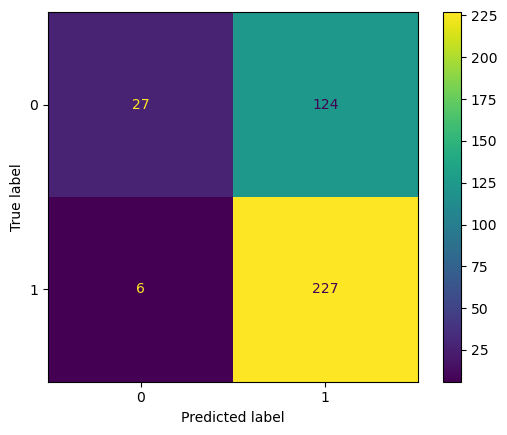

In [34]:
cm = confusion_matrix(y_test, y_pred)
display(cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();


In [35]:
X_train

array([[-553.6619    ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [-553.6619    ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [-553.6619    ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [-358.96085   ,  130.48657   ,  -30.808228  , ...,   -4.6289186 ,
           8.053421  ,    9.129246  ],
       [-357.4366    ,  132.7692    ,  -26.895145  , ...,   -0.93805516,
          11.23635   ,   10.3934765 ],
       [-360.07974   ,  135.05603   ,  -16.822067  , ...,   -5.6220717 ,
           2.877874  ,    5.029302  ]], dtype=float32)

In [36]:
X_train.shape

(497, 20)